In [38]:
import pandas


In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot(df, label=None, hue='VenueType'):
    plt.figure(figsize=(20, 15))
    sns.set_palette("husl")
    plt.xticks(rotation=45)
    sns.set_context("notebook", rc={"lines.linewidth": 2.5})
    plt.title(f'Checkin count per day {label}' if label else 'Checkin count per day')
    if hue:
        sns.lineplot(x='date', y='count', hue=hue, data=df)
    else:
        sns.lineplot(x='date', y='count', data=df)
    plt.xlabel('Date')
    plt.ylabel('Checkin count')
    plt.legend(title='VenueType', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig(f'figs/{label}.png' if label else 'figs/plot.png', bbox_inches='tight')
    # plt.show()

In [49]:
checkin_data_ATL = pandas.read_csv('city_global_2/data-delivered/Checkin_ATL.tsv', sep='\t')
checkin_data_ATL_Large = pandas.read_csv('city_global_2/data-delivered/Checkin_ATL_Large.tsv', sep='\t')
checkin_data_BJNG = pandas.read_csv('city_global_2/data-delivered/Checkin_BJNG.tsv', sep='\t')
checkin_data_NOLA = pandas.read_csv('city_global_2/data-delivered/Checkin_NOLA.tsv', sep='\t')
checkin_data_FVA = pandas.read_csv('city_global_2/data-delivered/Checkin_FVA.tsv', sep='\t')


In [107]:
def get_plot_df(checkin_data):
    checkin_data['CheckinTime'] = pandas.to_datetime(checkin_data['CheckinTime'])
    checkin_data['date'] = checkin_data['CheckinTime'].dt.date
    visited_by_type_df = checkin_data[['date','UserId','VenueType']].copy()

    visited_by_type_df['count'] = 1
    visited_by_type_df = visited_by_type_df.groupby(['date','VenueType']).count().reset_index()
    visited_by_type_df = visited_by_type_df[["date","VenueType","count"]]
    visited_by_type_df = visited_by_type_df.sort_values(by='date').reset_index(drop=True)

    total_df = visited_by_type_df.groupby(['date']).sum().reset_index()

    total_df = total_df[["date","count"]]
    visited_by_type_df = visited_by_type_df[["date","count","VenueType"]]
    return  visited_by_type_df, total_df
    

In [88]:
atl_visited_df, atl_total_df = get_plot_df(checkin_data_ATL)
atl_large_visited_df, atl_large_total_df = get_plot_df(checkin_data_ATL_Large)
bjng_visited_df, bjng_total_df = get_plot_df(checkin_data_BJNG)
nola_visited_df, nola_total_df = get_plot_df(checkin_data_NOLA)
fva_visited_df, fva_total_df = get_plot_df(checkin_data_FVA)


In [108]:
def plot_all(visit_df, total_df, name=''):
    plot(total_df, label=f'{name}_Total_Visits', hue=None)
    plot(visit_df, label=f'{name}_Visited_by_Type')
    plot(visit_df[visit_df['VenueType'] == 'Workplace'], label=f'{name}_Workplace')
    plot(visit_df[visit_df['VenueType'] == 'Restaurant'], label=f'{name}_Restaurant')
    plot(visit_df[visit_df['VenueType'] == 'Pub'], label=f'{name}_Pub')
    plot(visit_df[visit_df['VenueType'] == 'Apartment'], label=f'{name}_Apartment')

/tmp/ipykernel_2125117/1108688910.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='VenueType', bbox_to_anchor=(1.05, 1), loc='upper left')
/tmp/ipykernel_2125117/1108688910.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='VenueType', bbox_to_anchor=(1.05, 1), loc='upper left')
/tmp/ipykernel_2125117/1108688910.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='VenueType', bbox_to_anchor=(1.05, 1), loc='upper left')
/tmp/ipykernel_2125117/1108688910.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start w

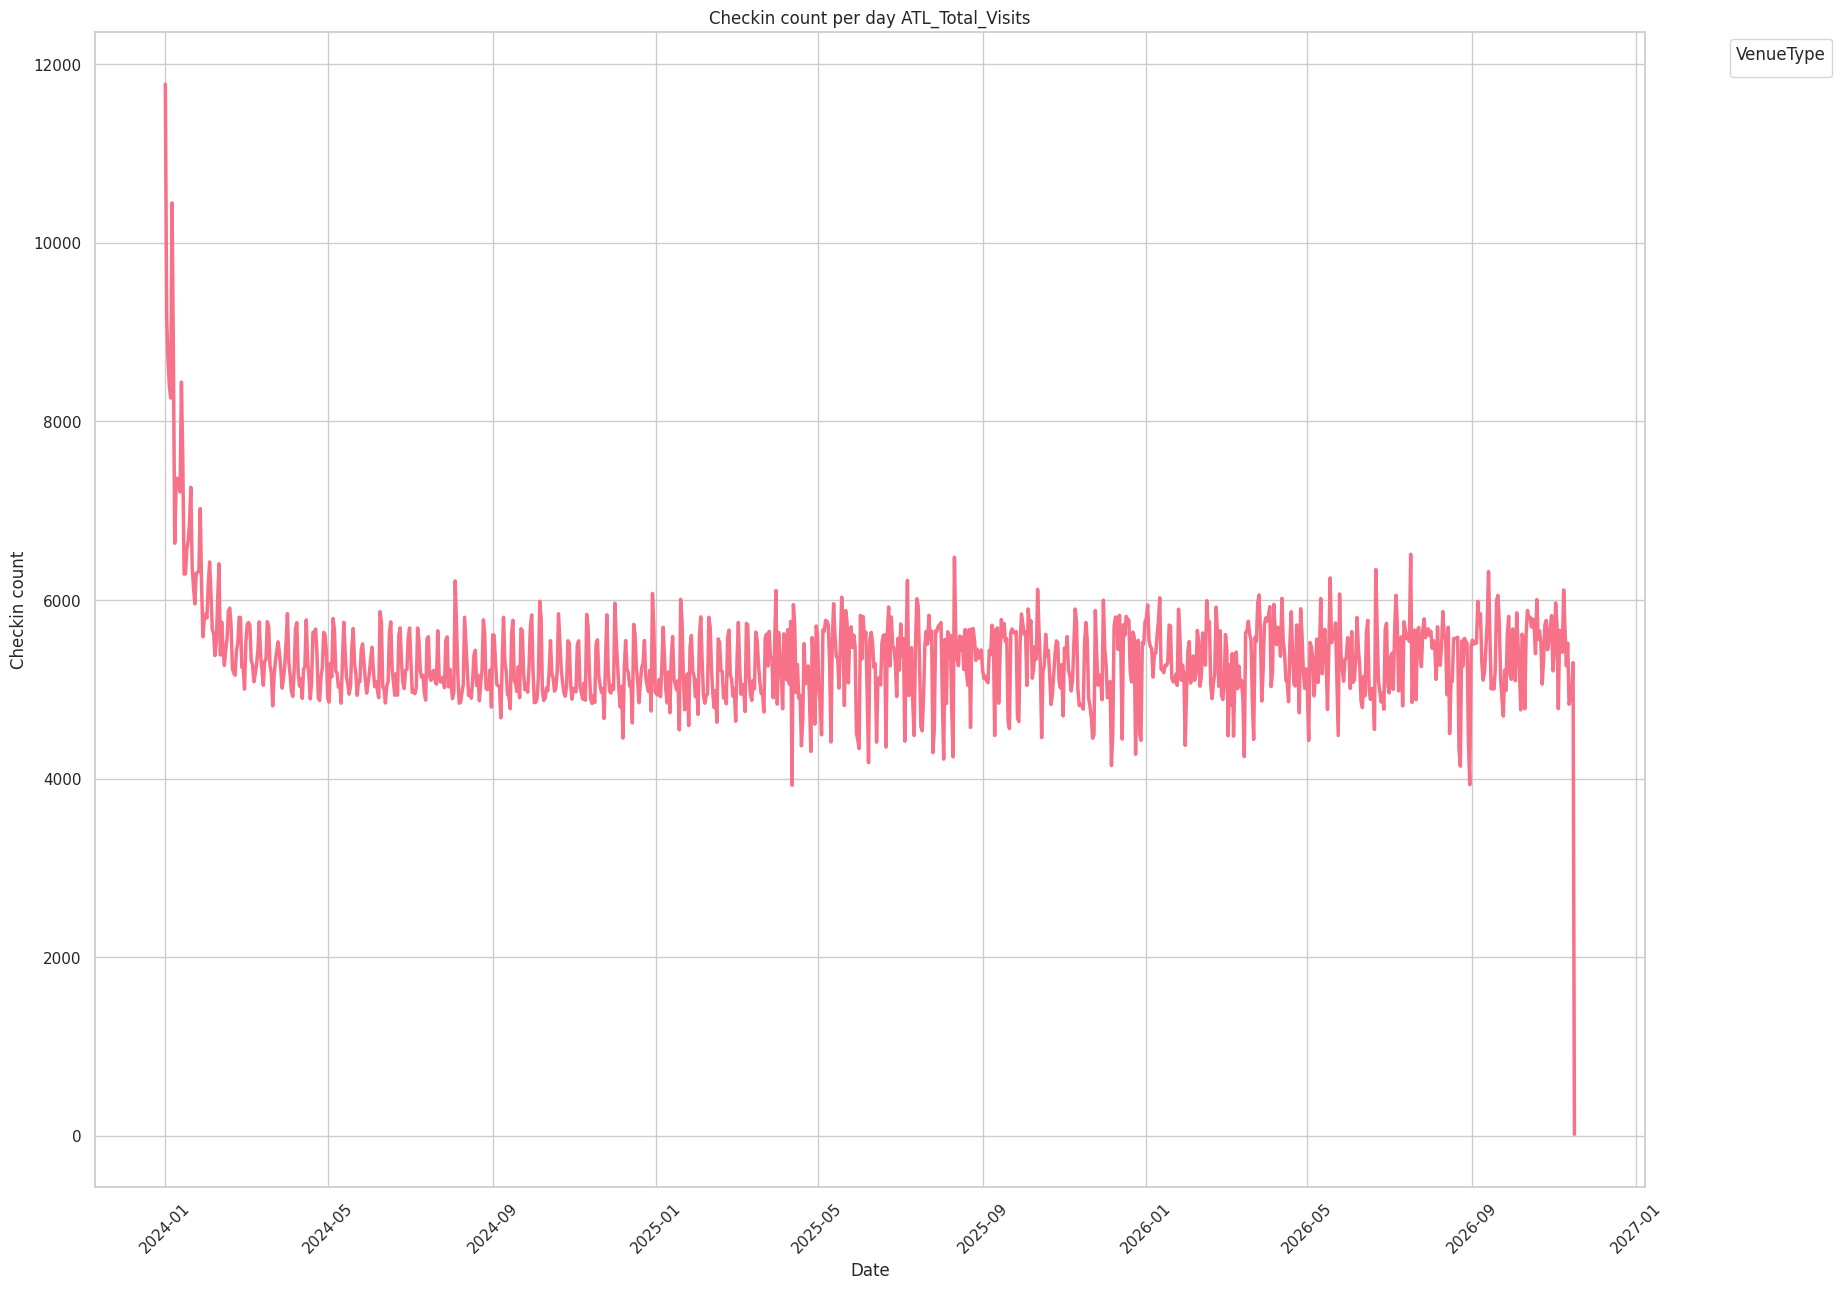

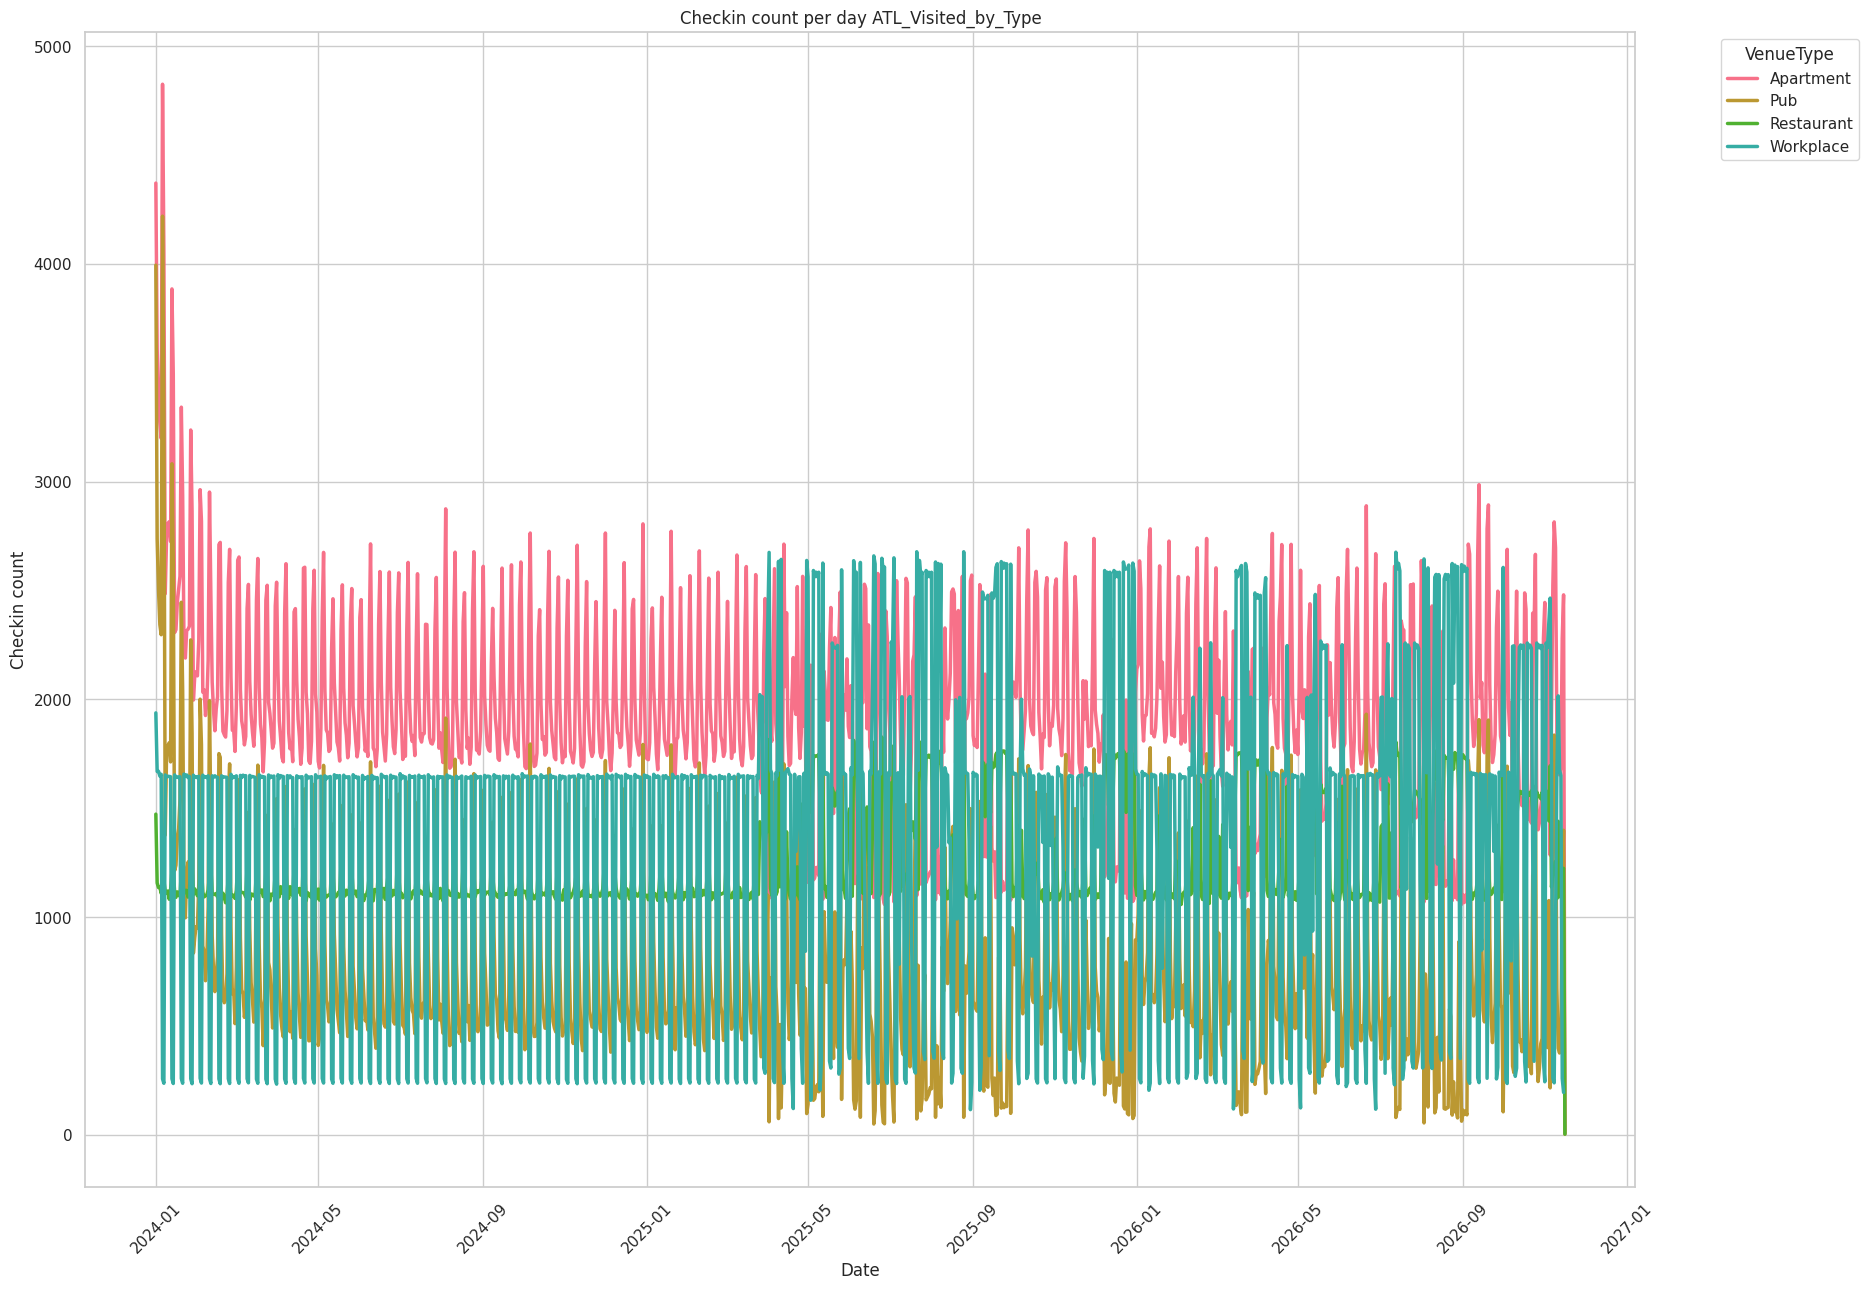

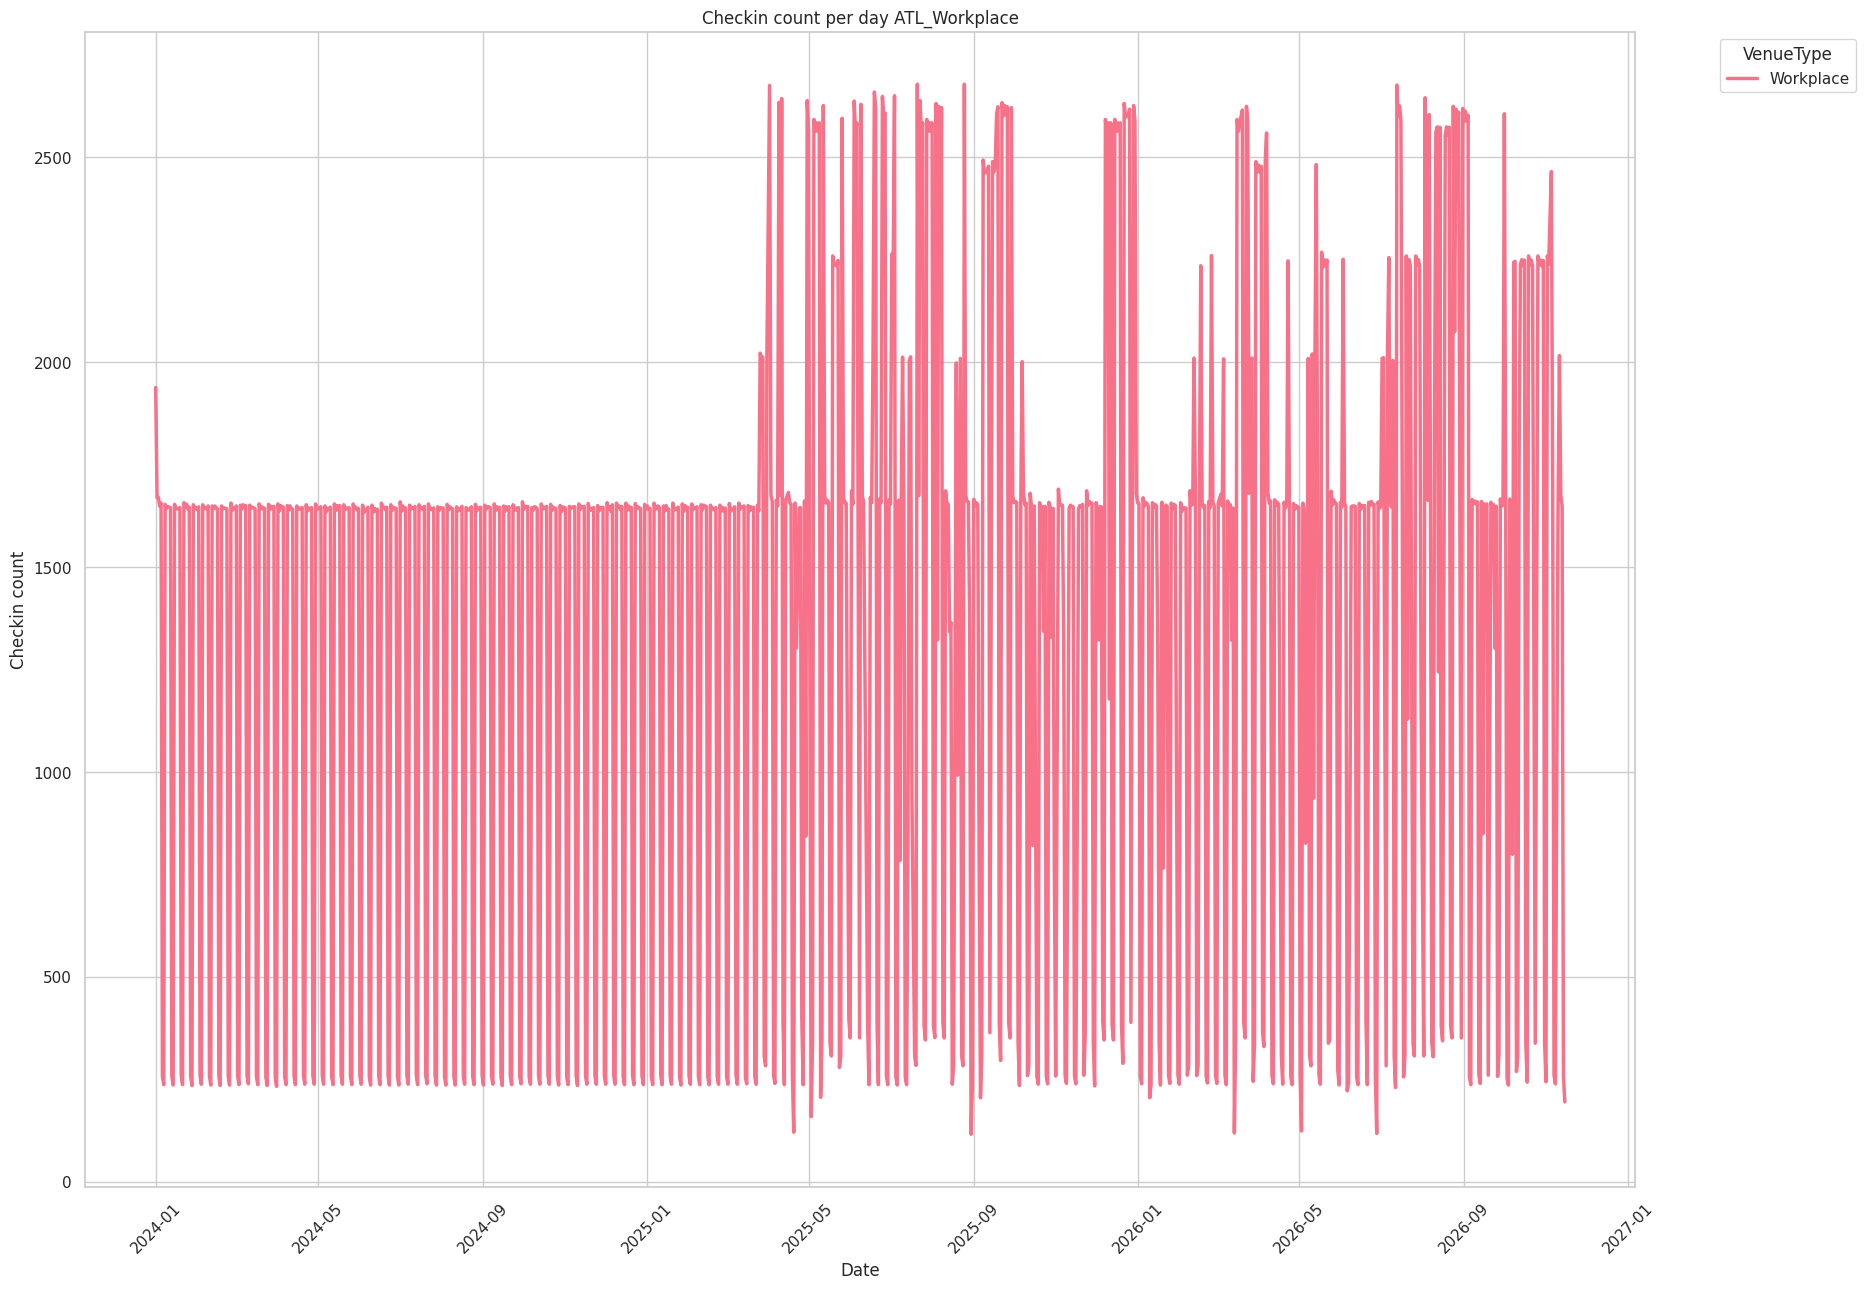

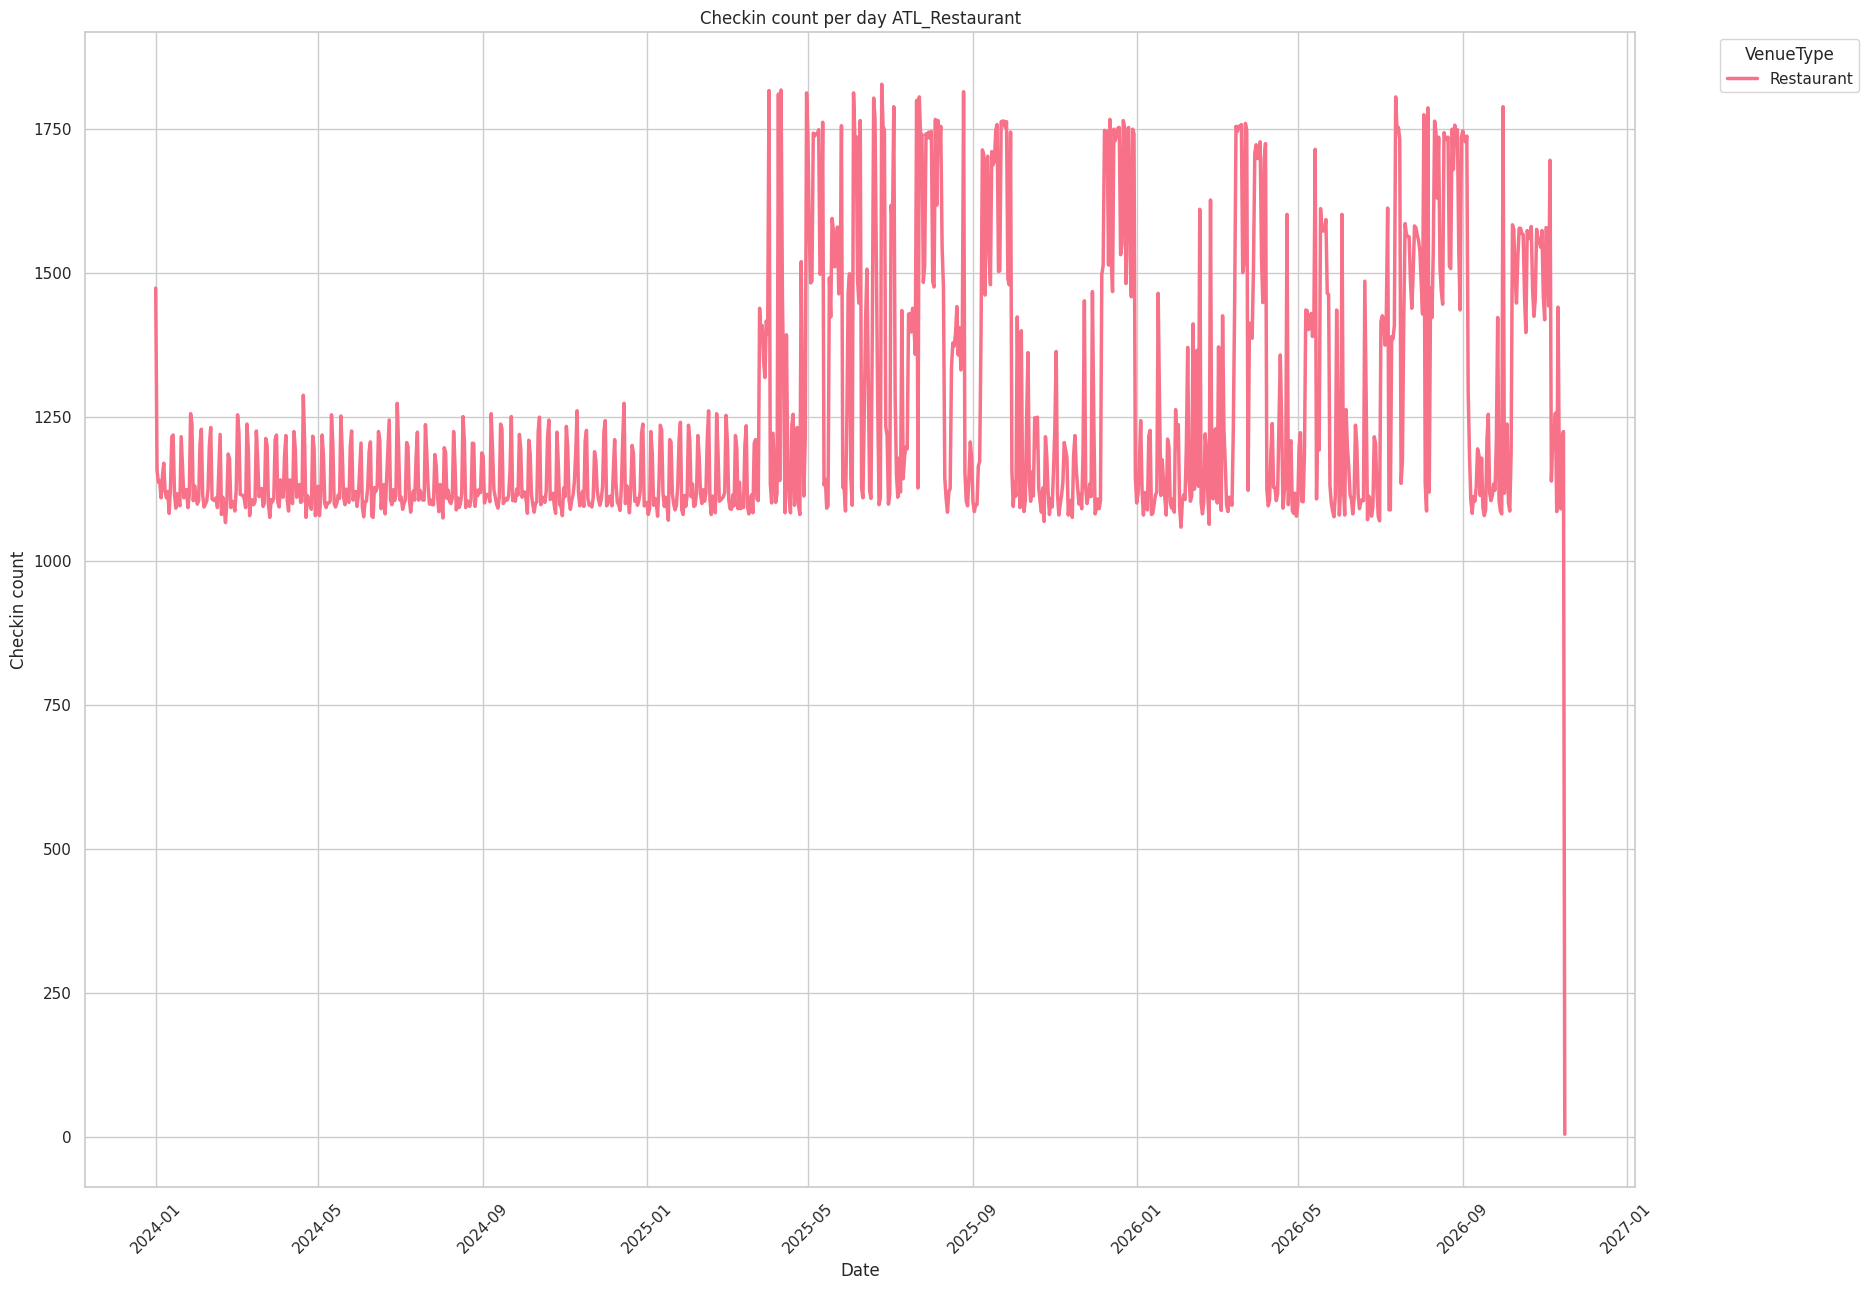

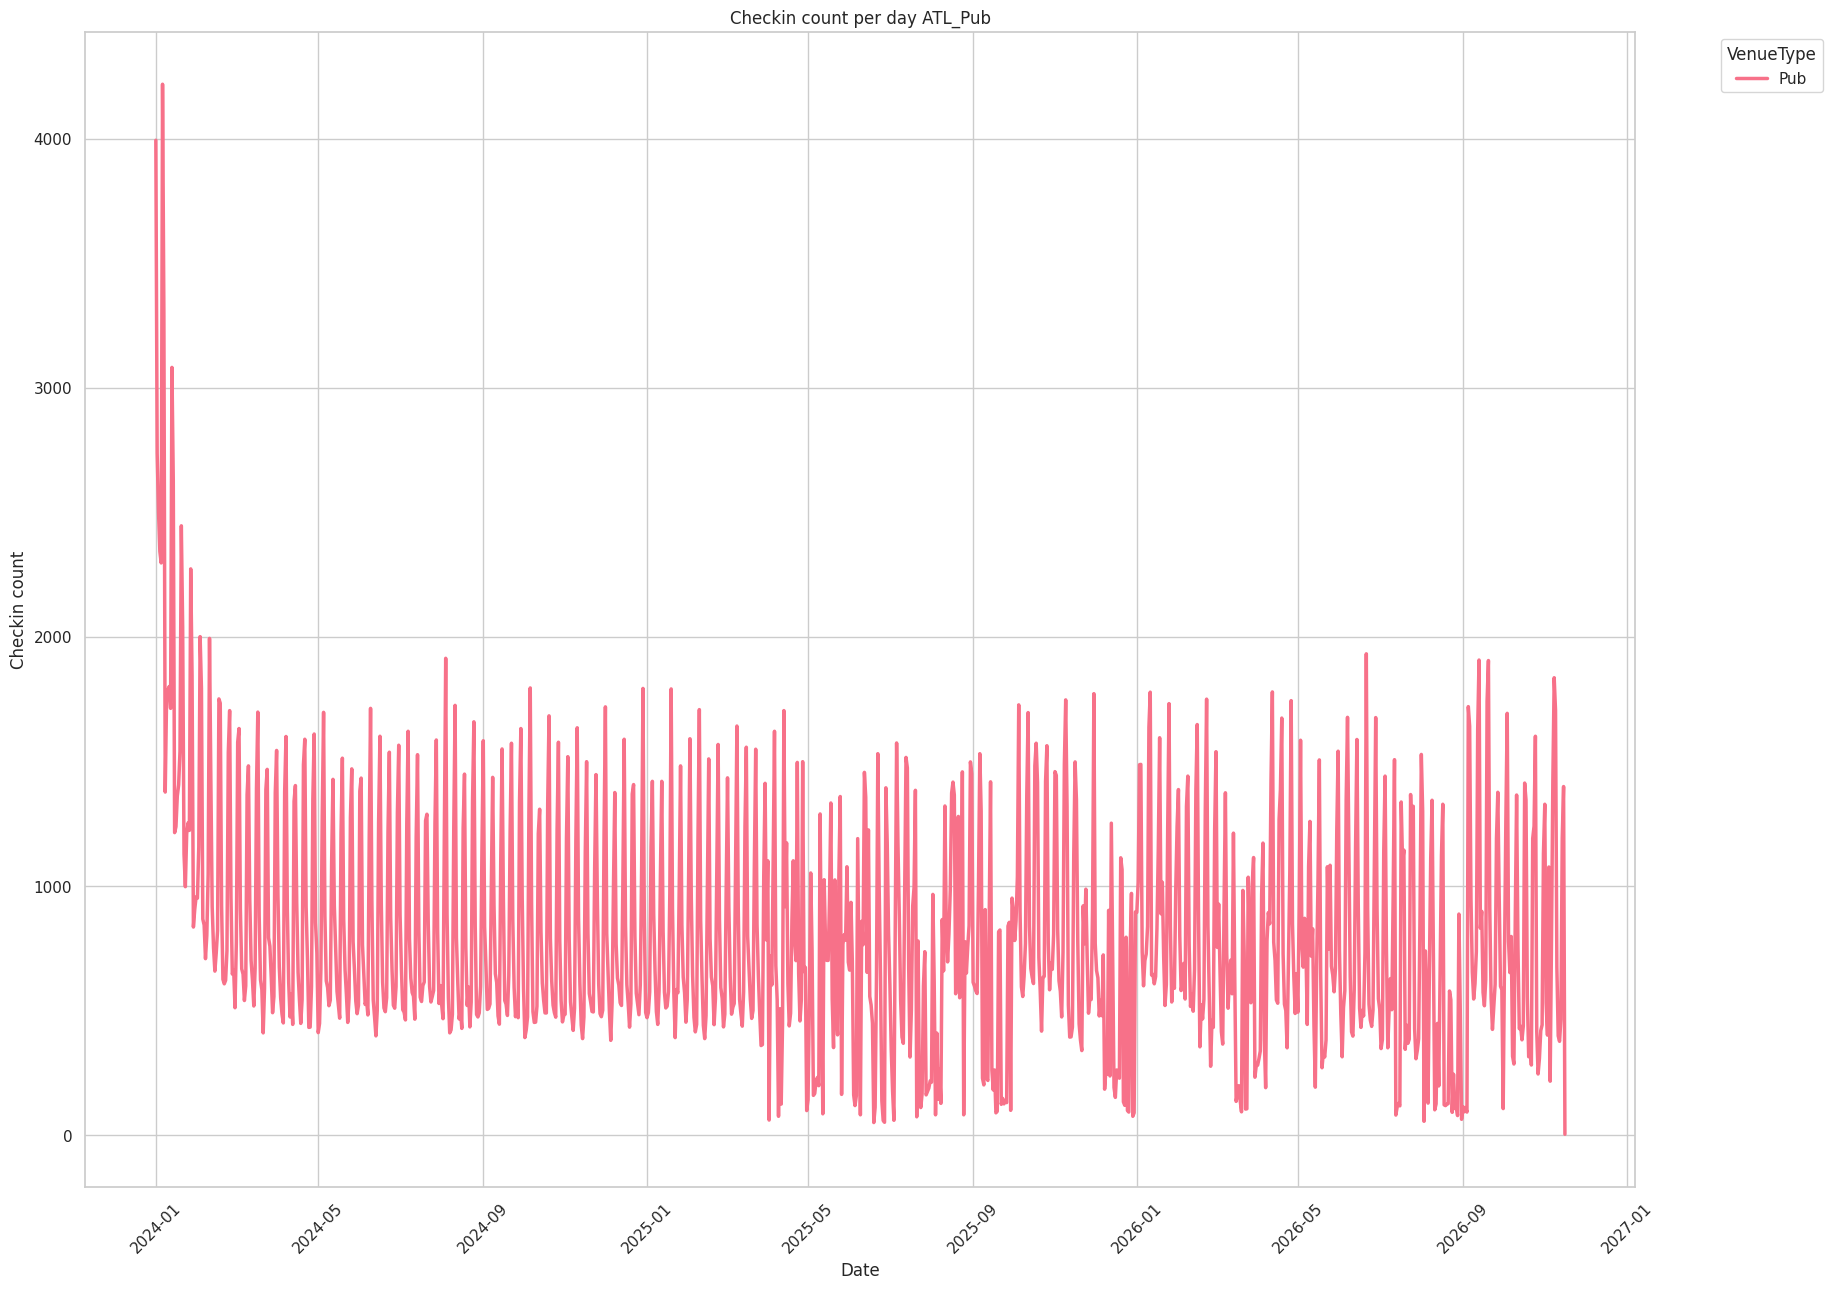

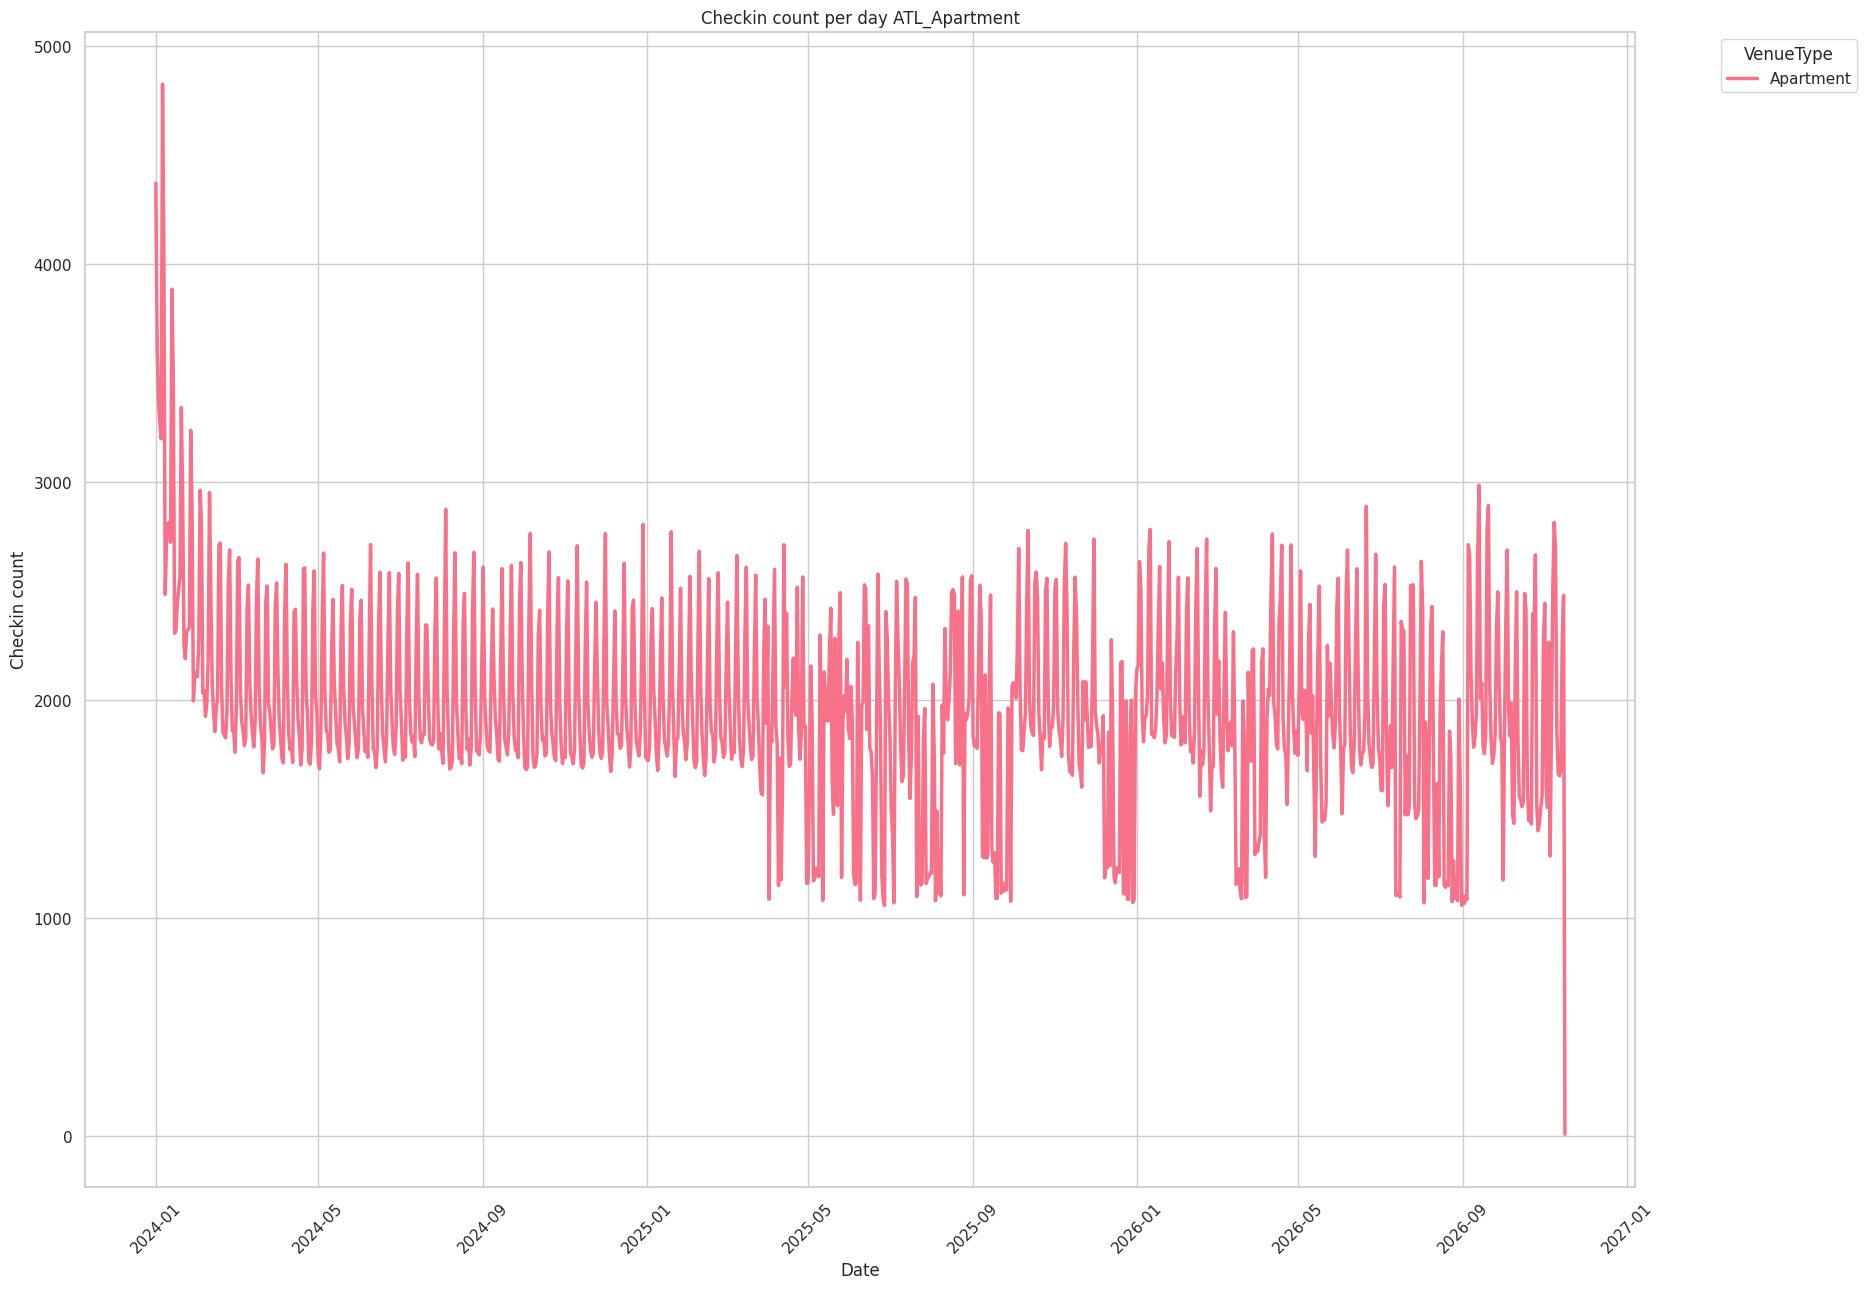

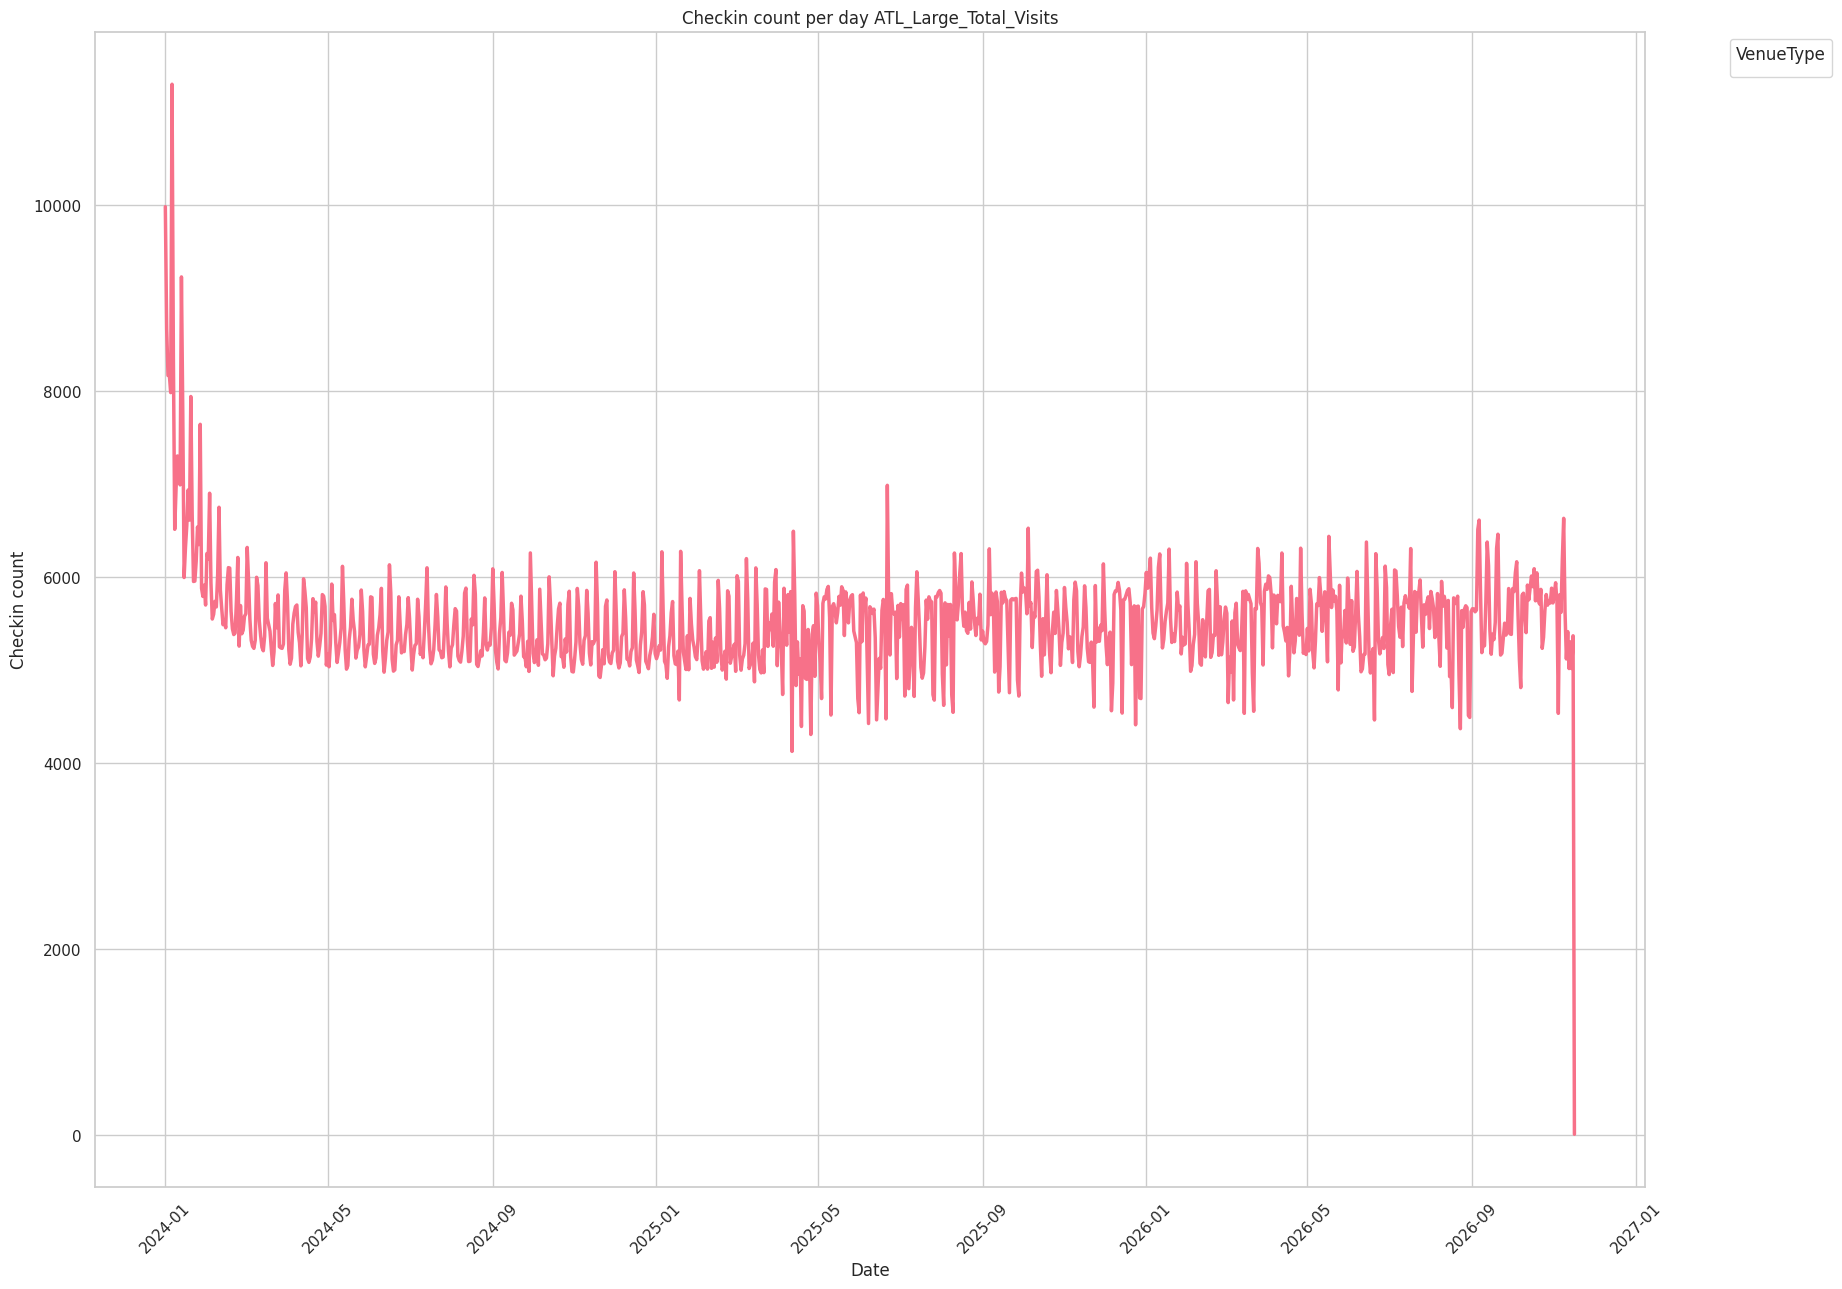

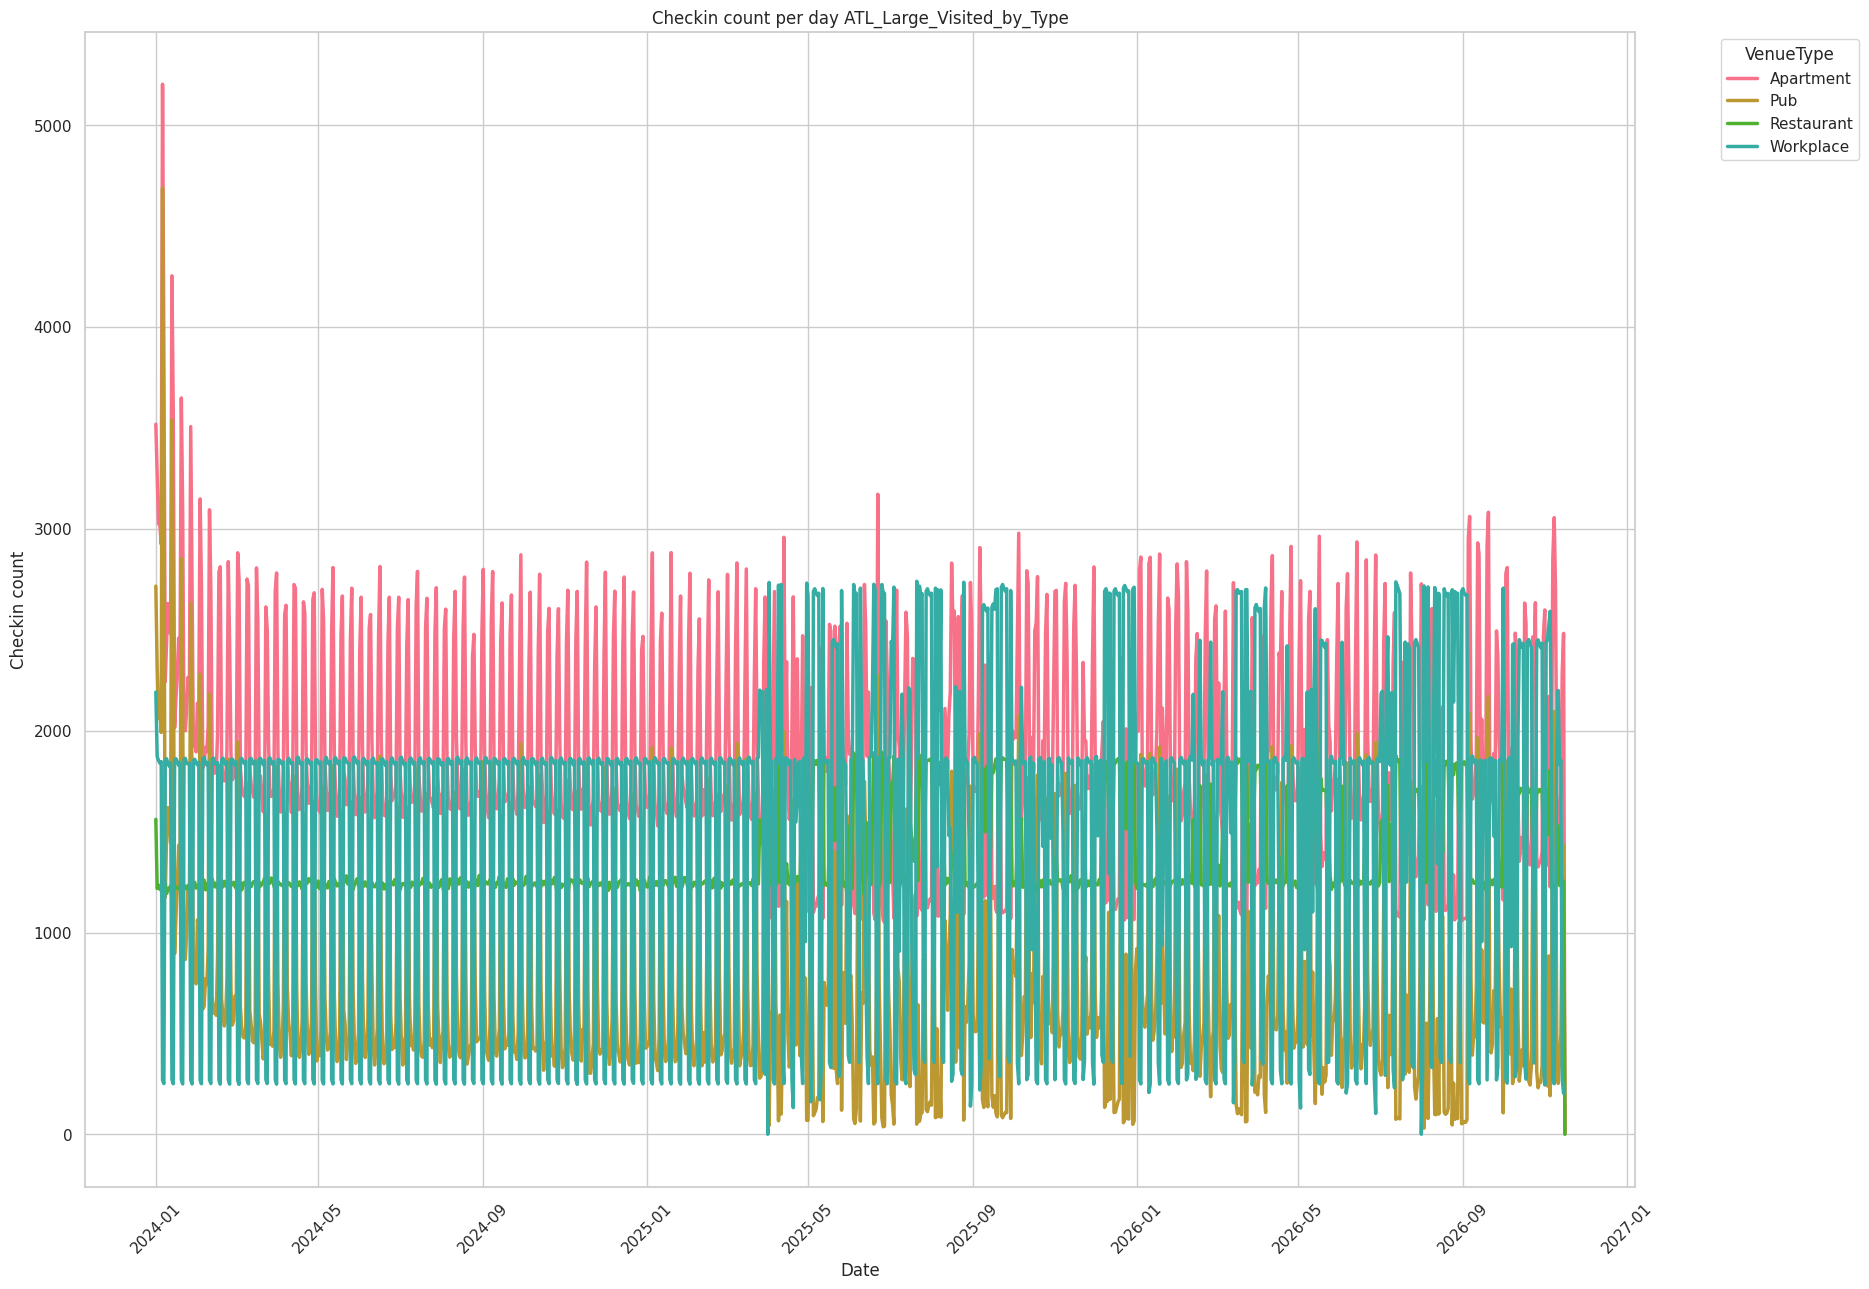

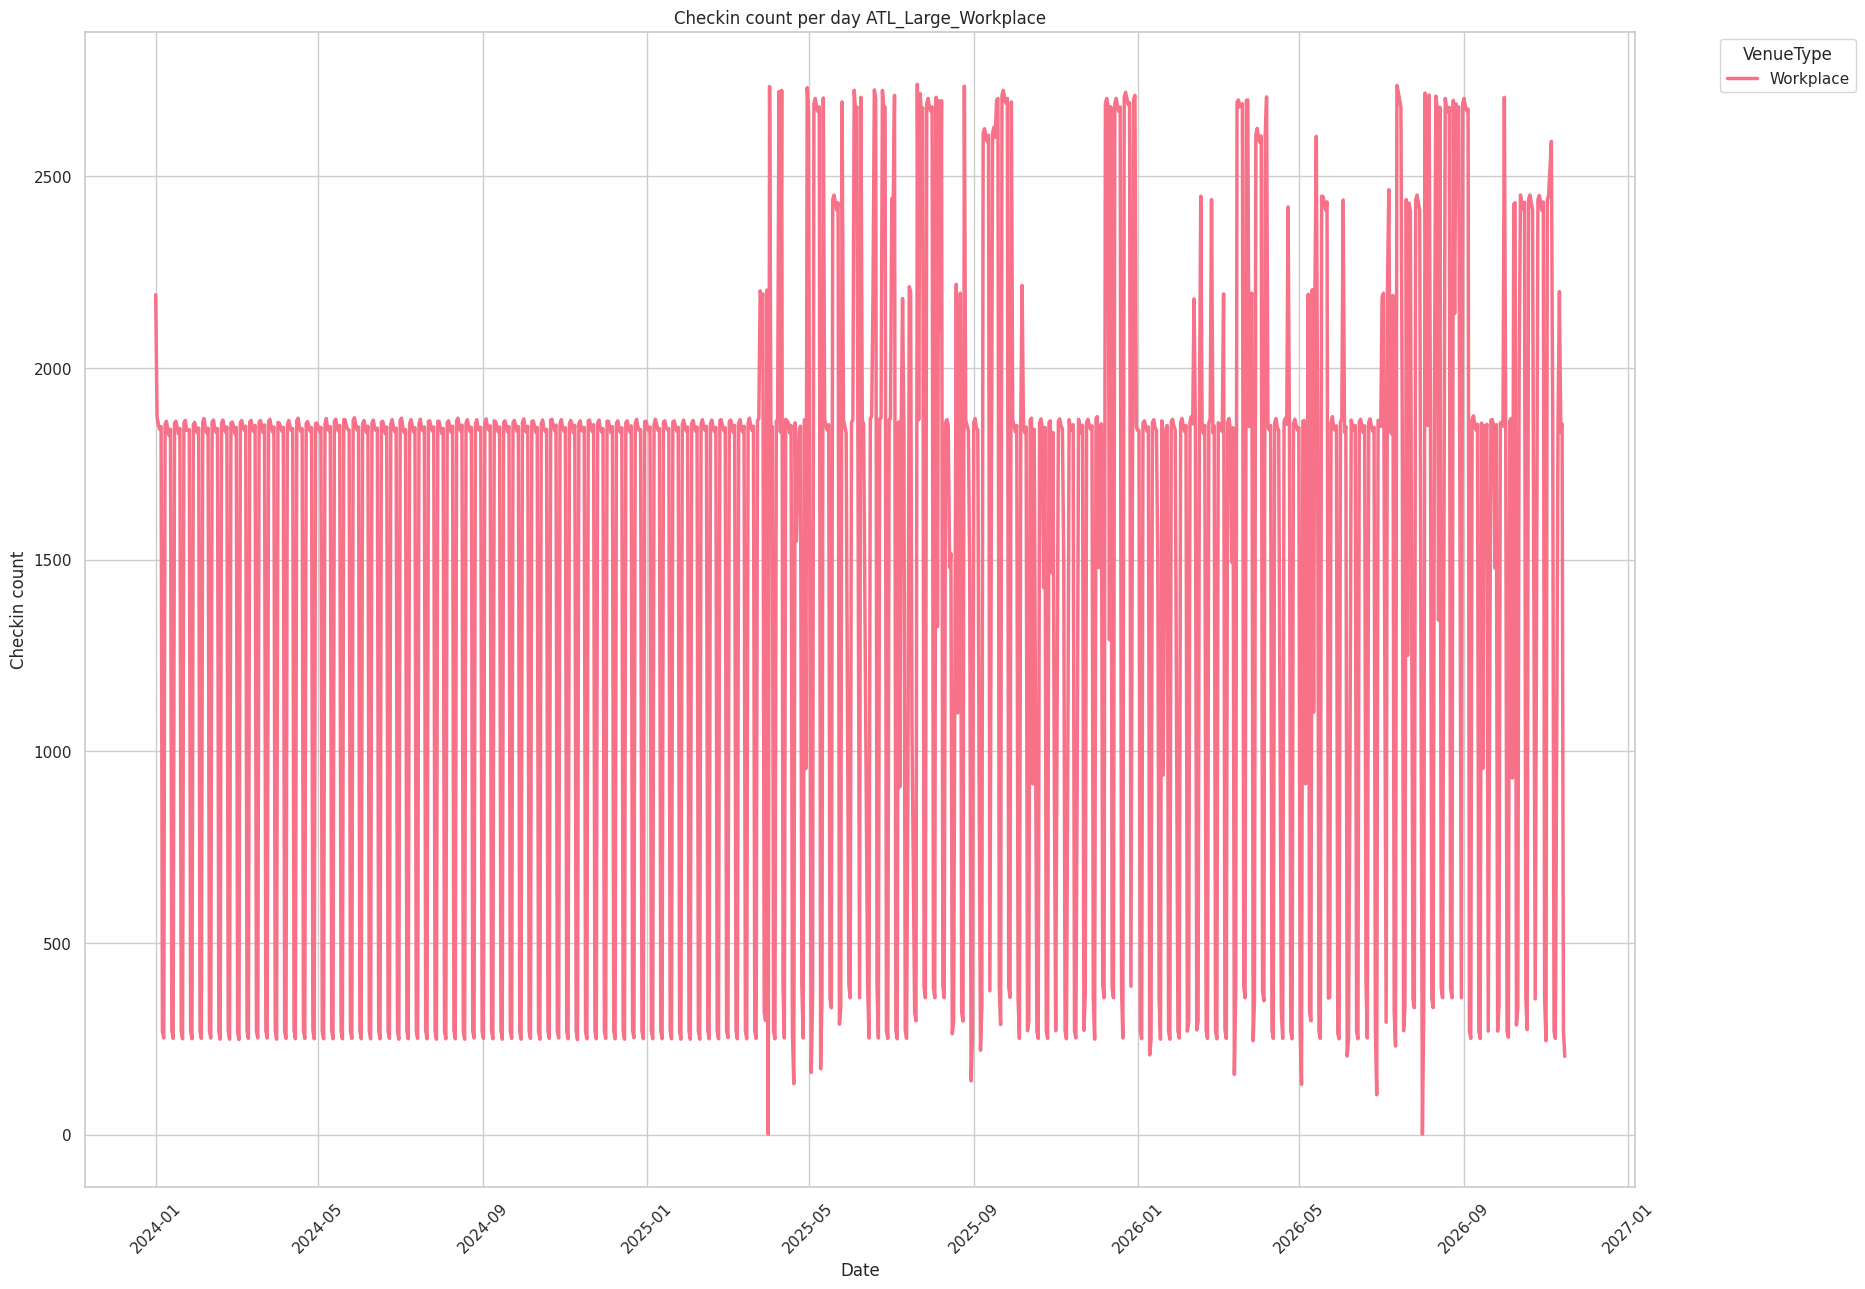

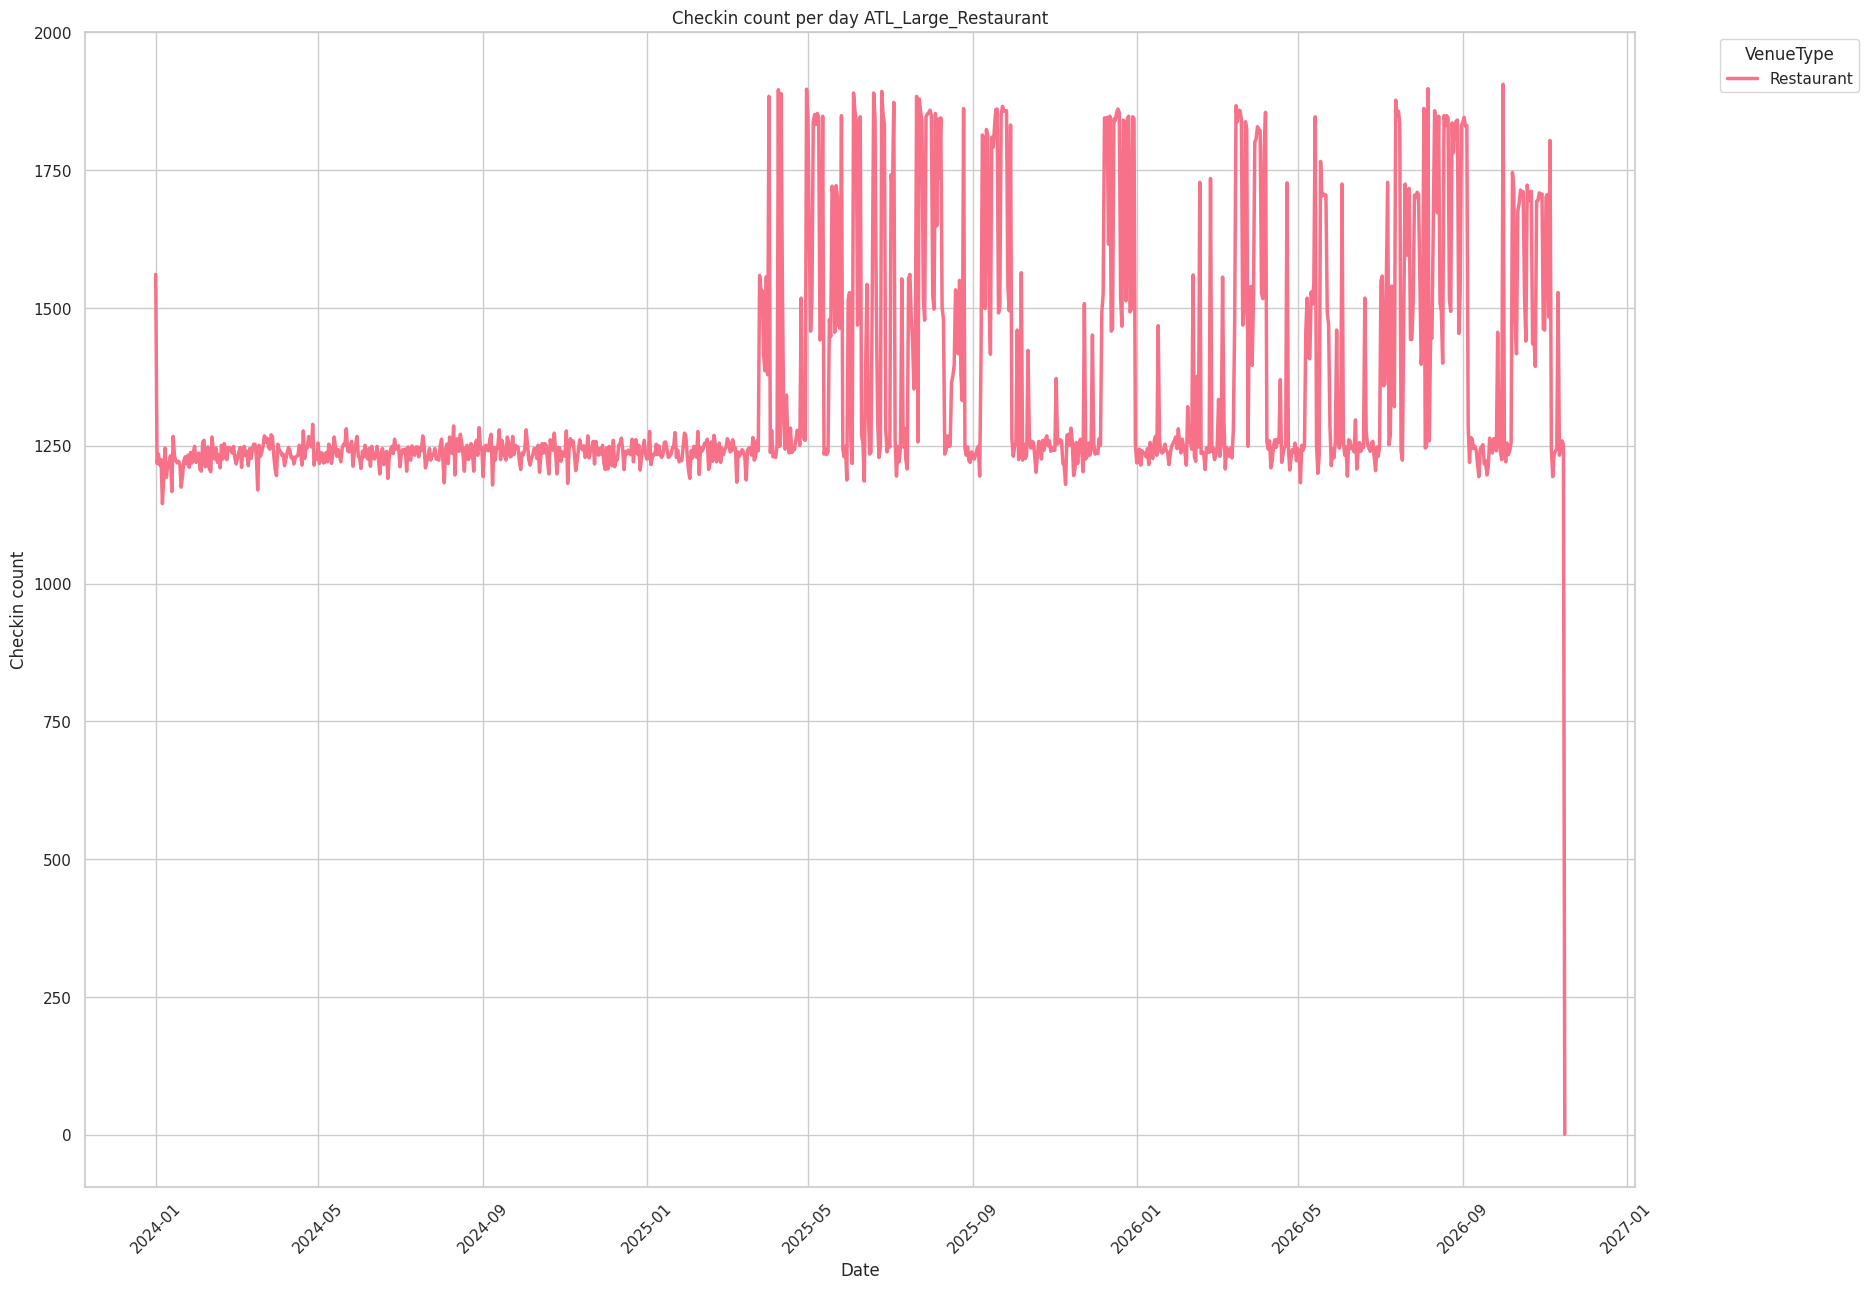

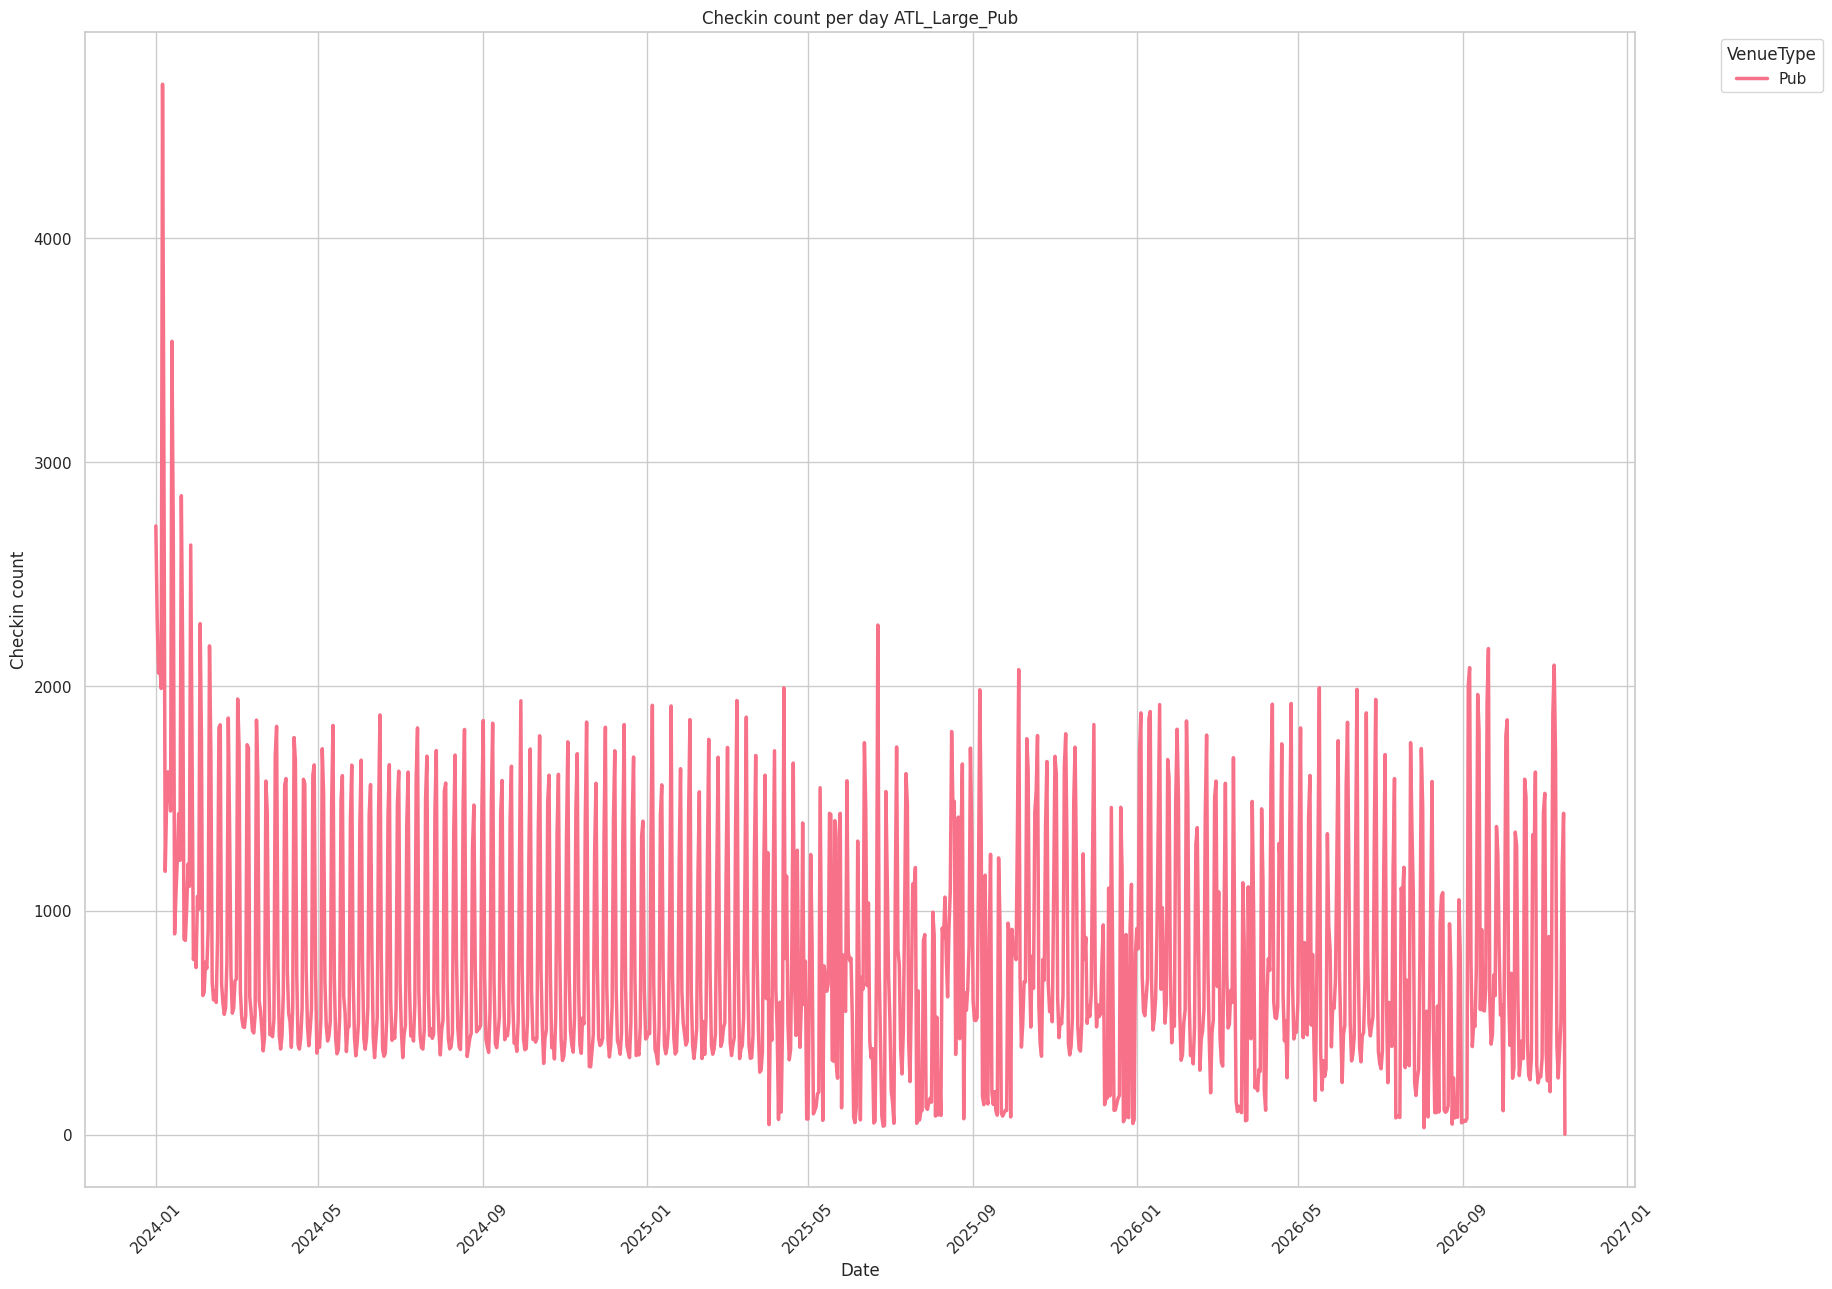

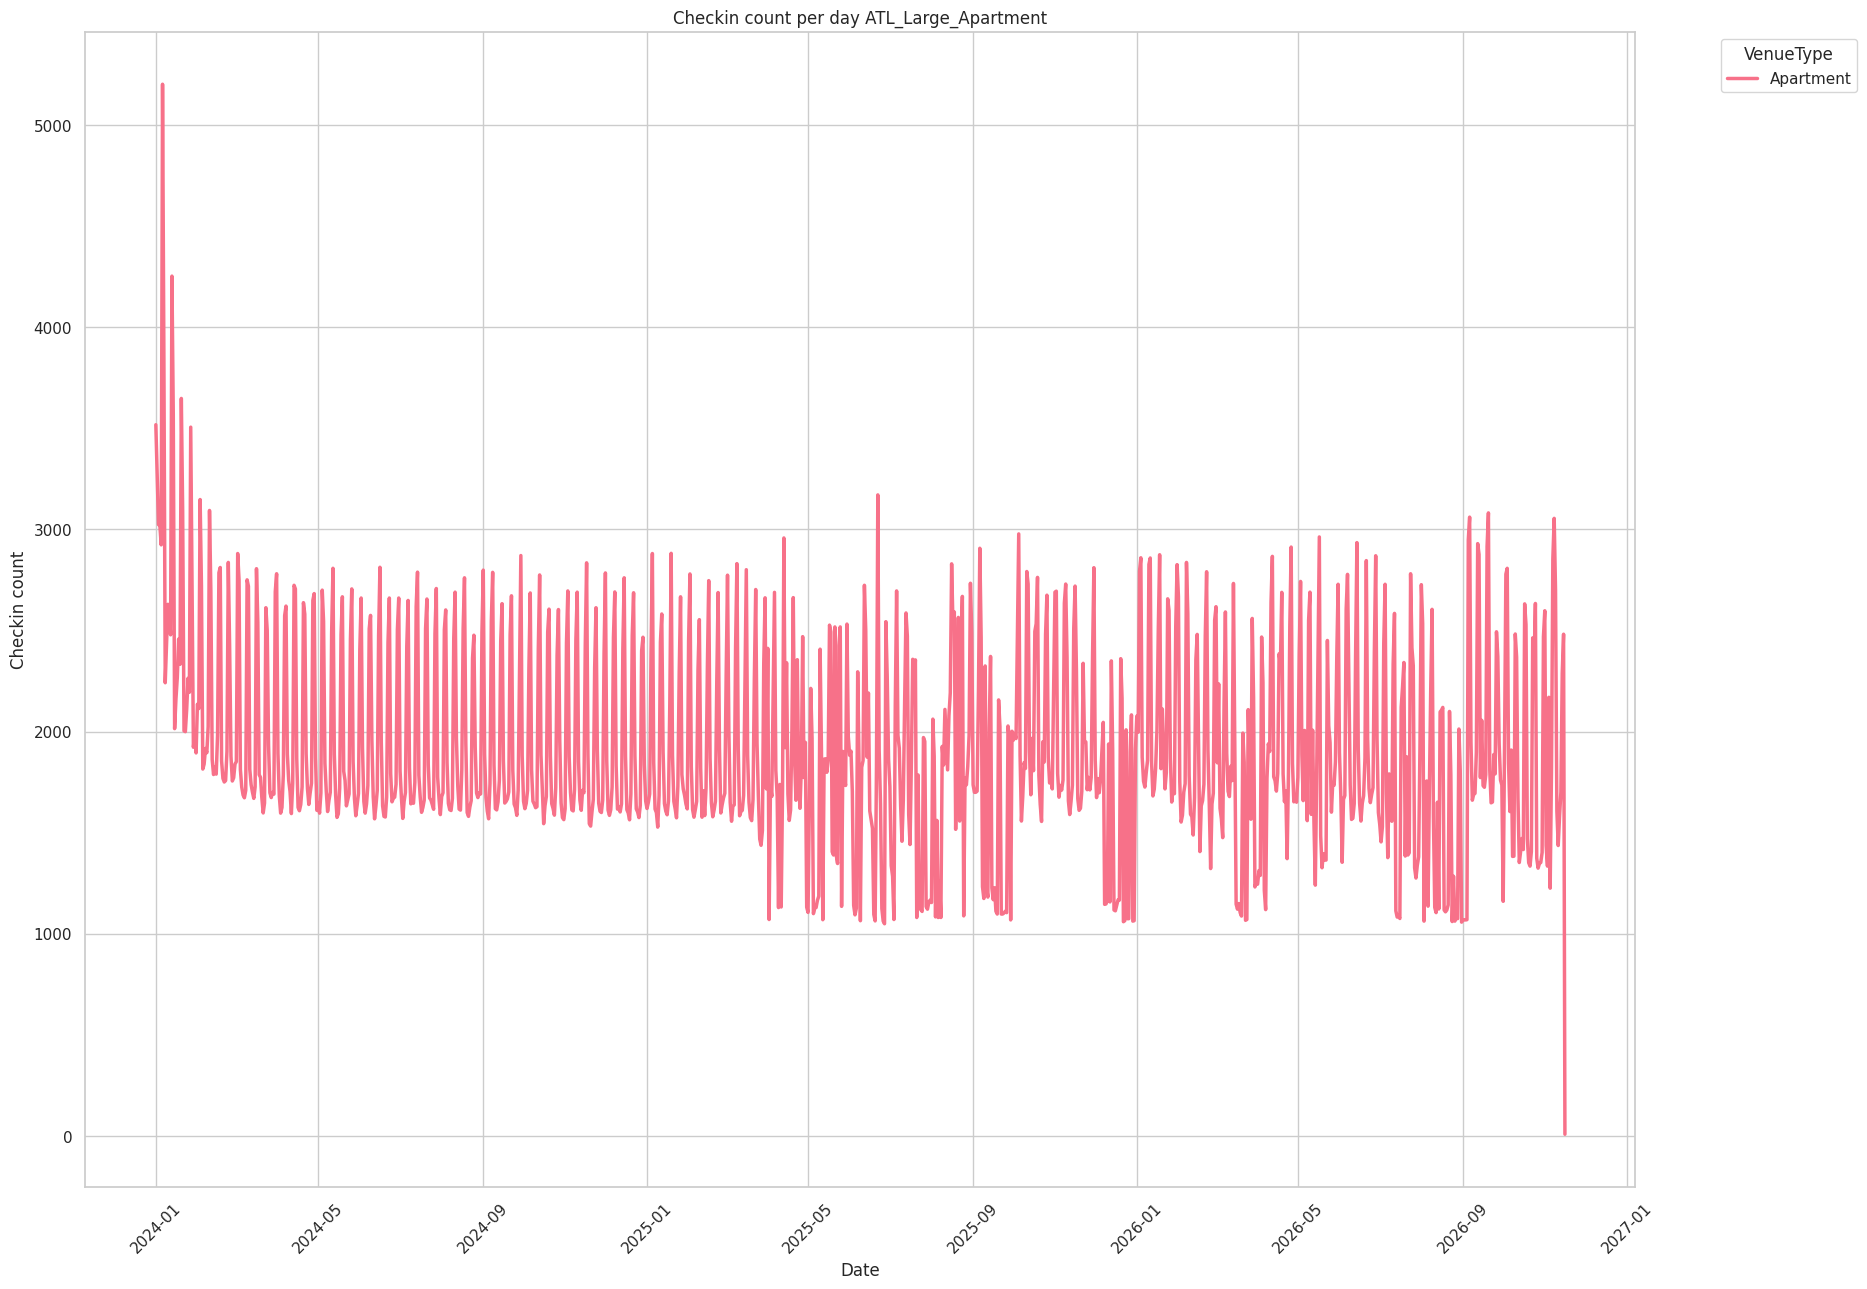

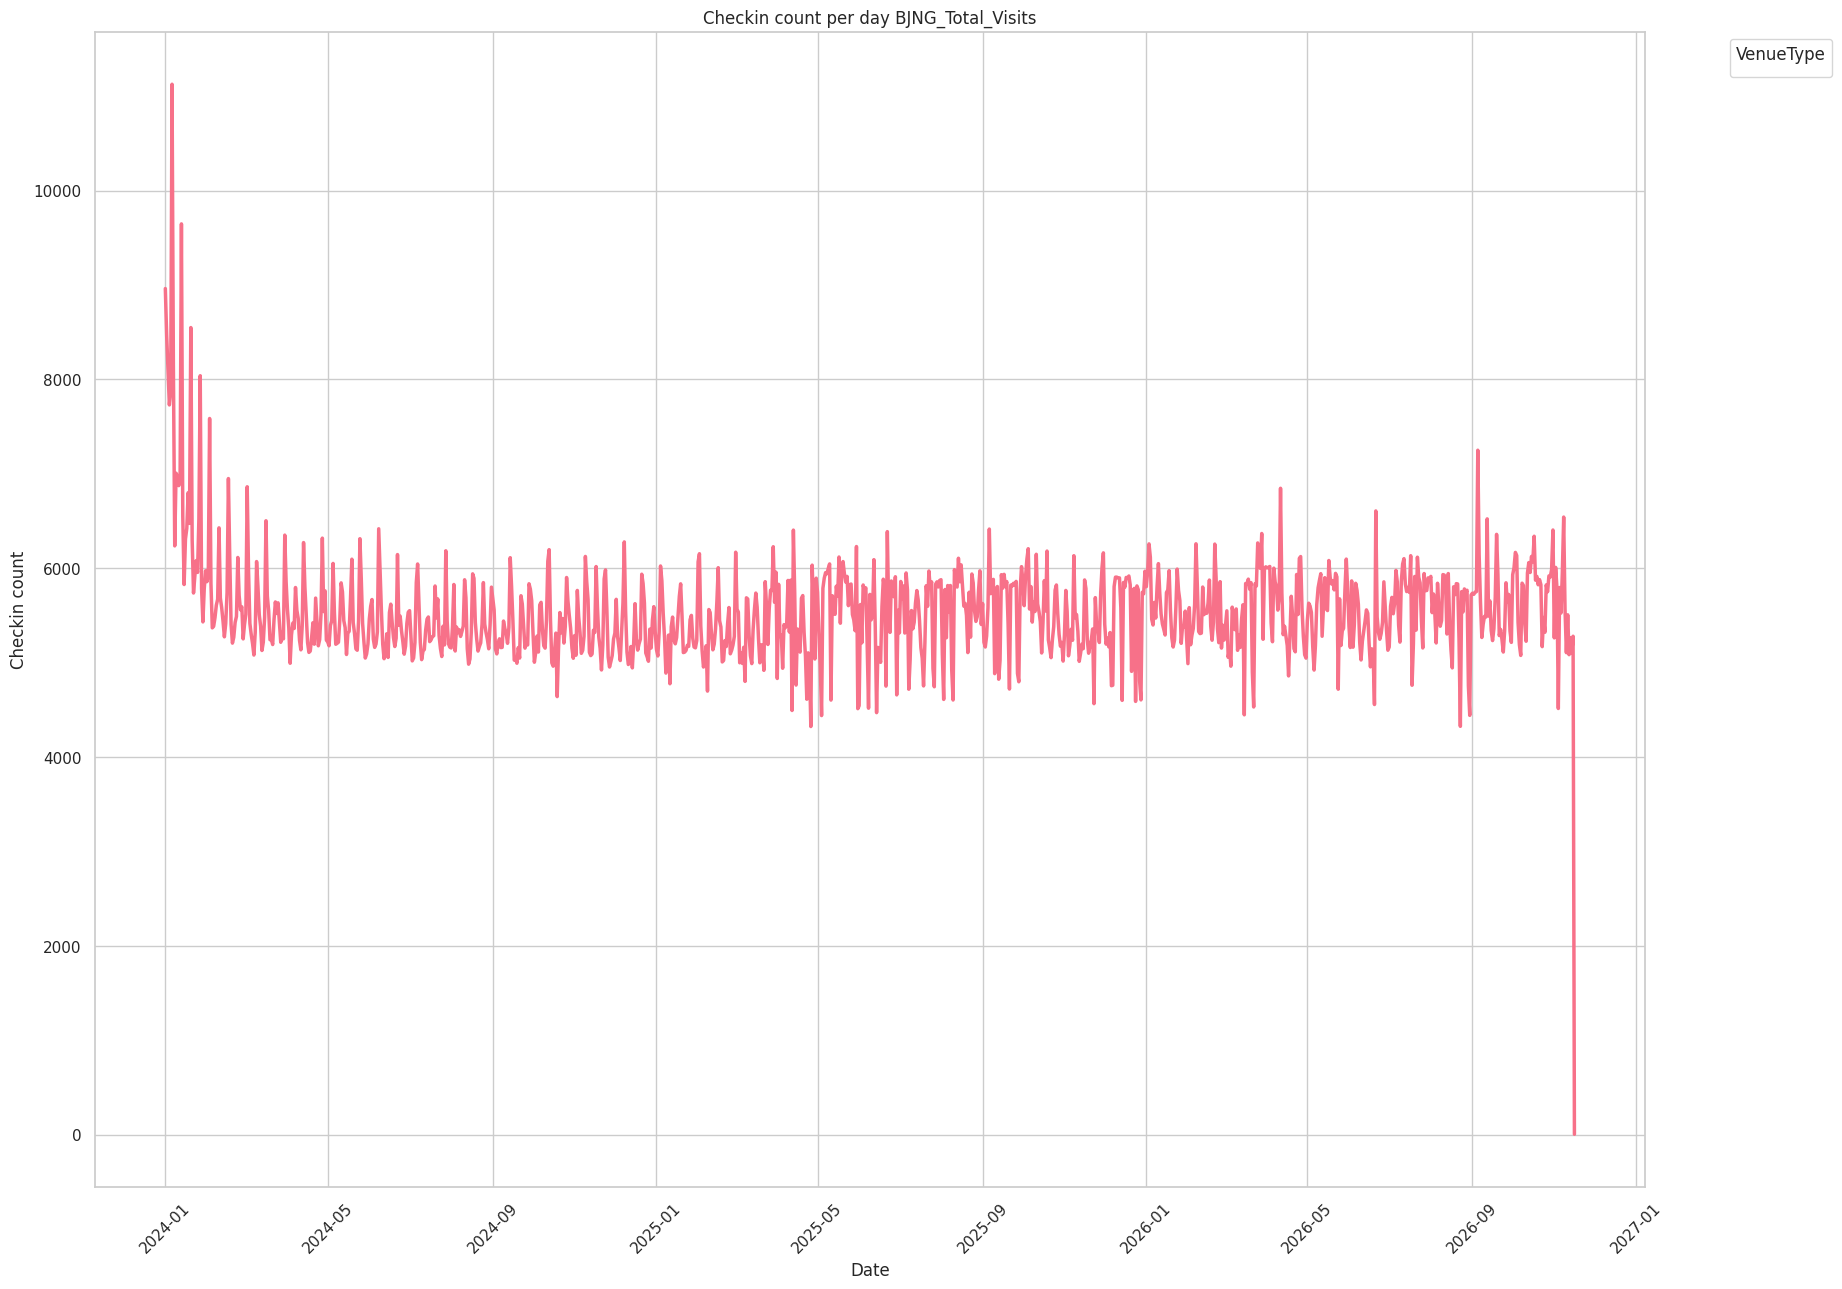

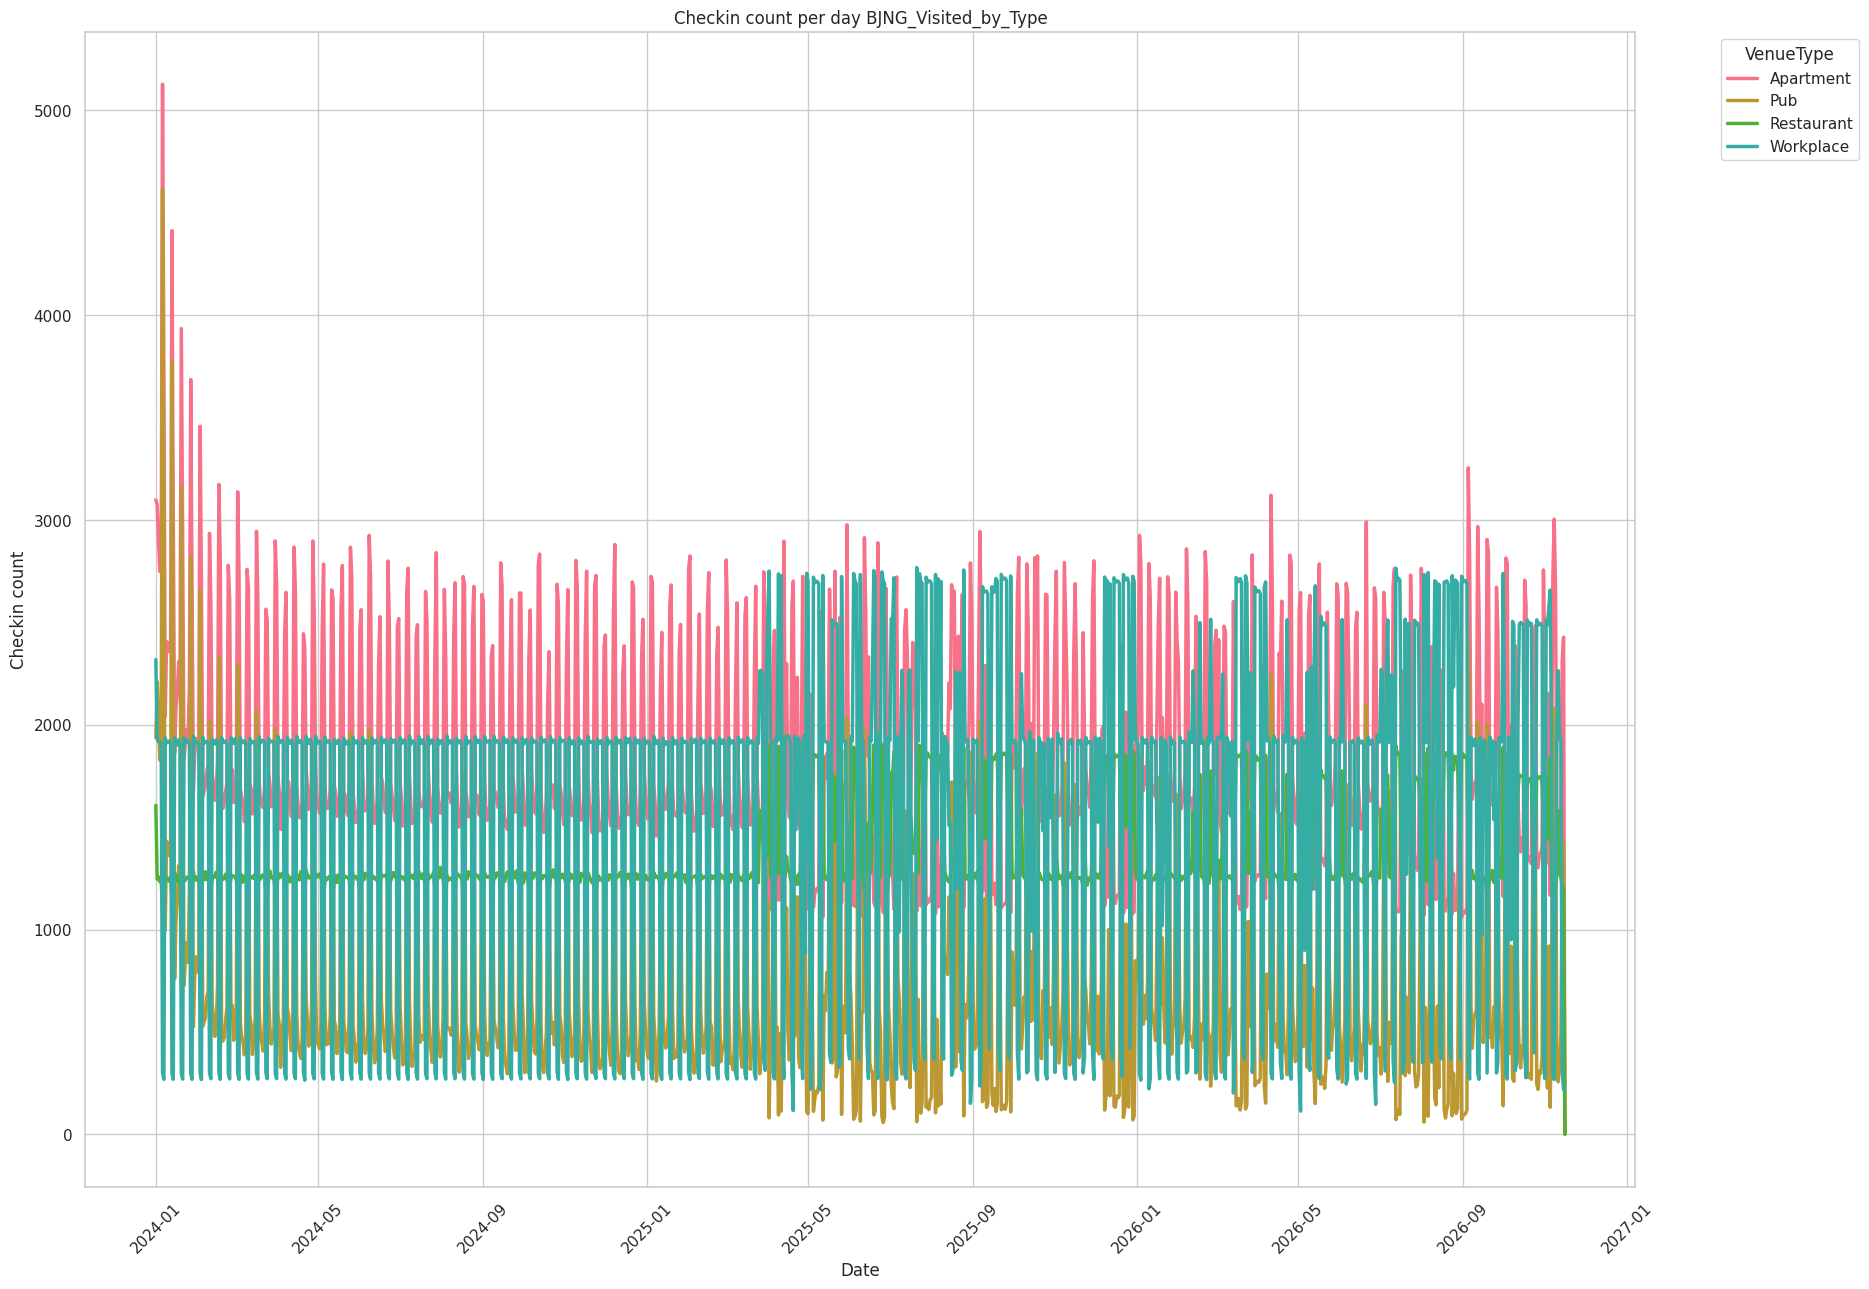

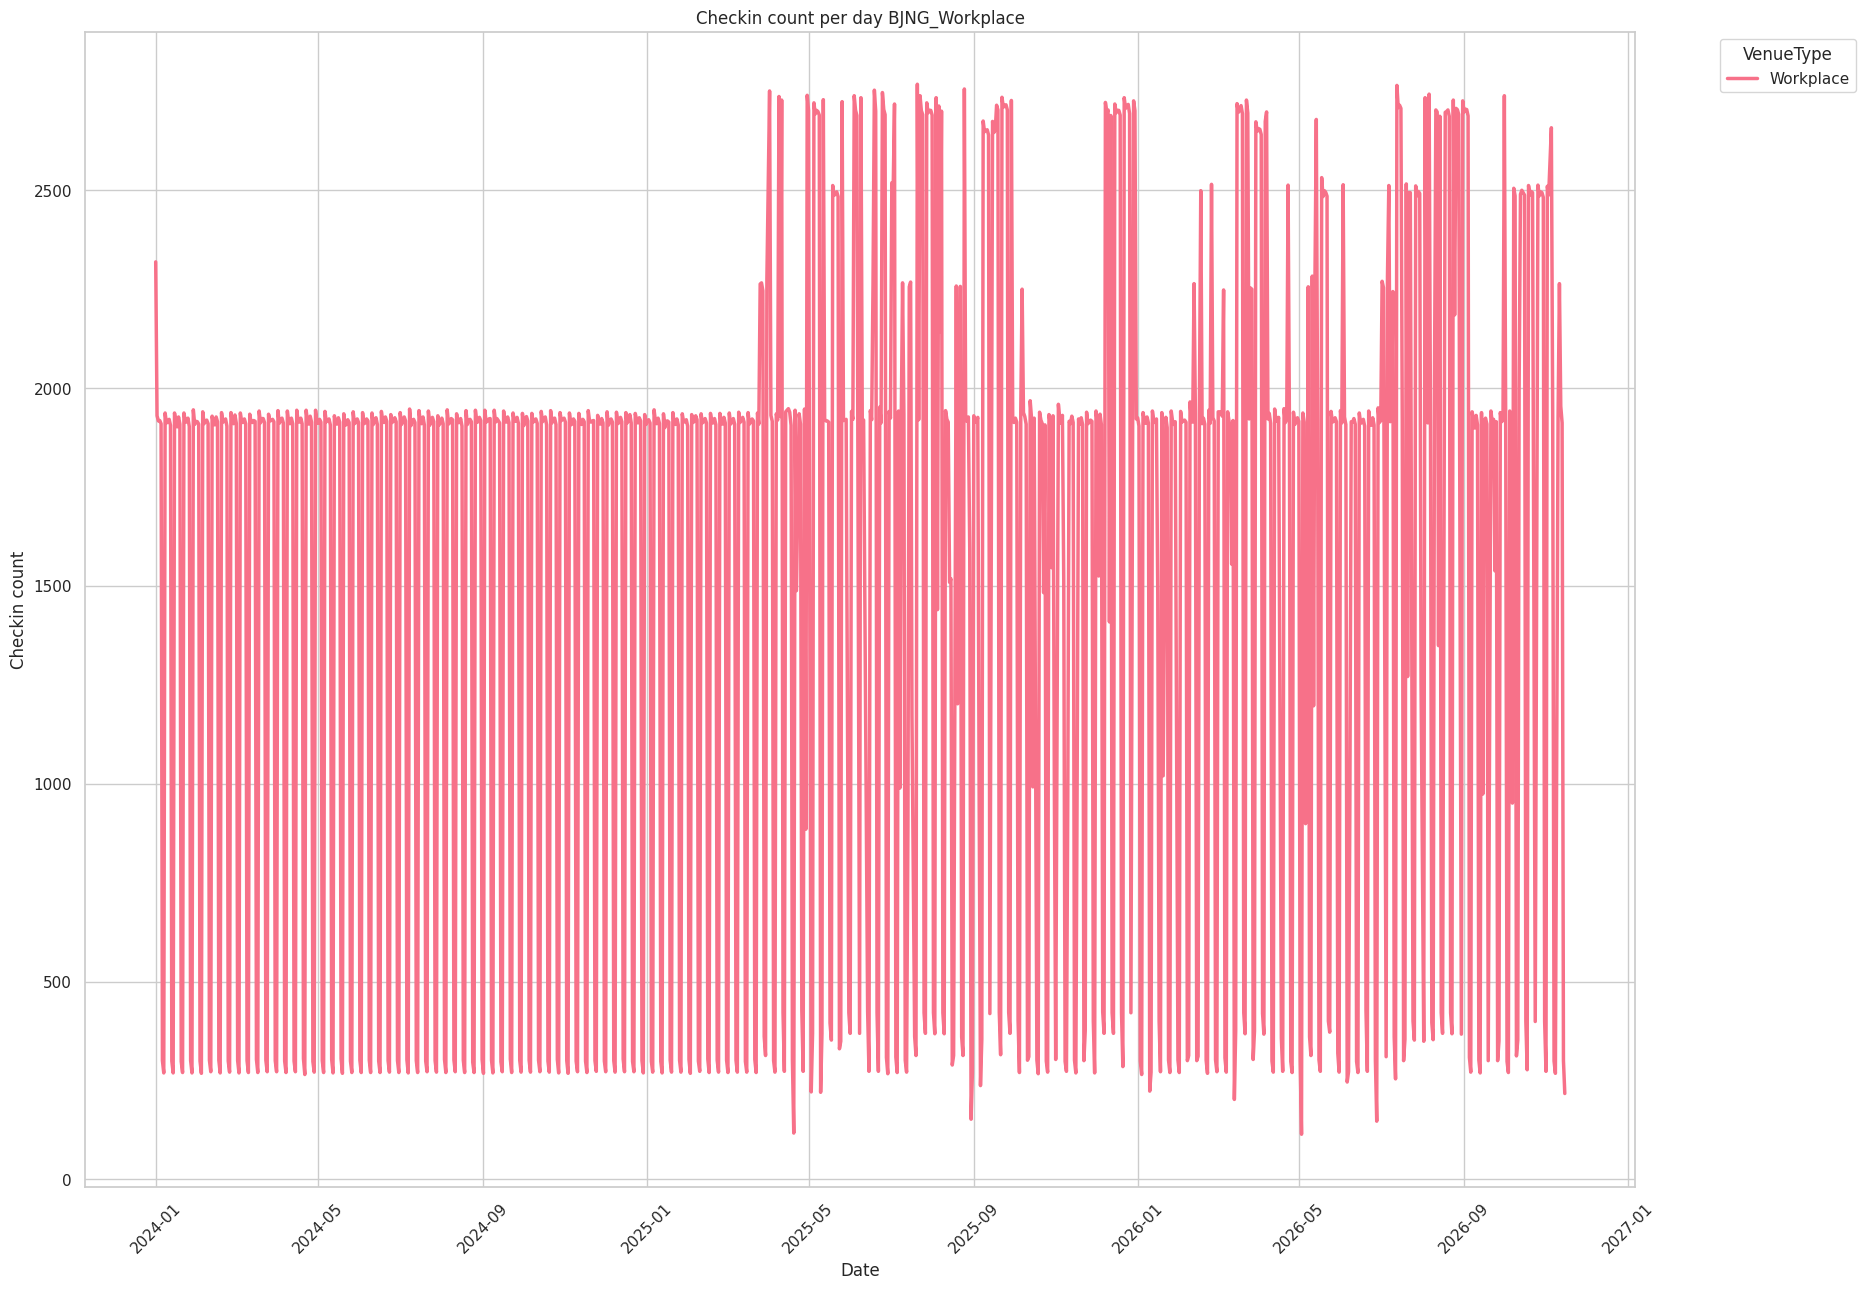

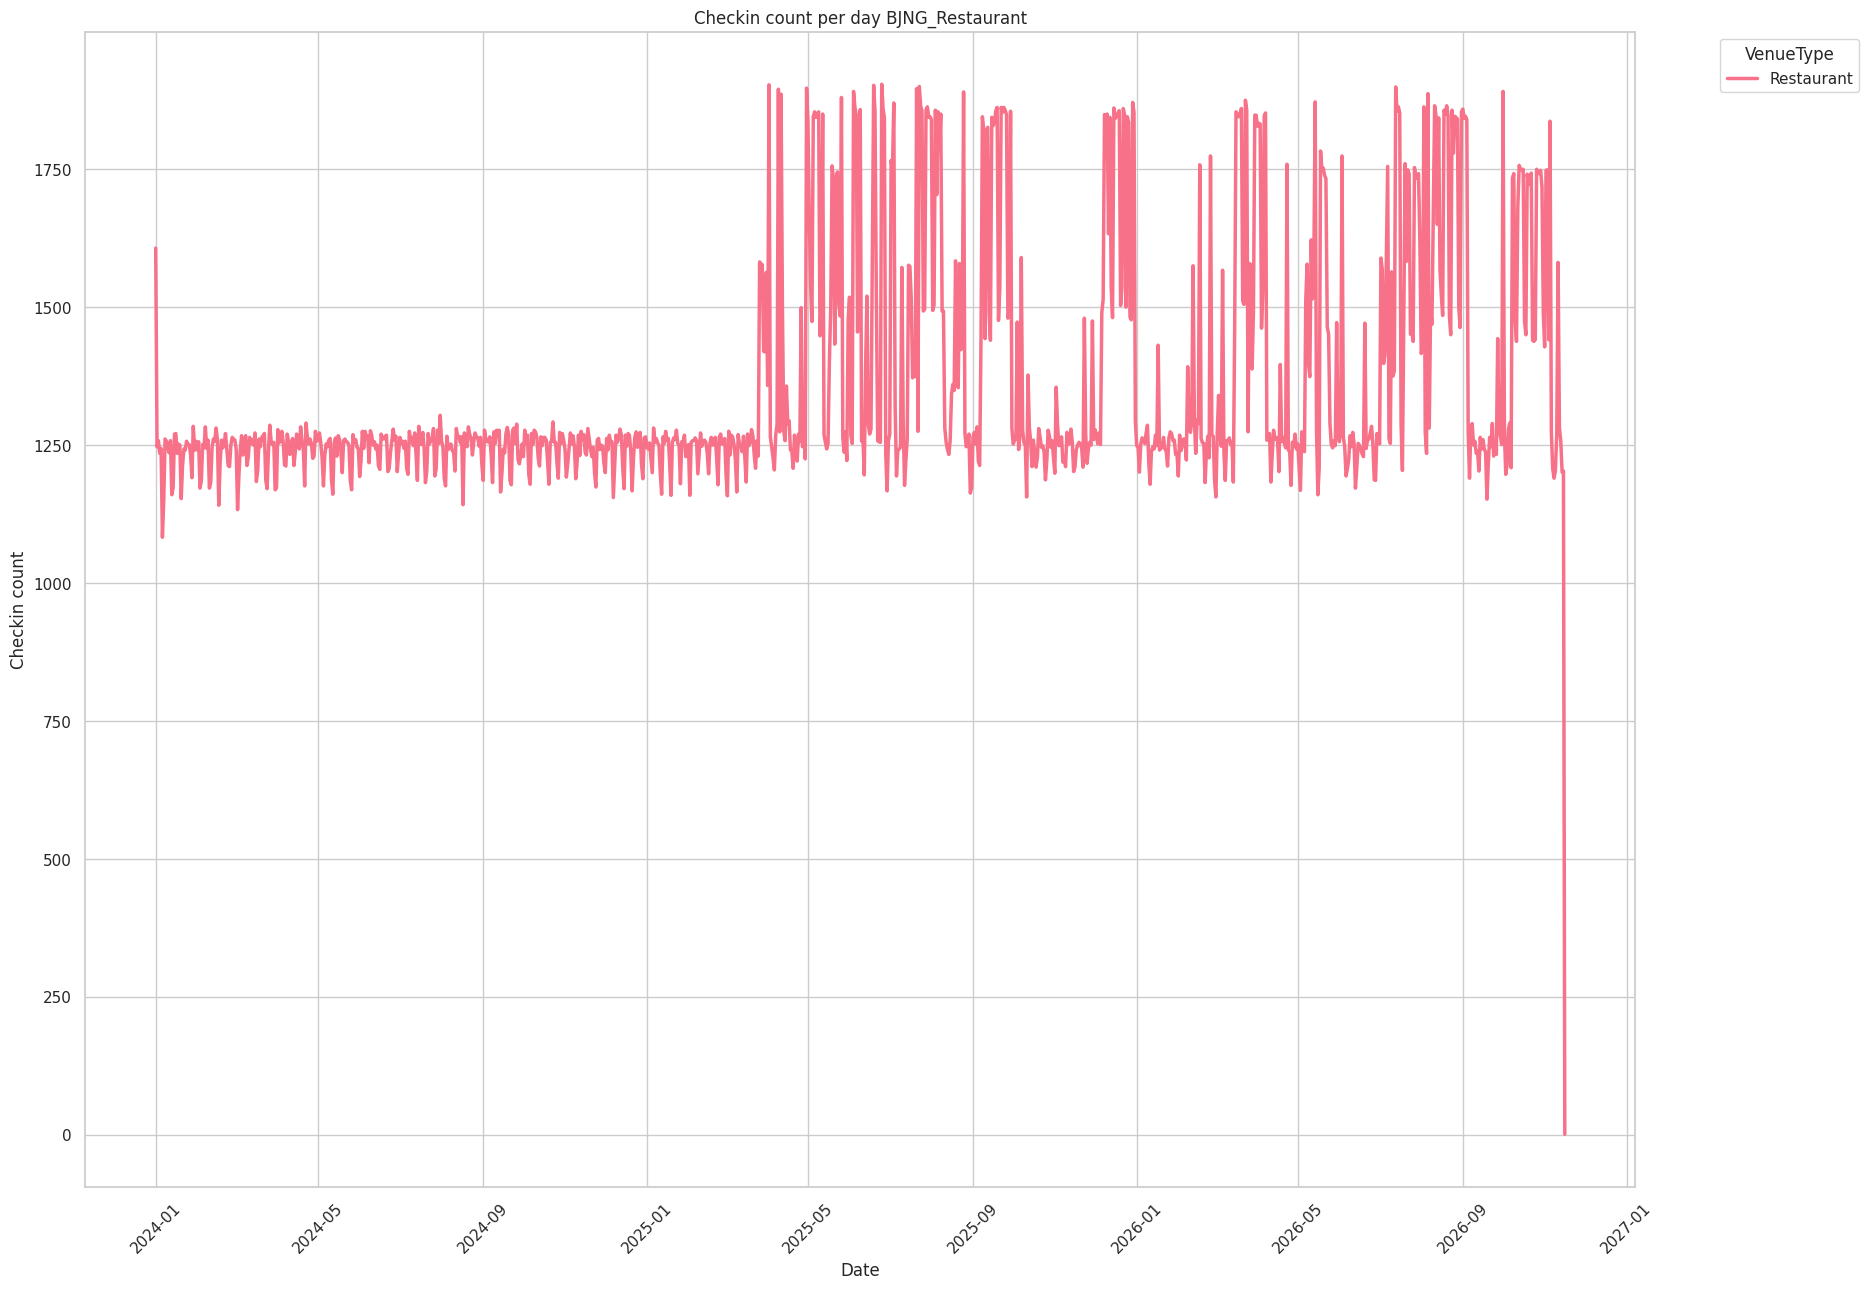

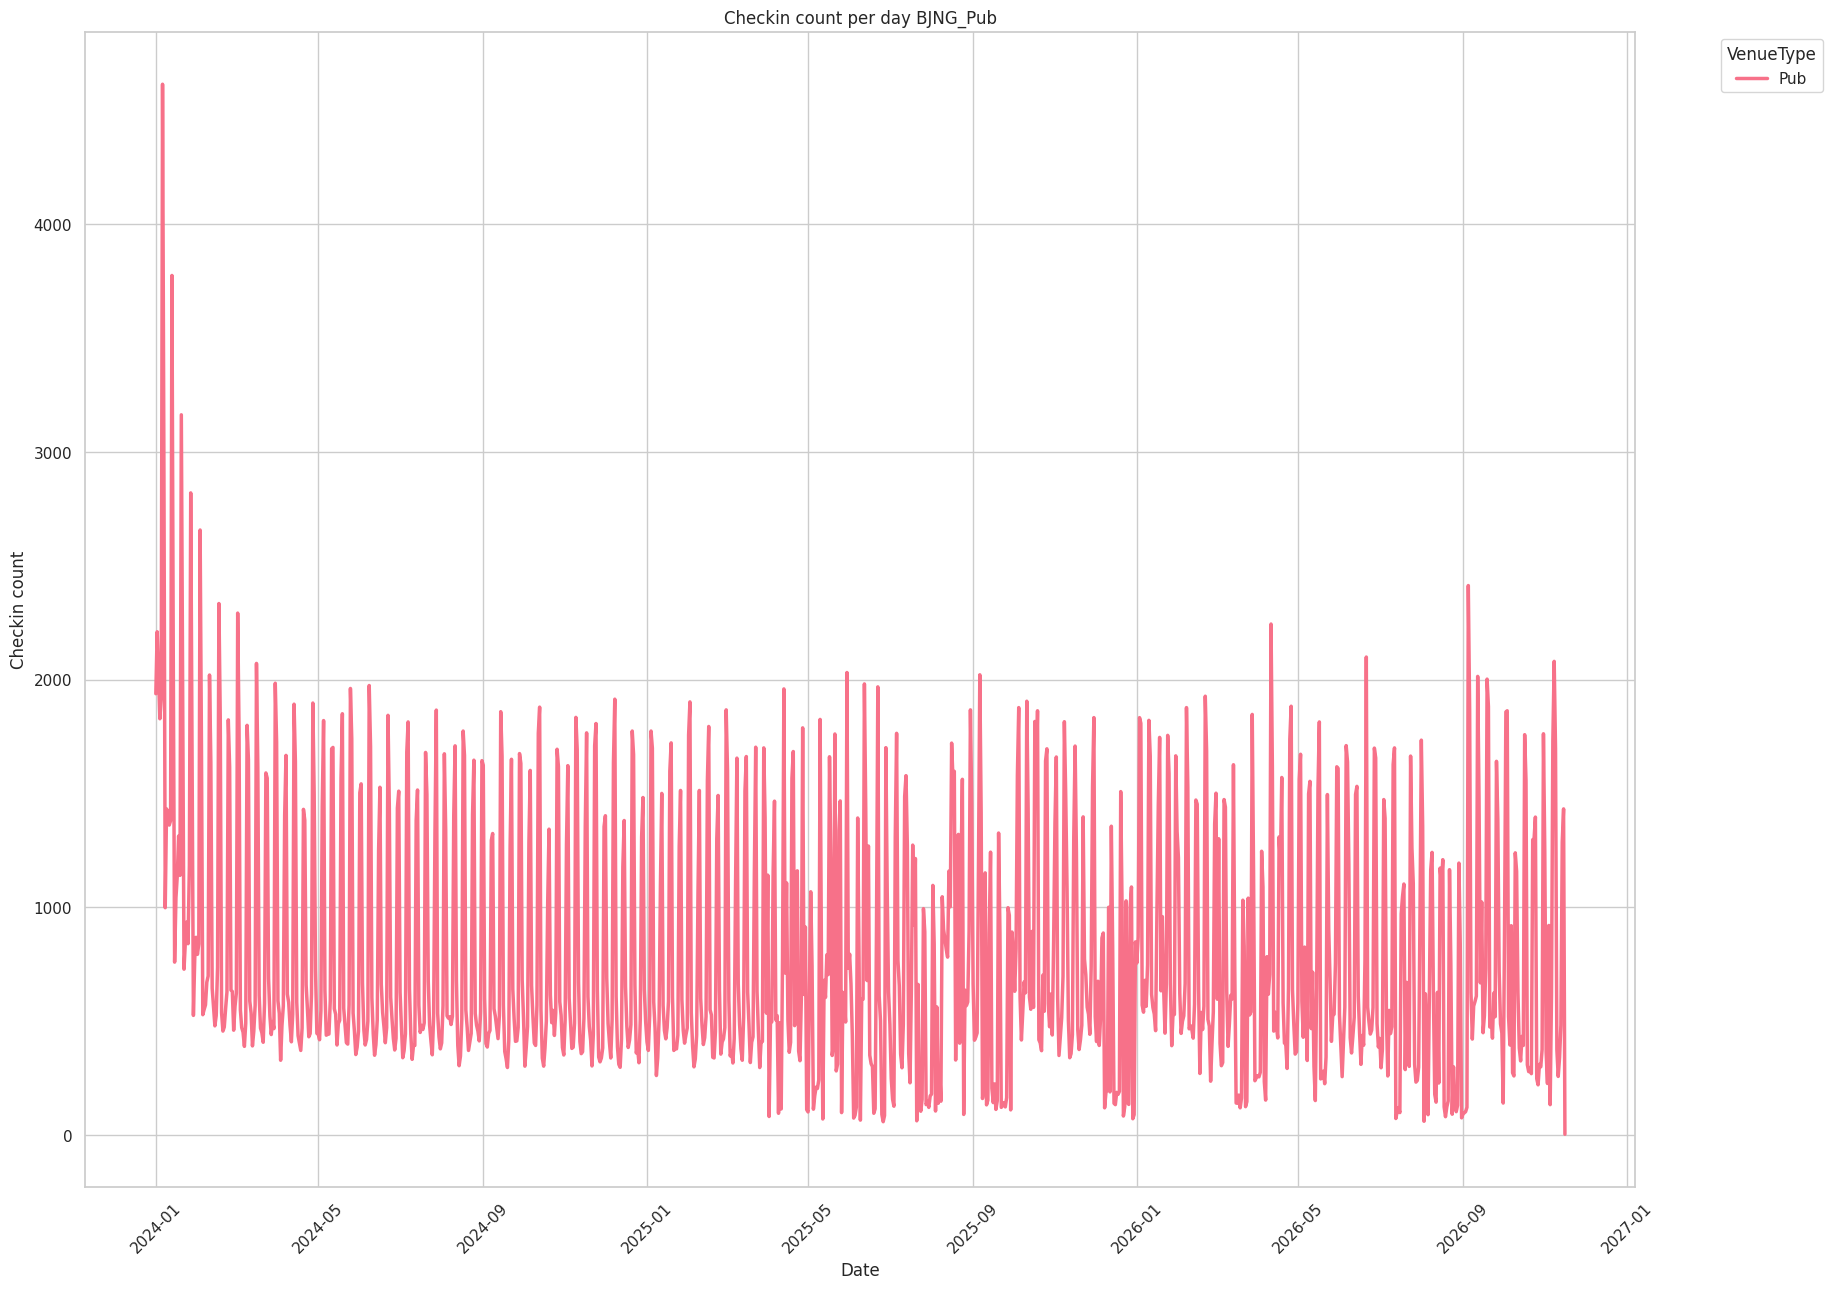

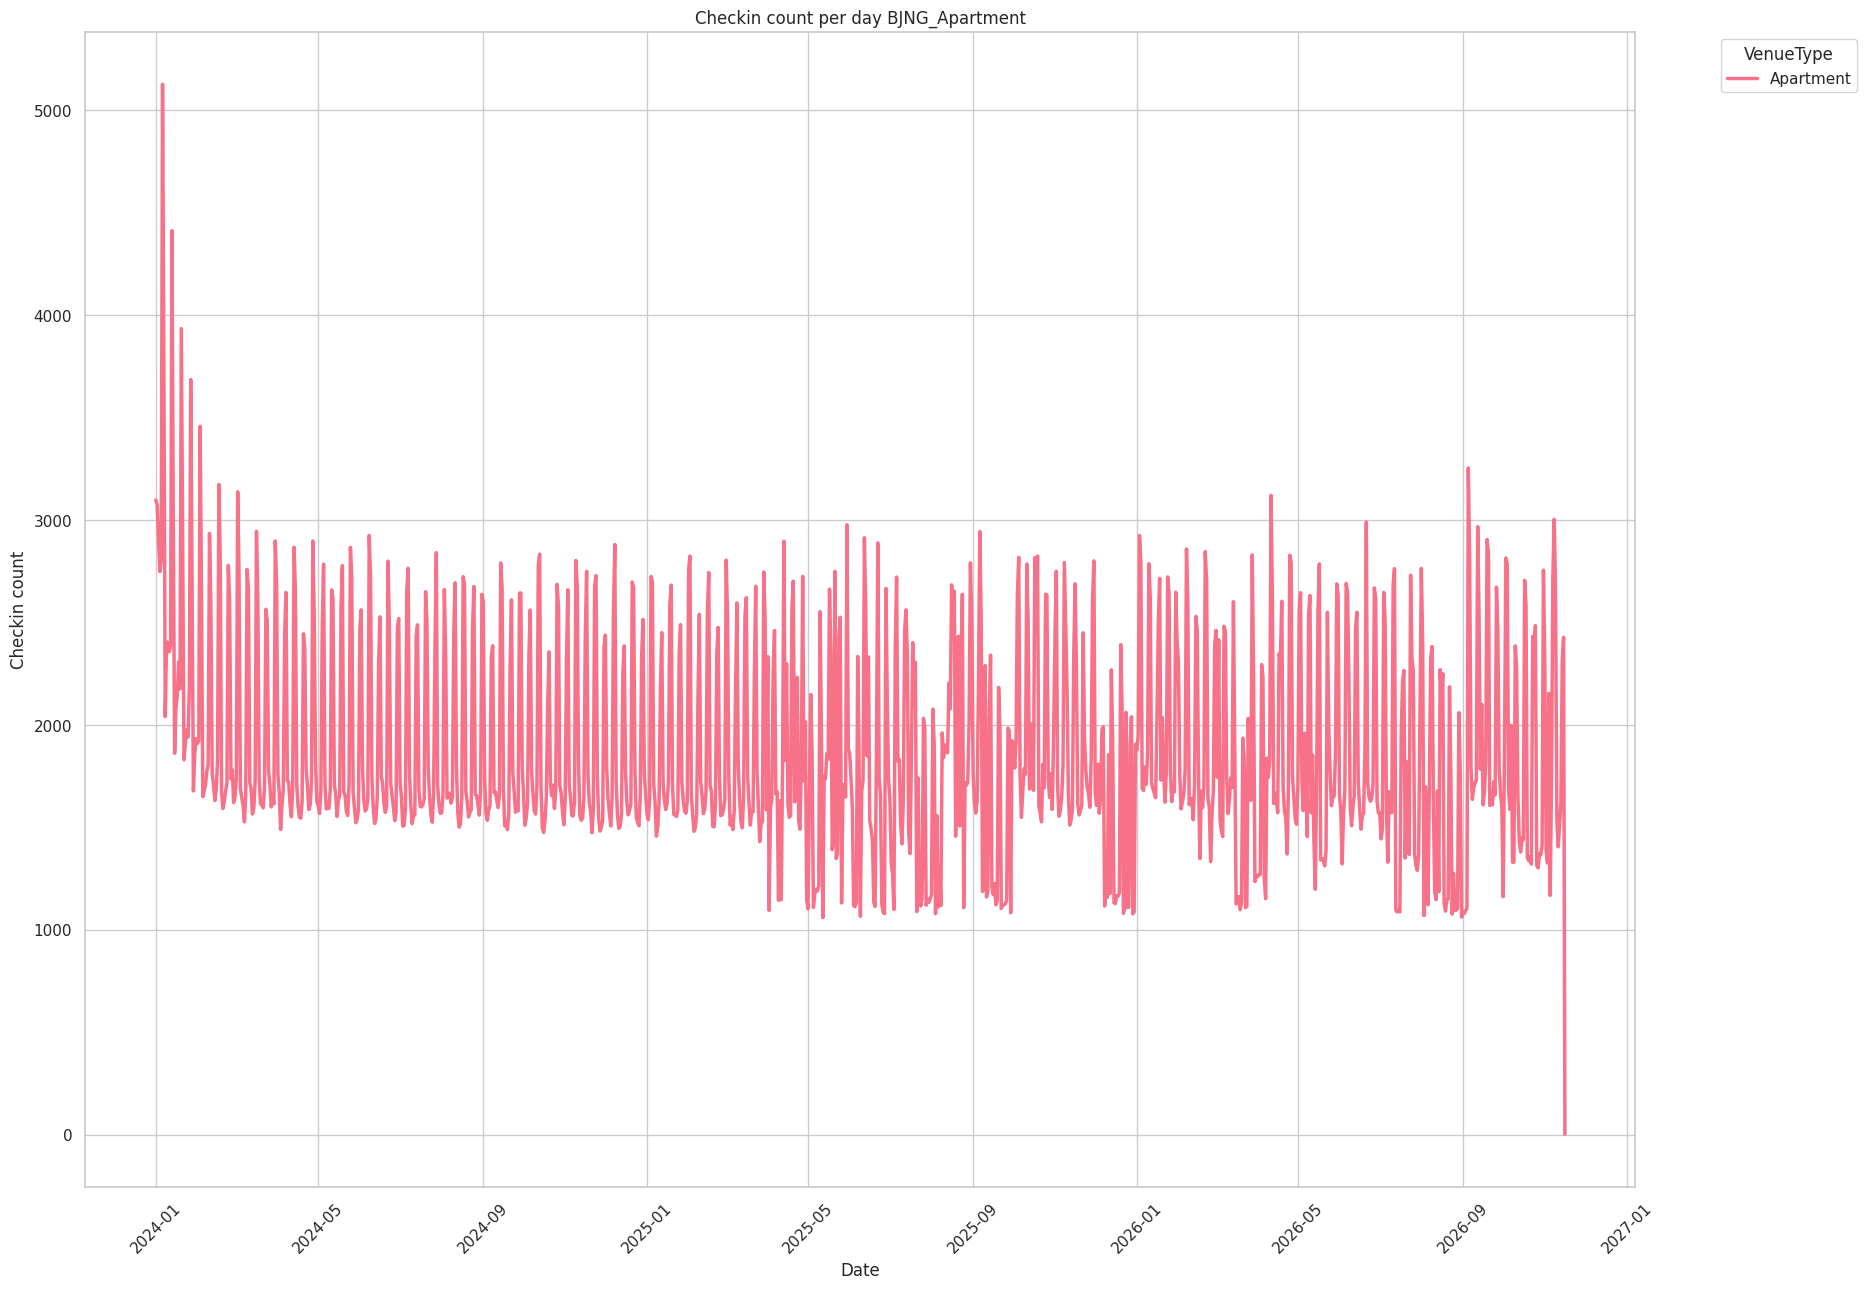

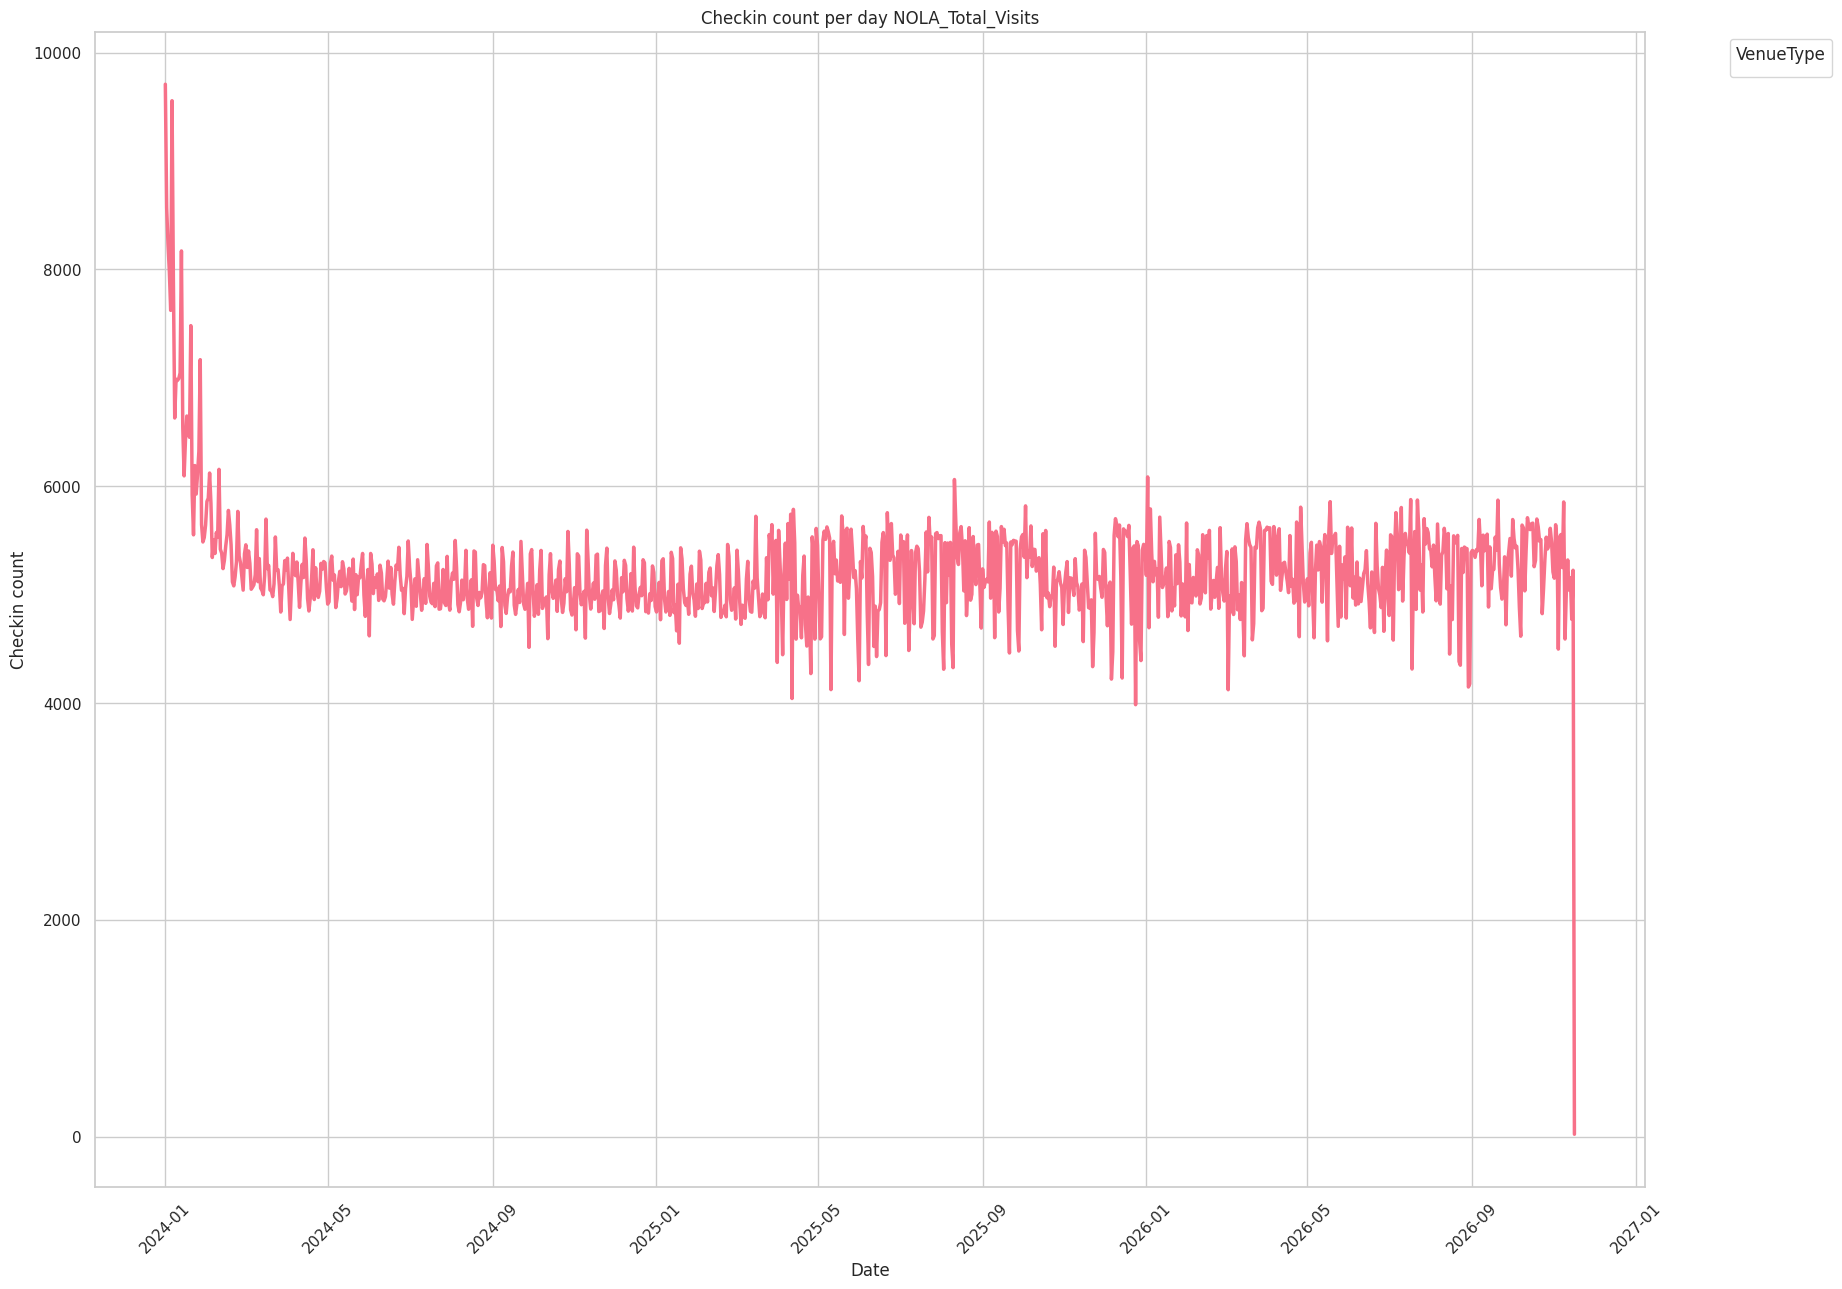

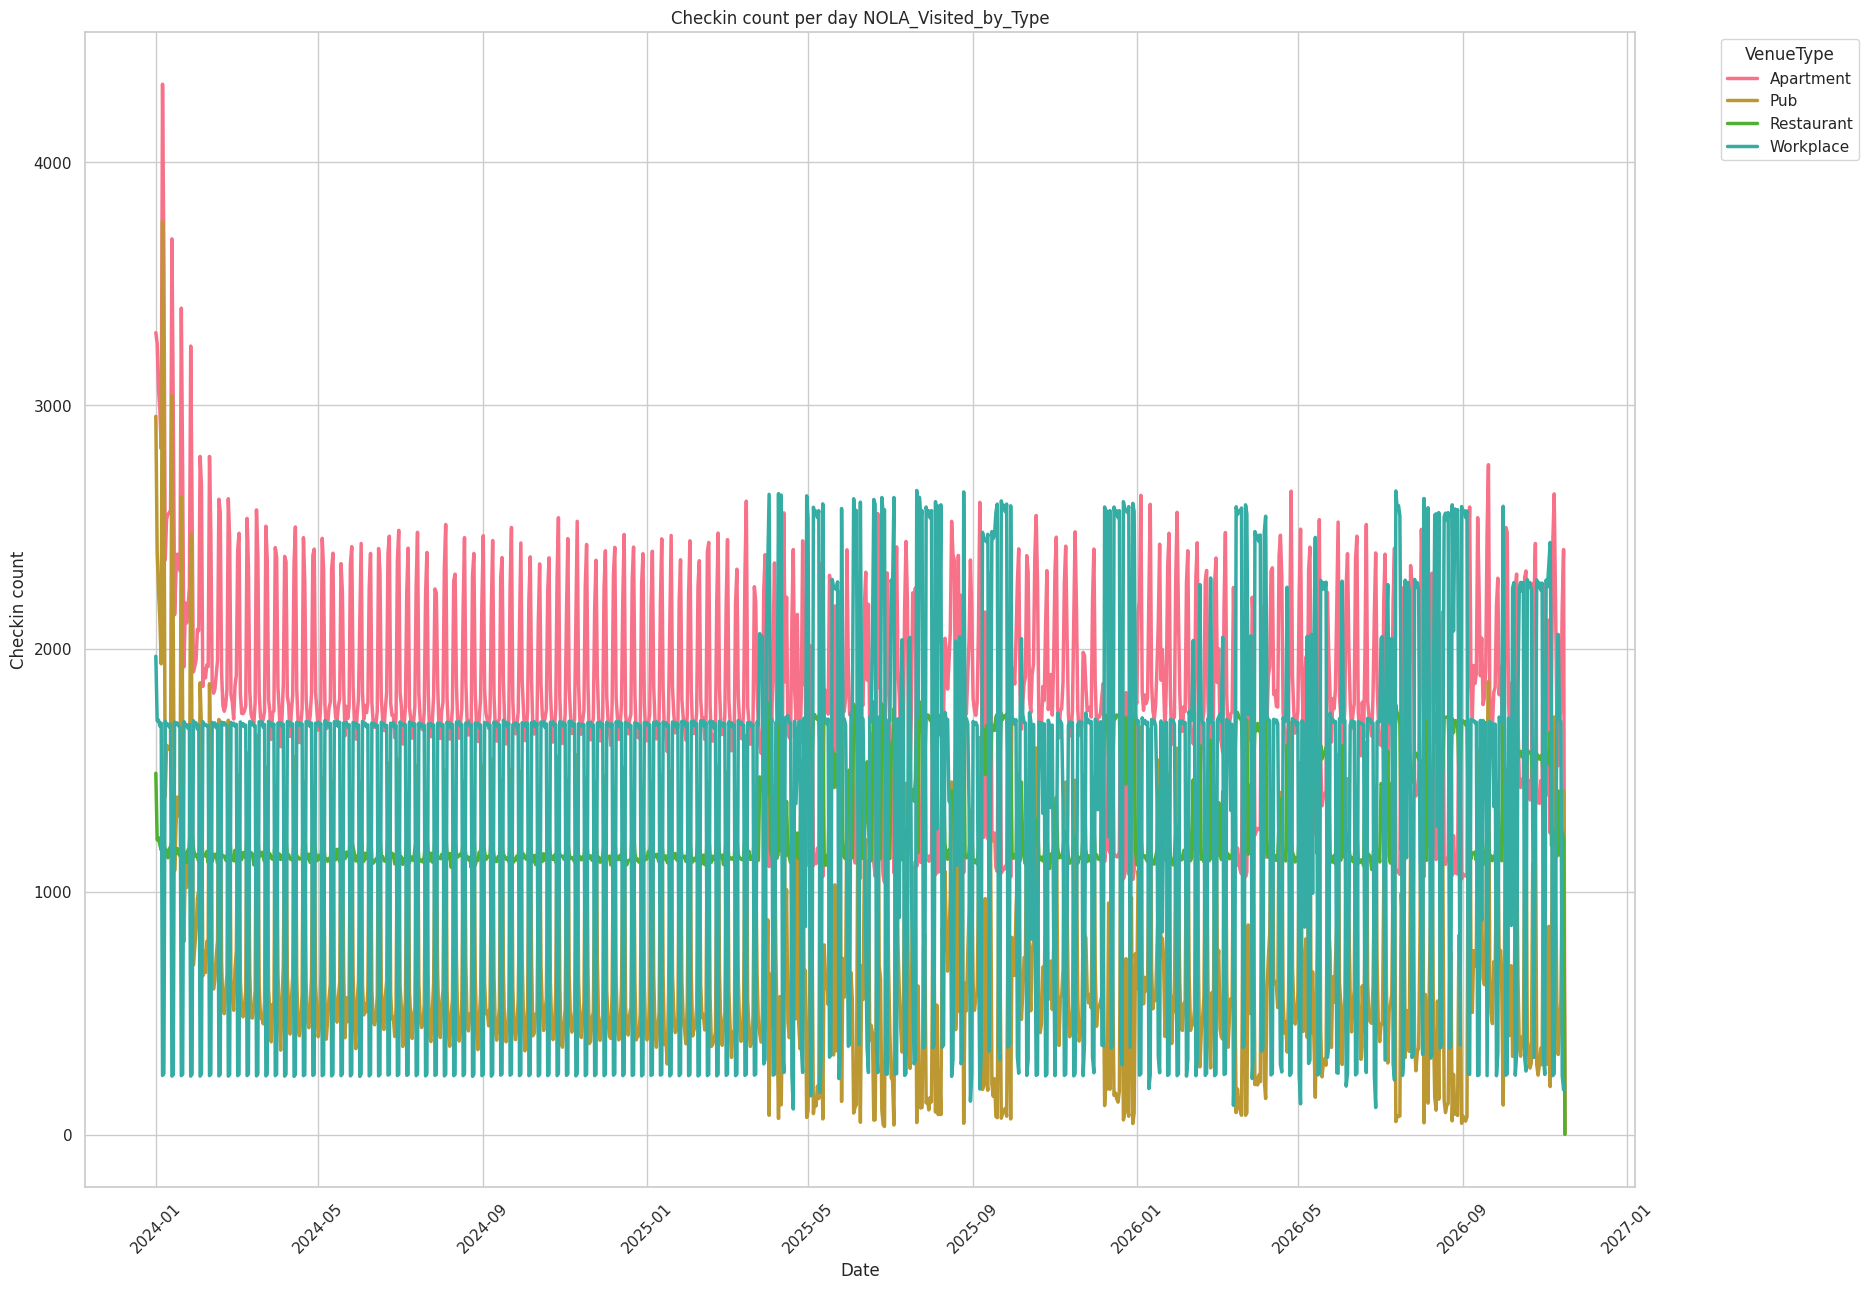

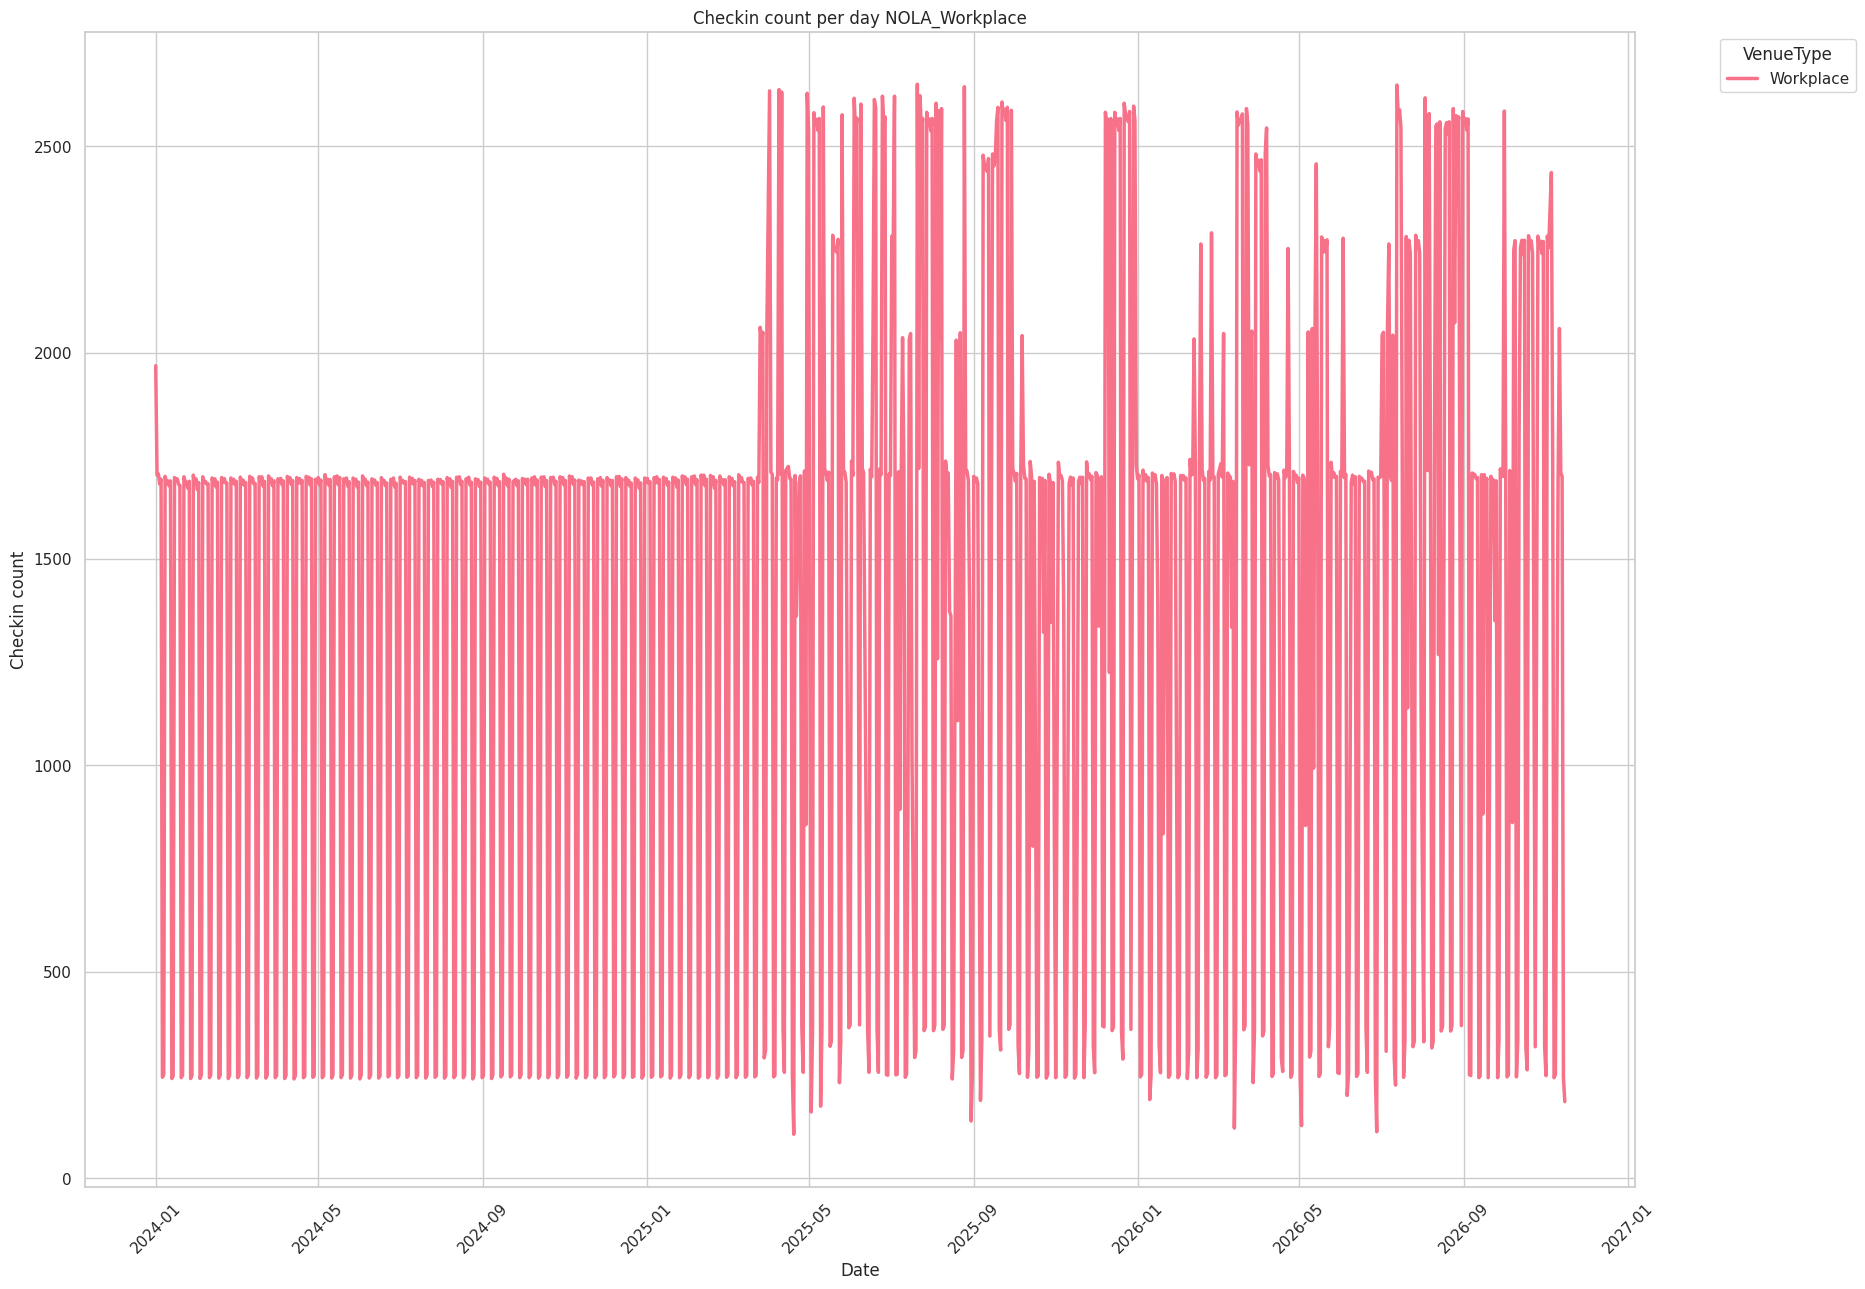

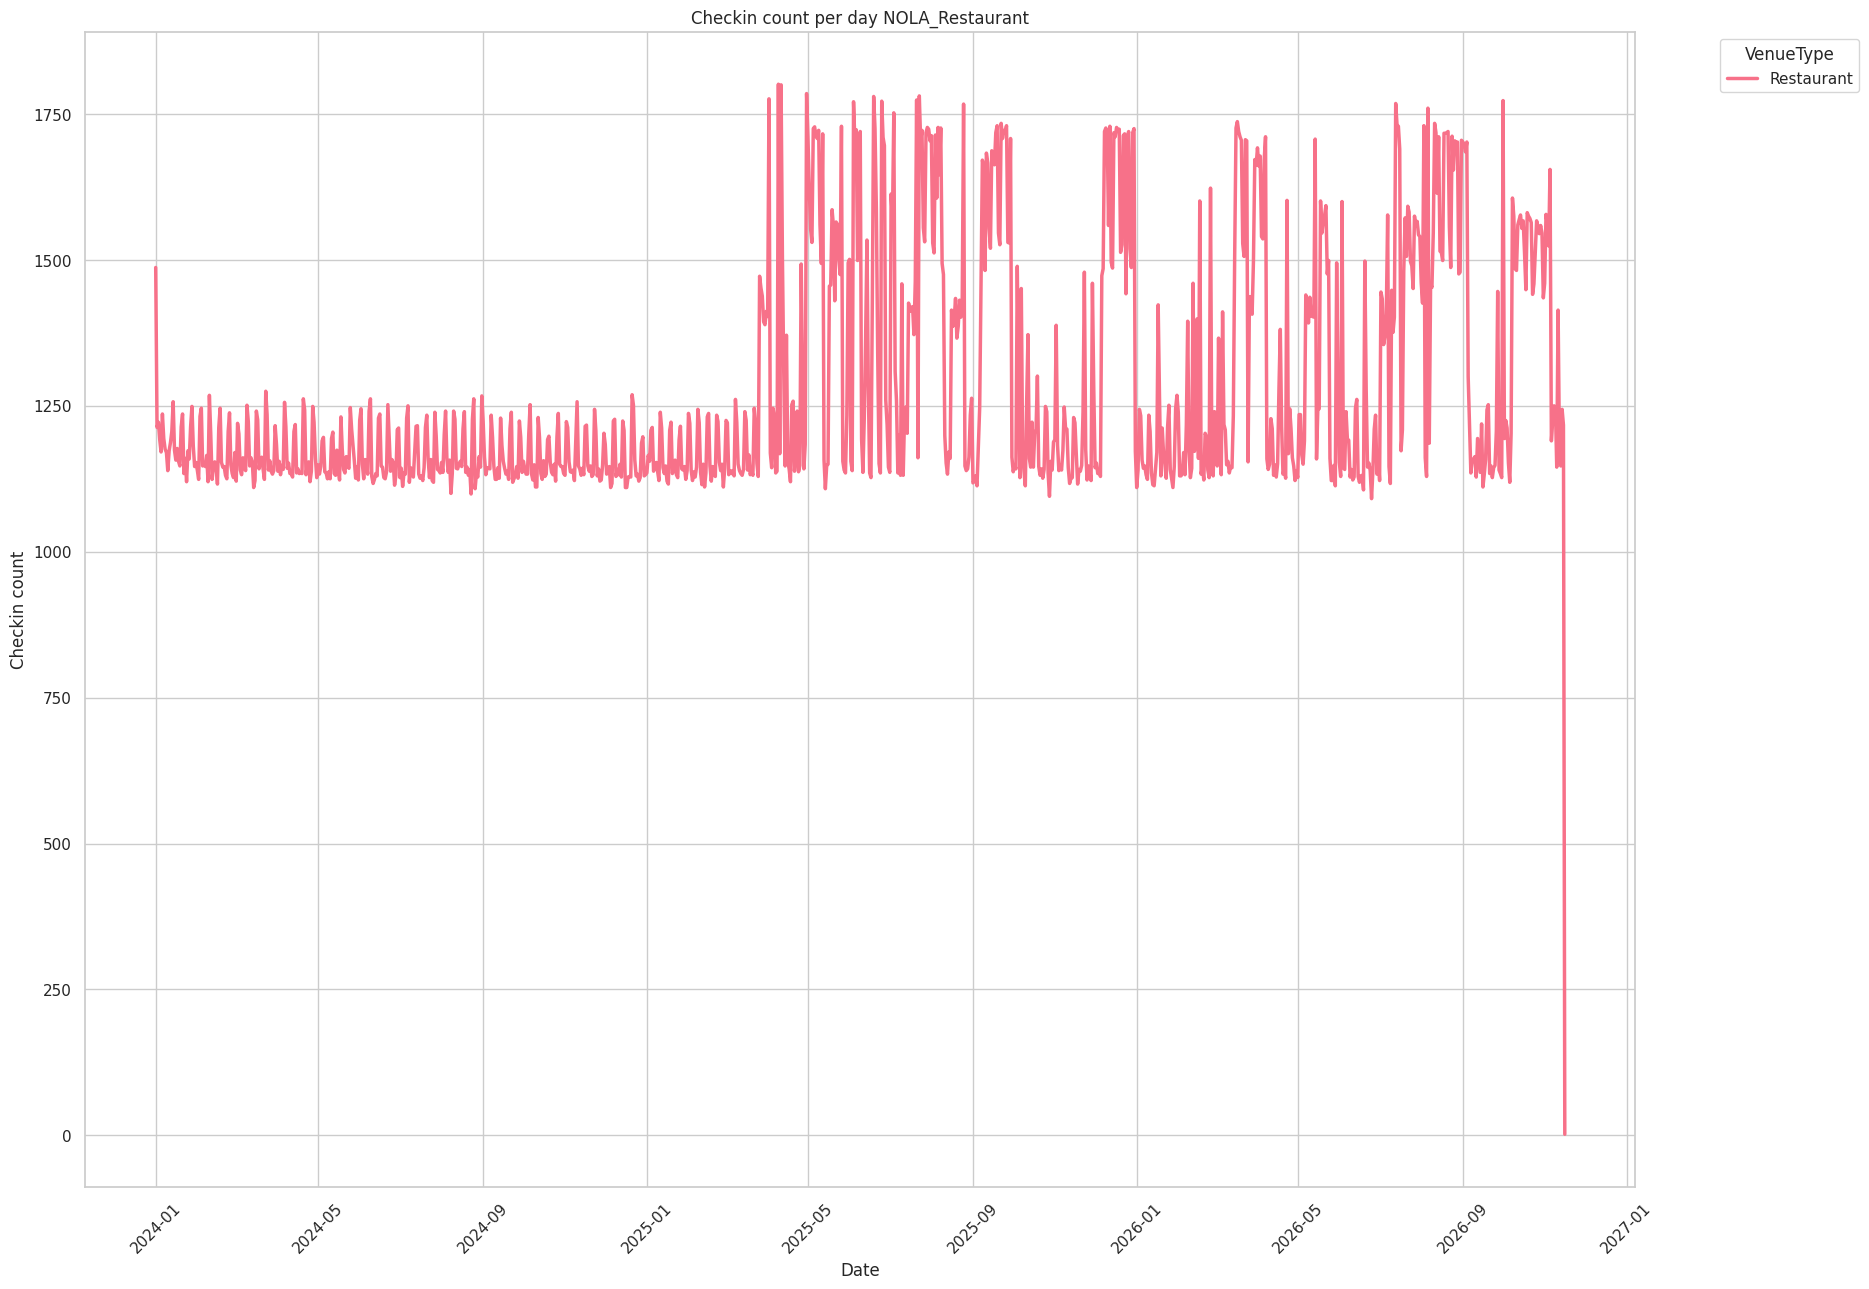

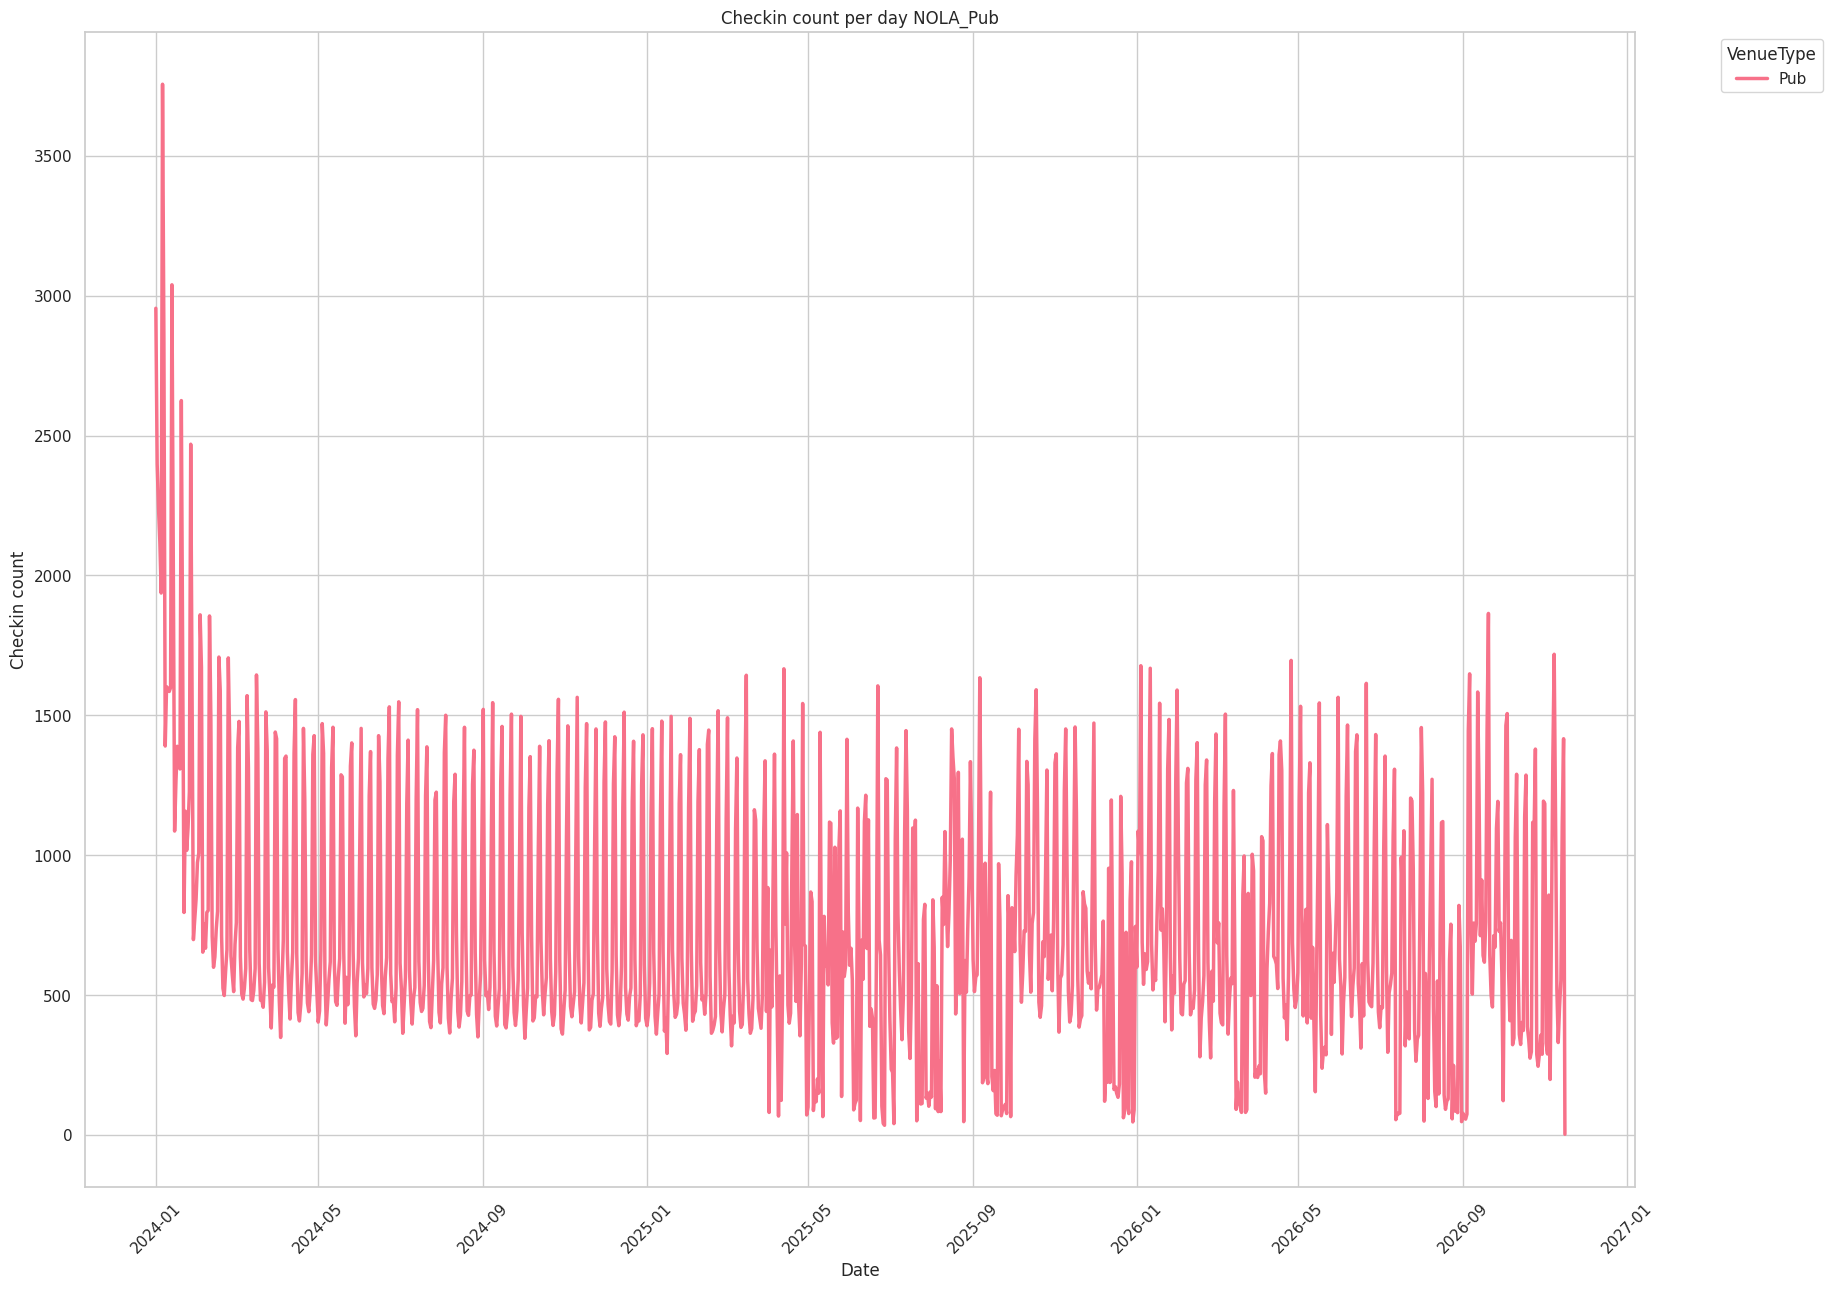

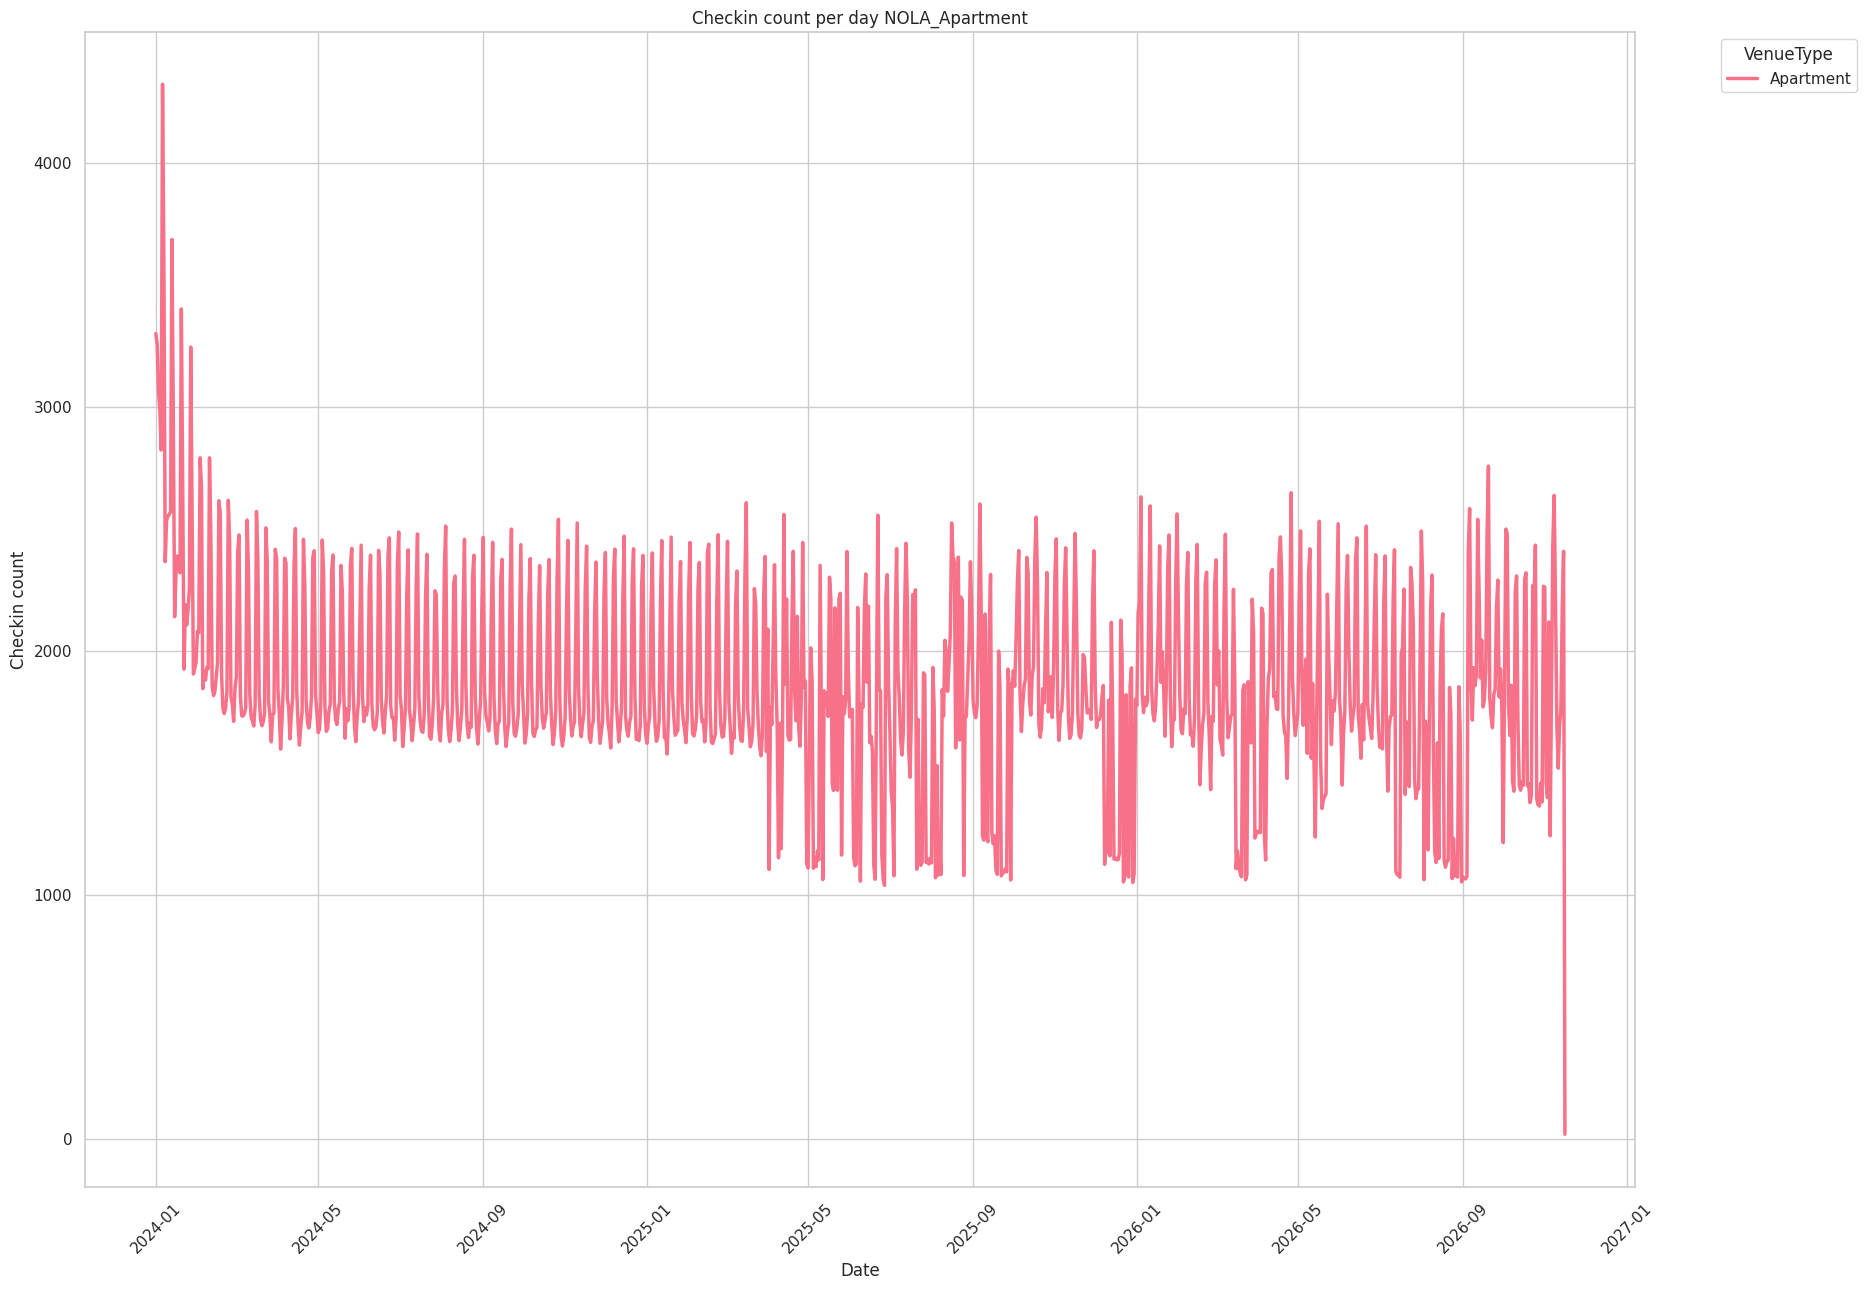

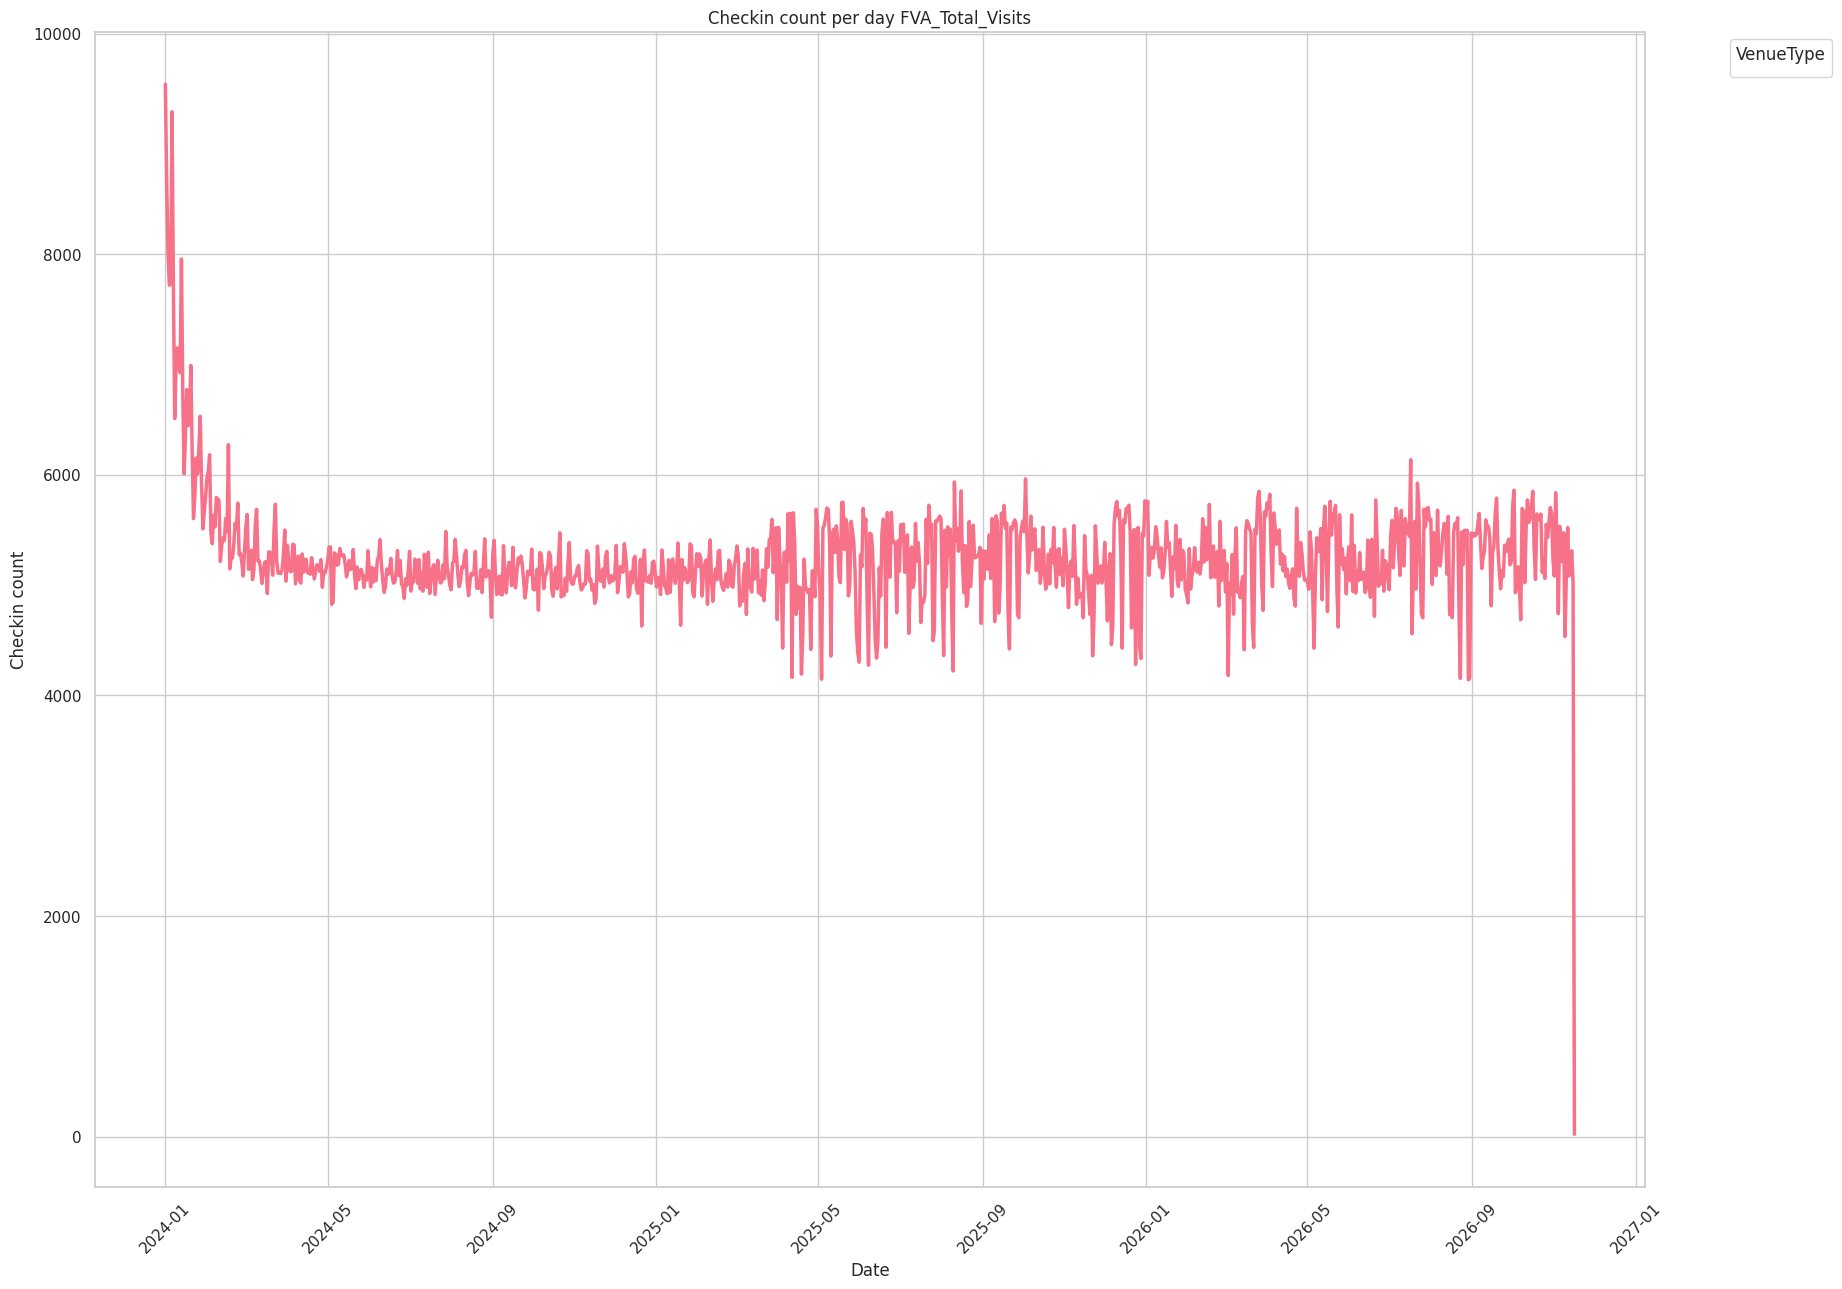

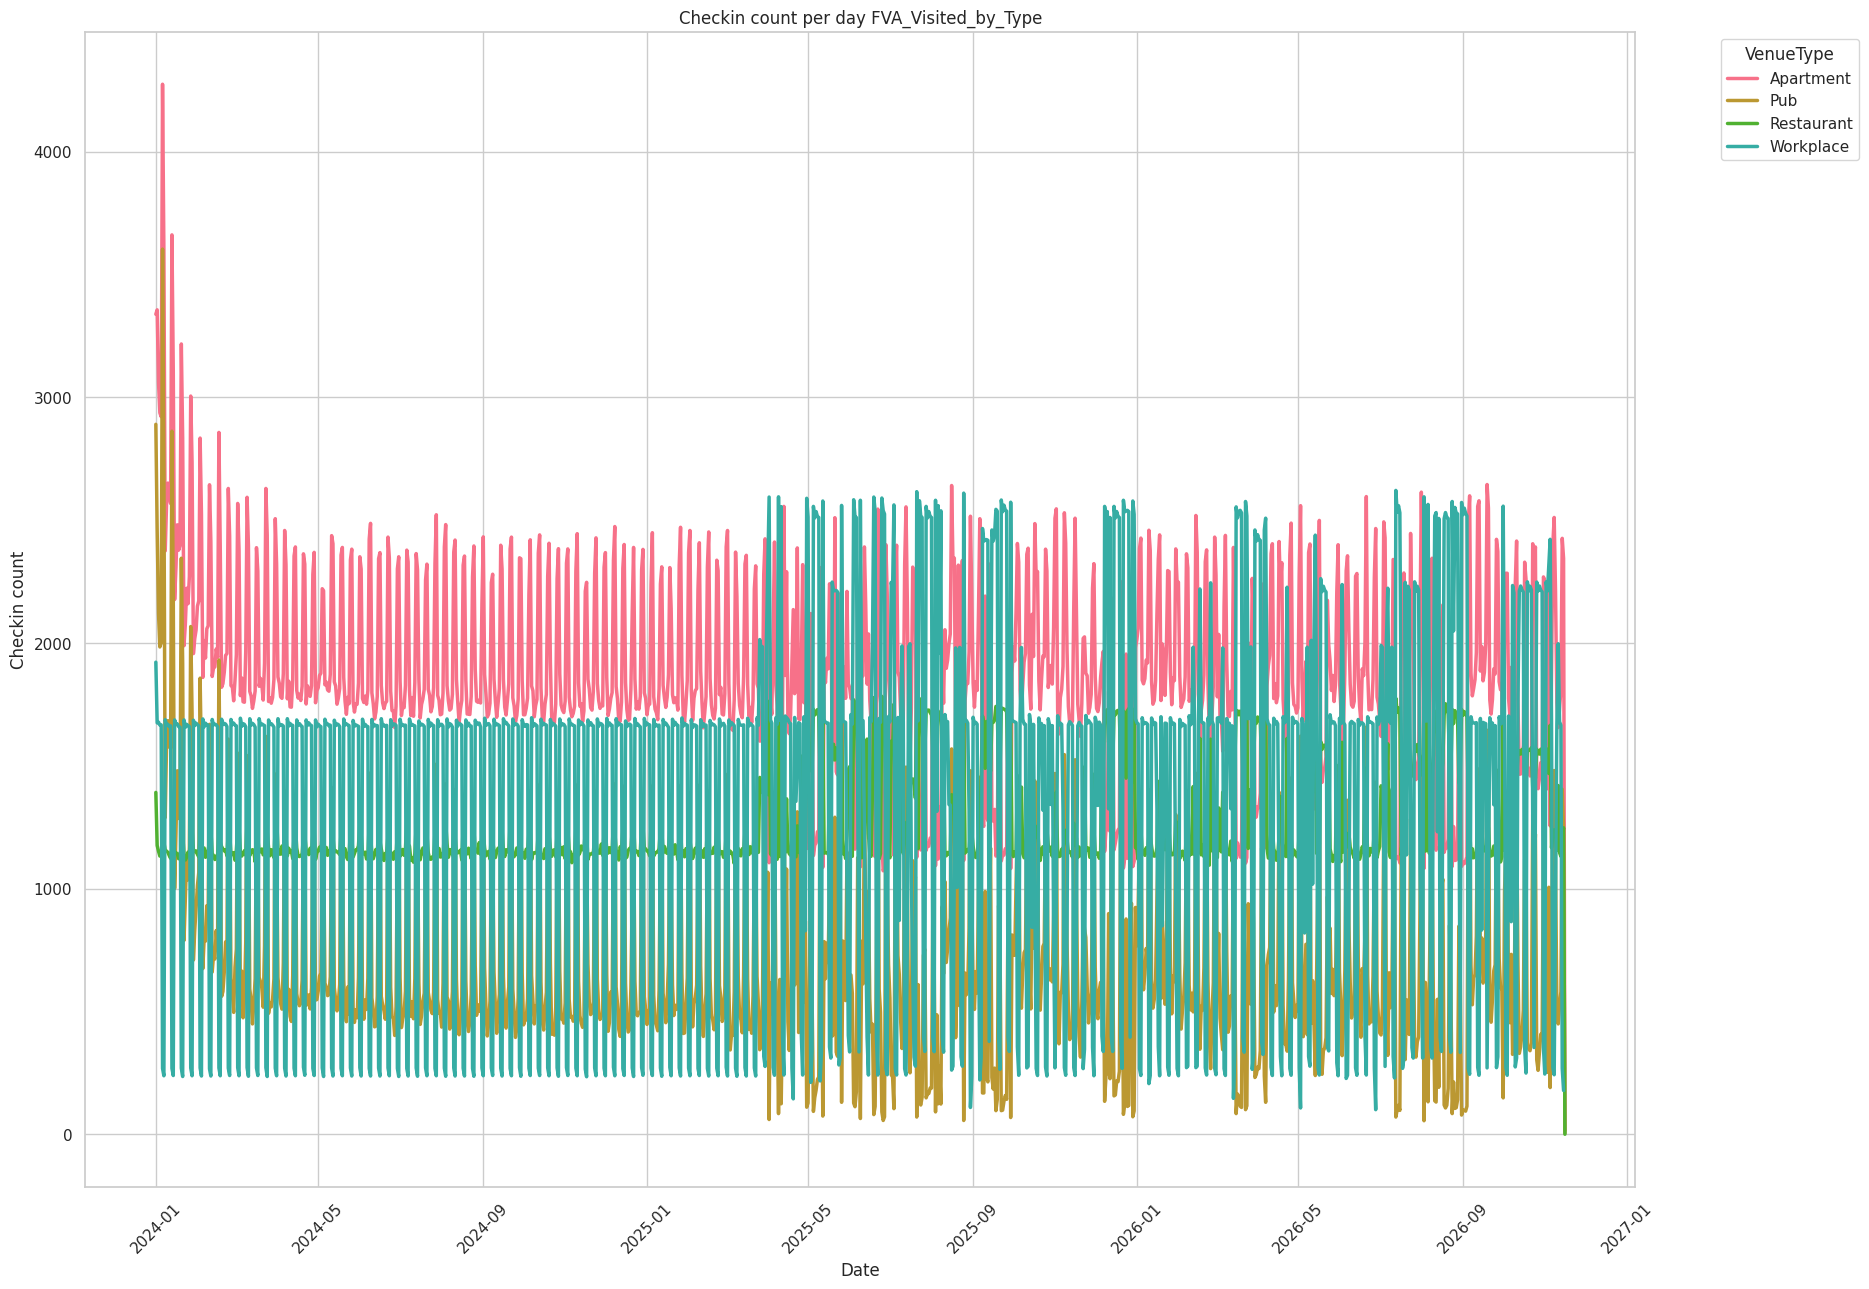

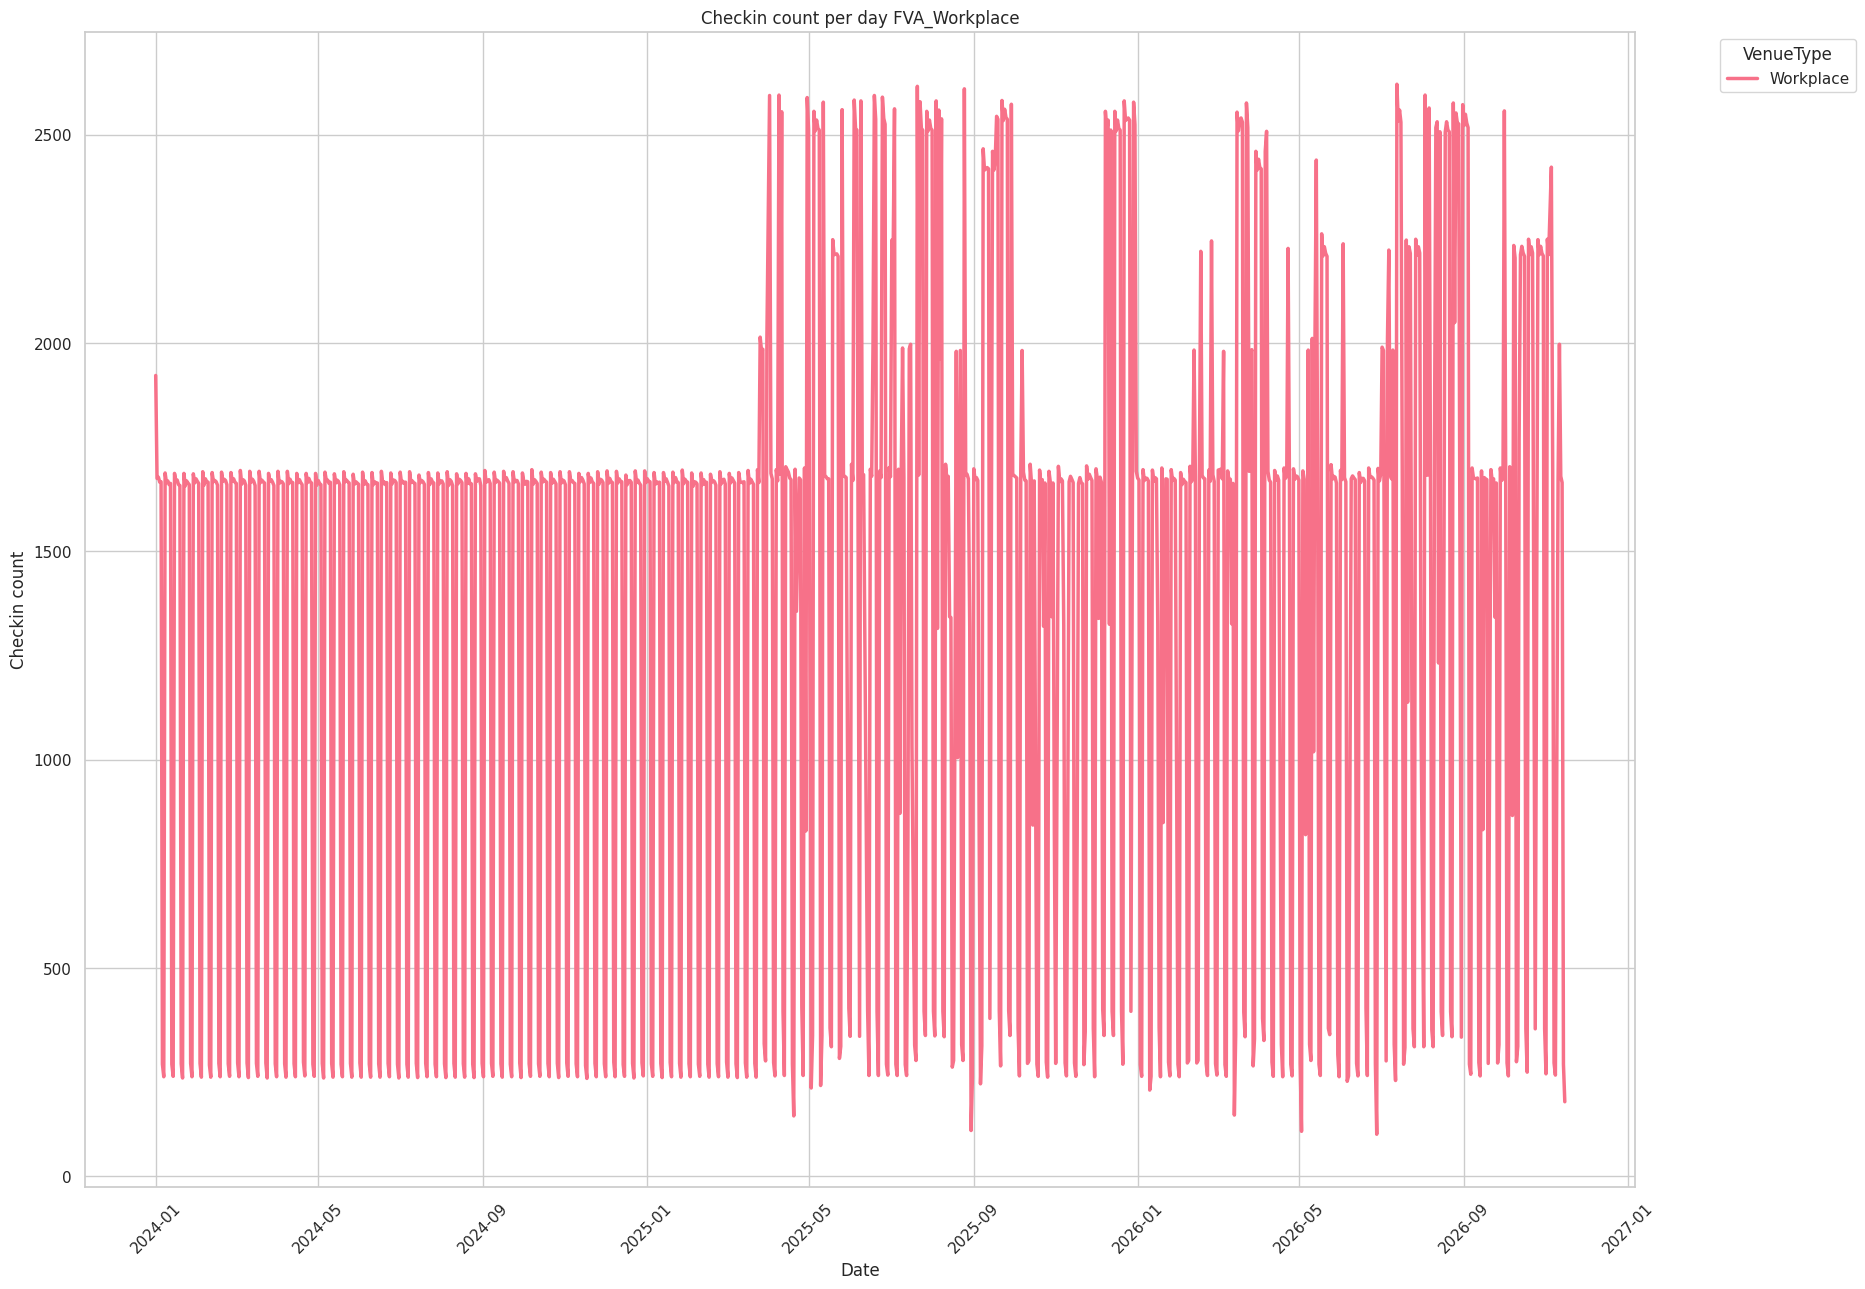

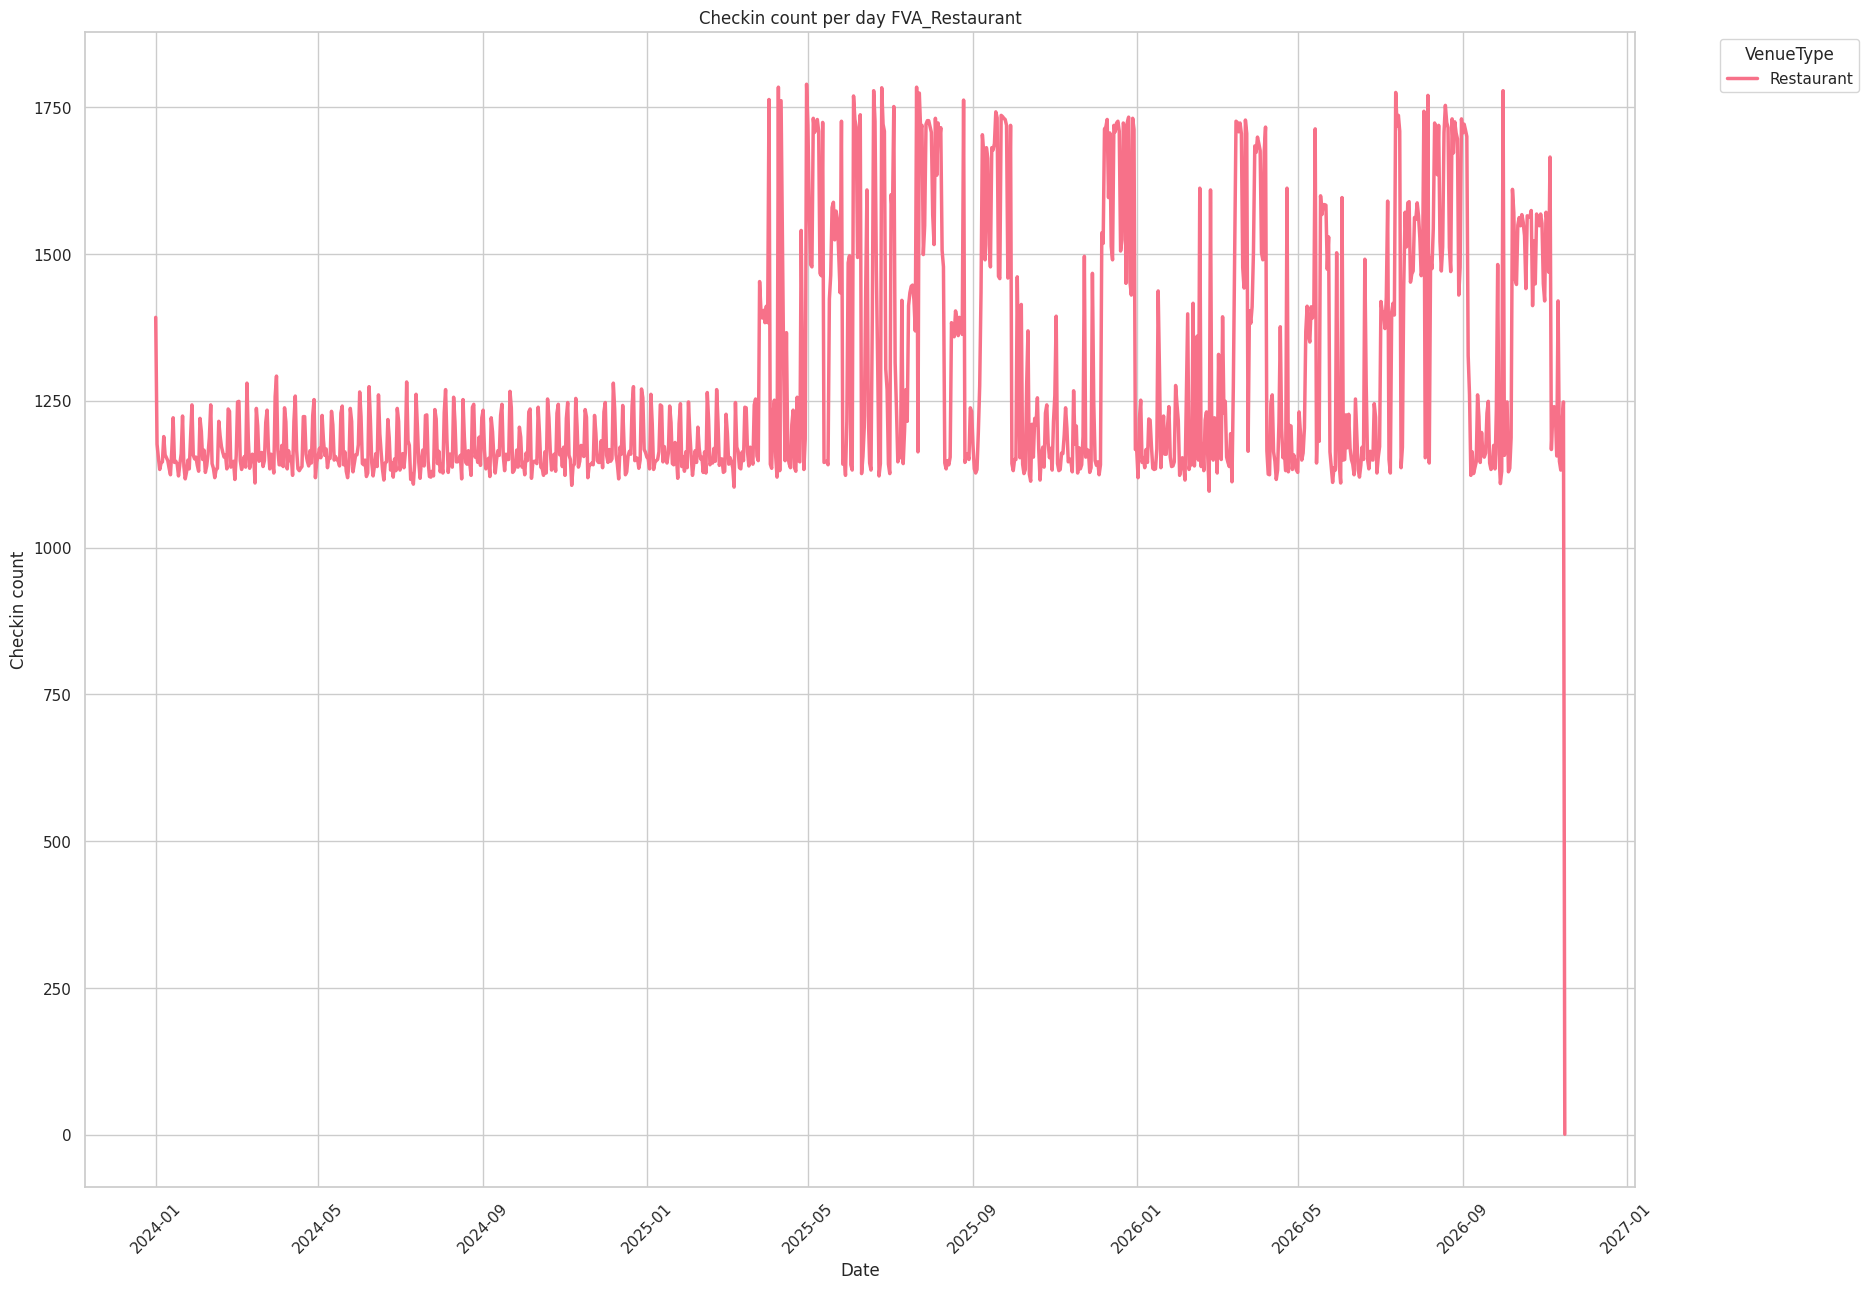

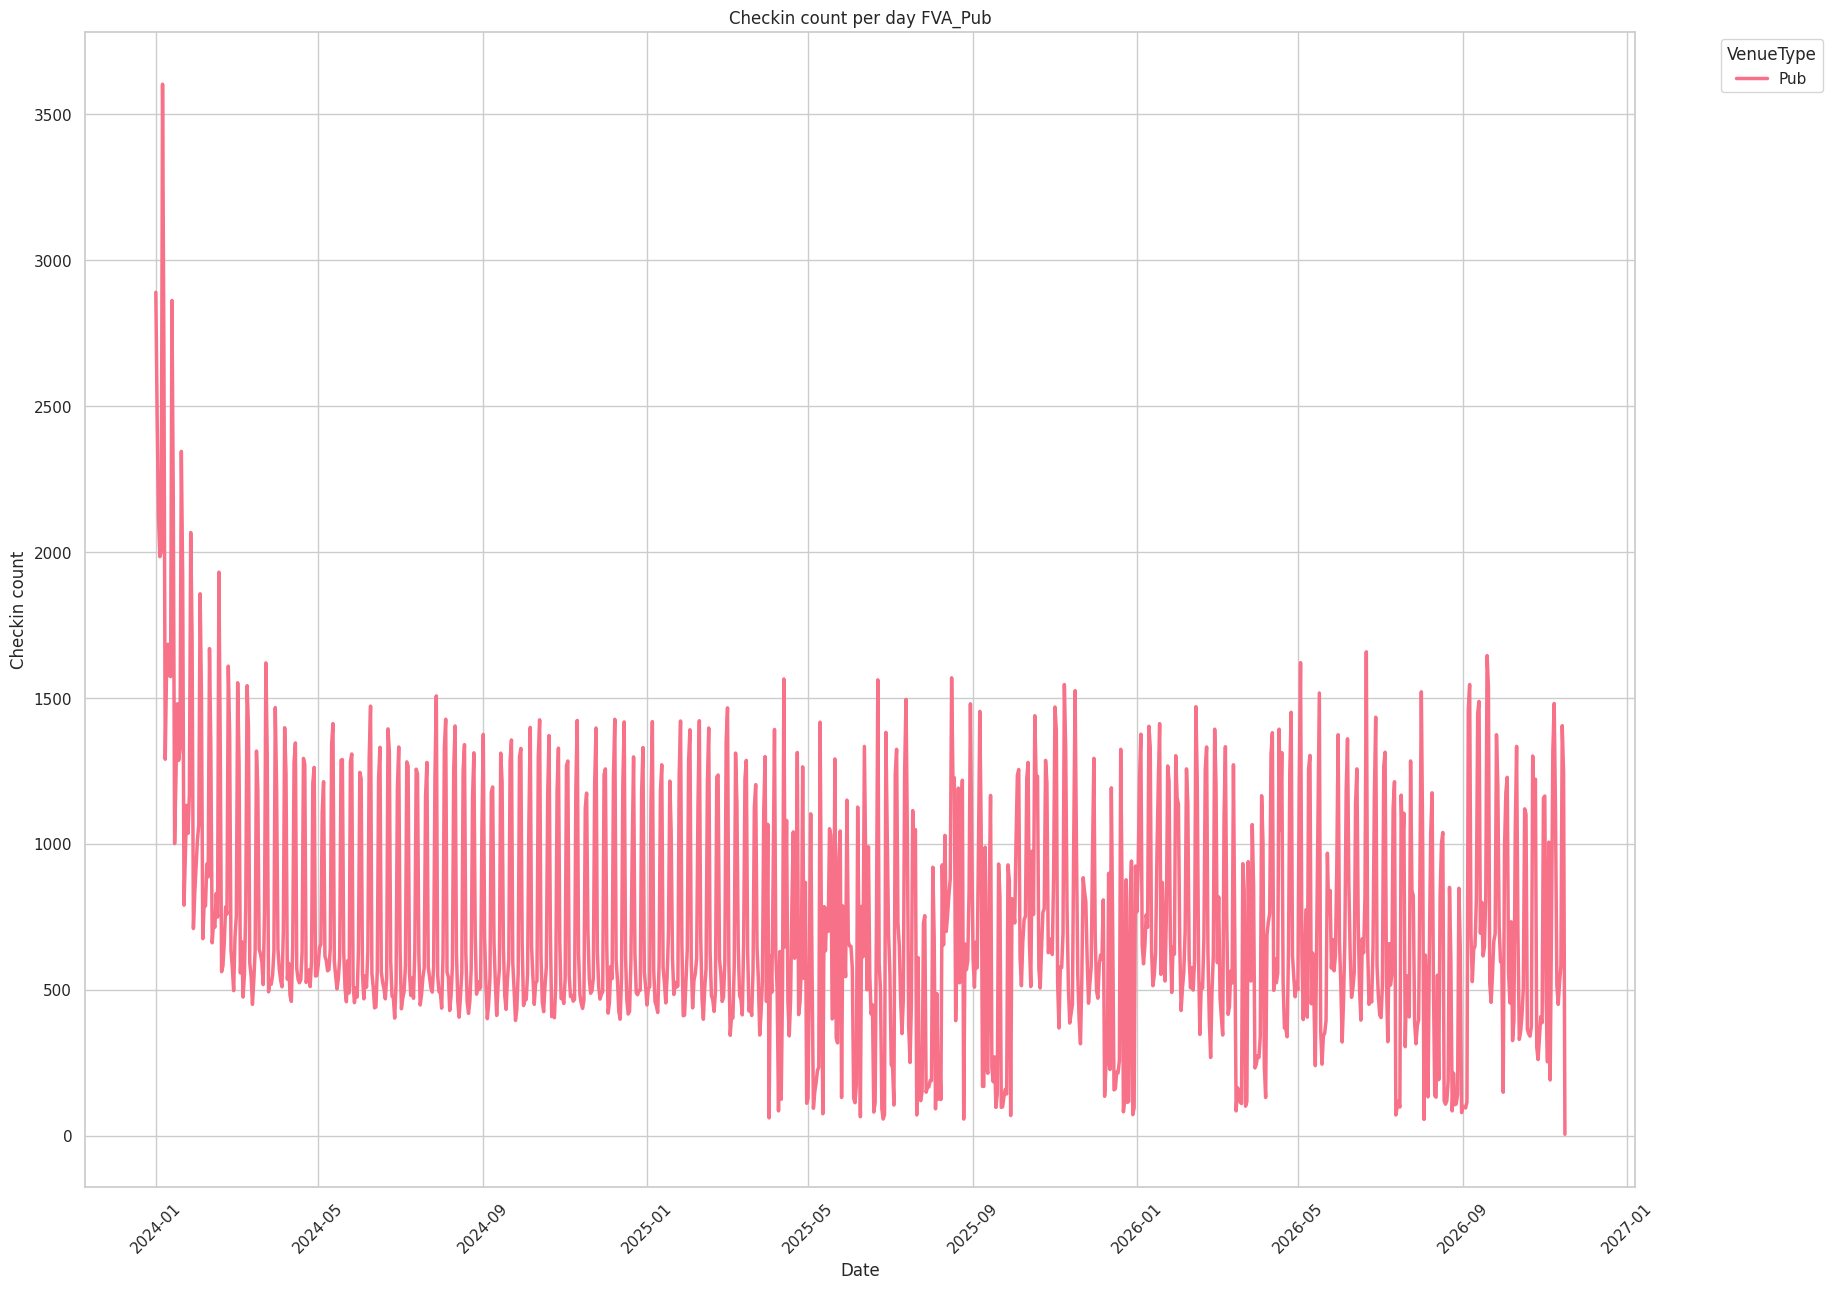

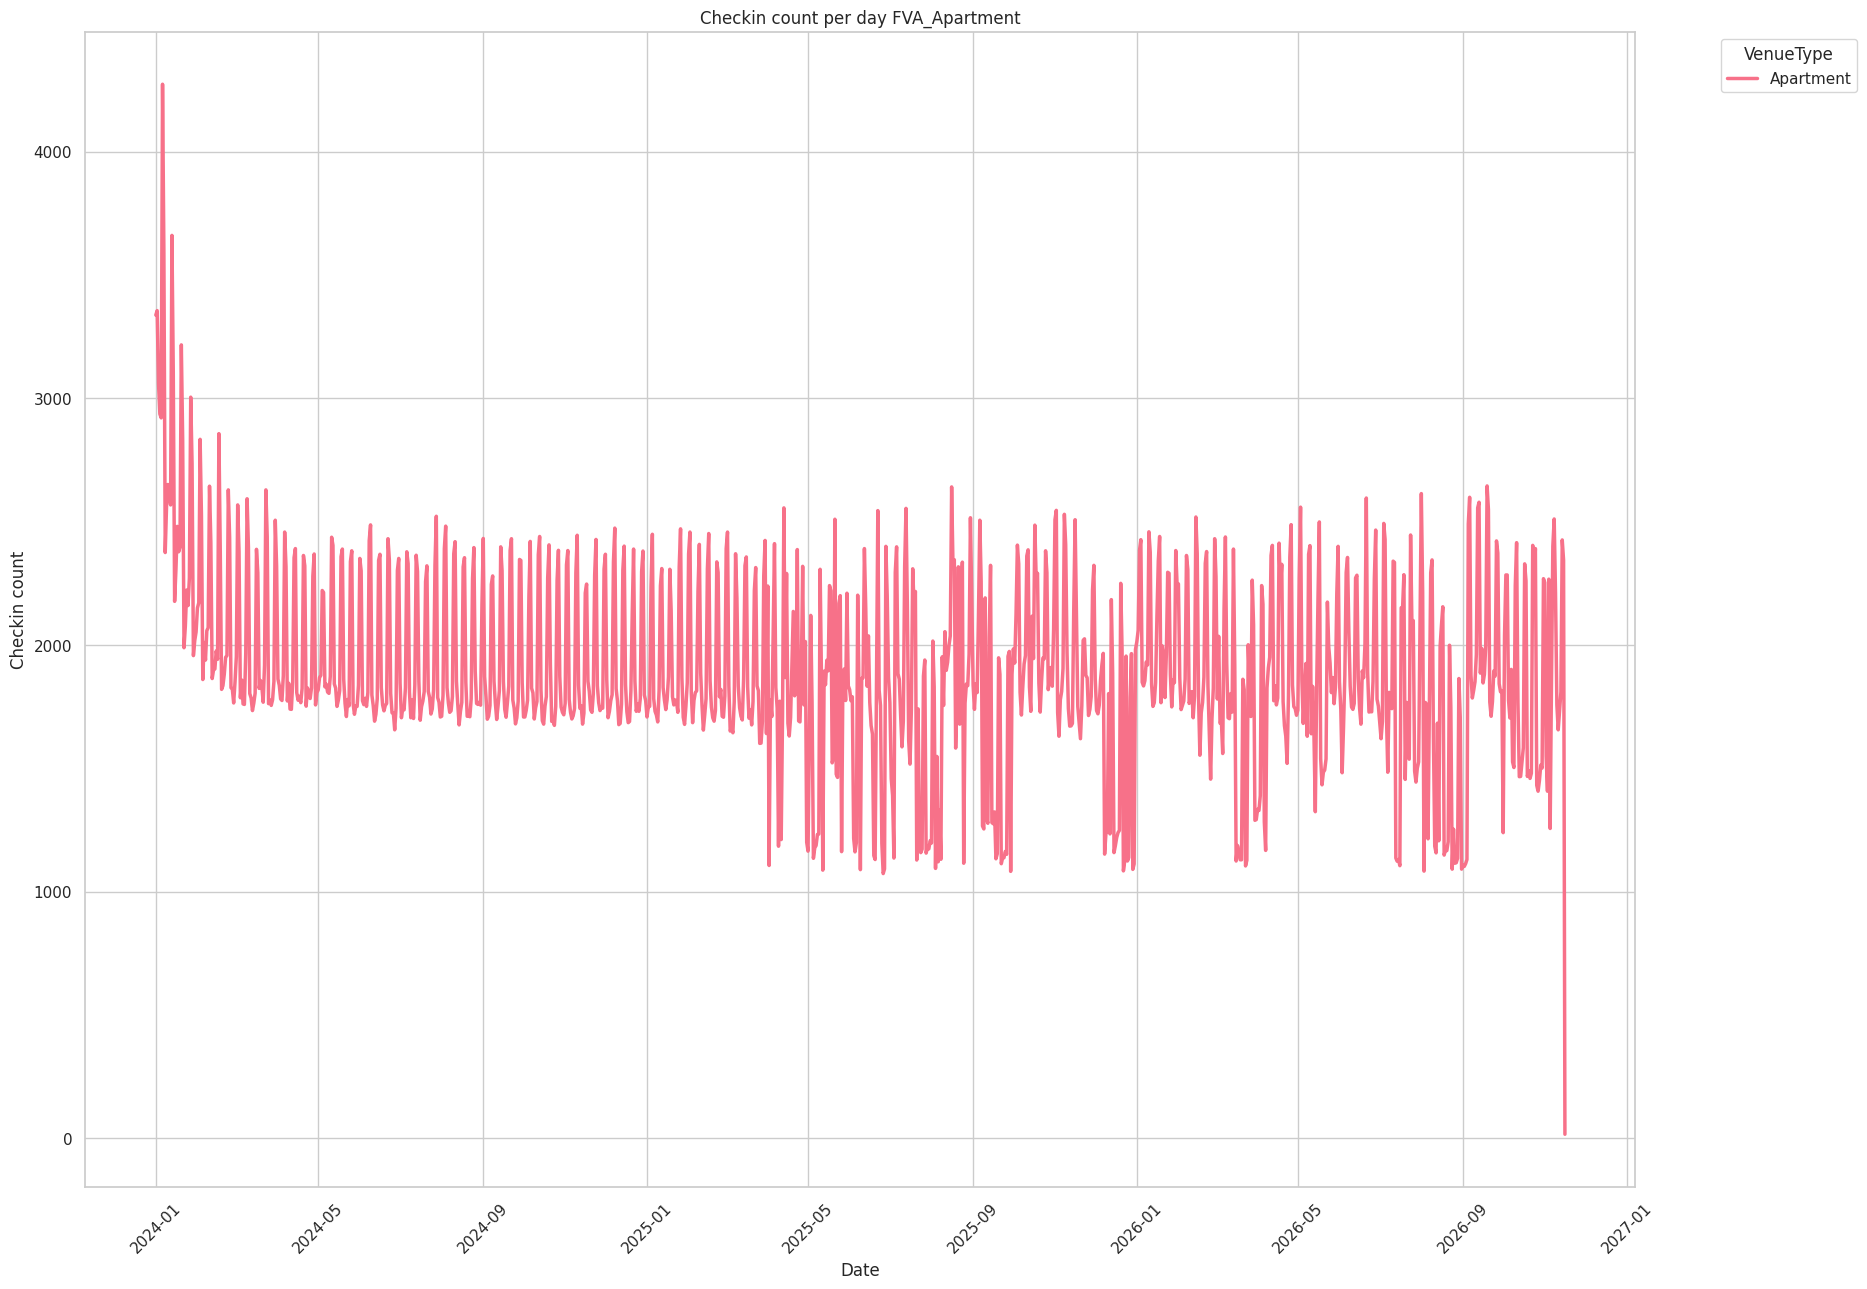

In [112]:
plot_all(atl_visited_df, atl_total_df, name='ATL')
plot_all(atl_large_visited_df, atl_large_total_df, name='ATL_Large')
plot_all(bjng_visited_df, bjng_total_df, name='BJNG')
plot_all(nola_visited_df, nola_total_df, name='NOLA')
plot_all(fva_visited_df, fva_total_df, name='FVA')
